# U.S. Elections Analysis

## Overview
This project utilizes a presidential elections dataset, as well as the 2020 Census data, to analyze the factors that may indicate a more receptive voter base to Democrats.

## Business Problem
The purpose of this project is to present an electoral organization with a path to victory for the presidency and house majority. This project identifies the pivotal districts in the swing states, and through analysis and modeling, determines the strongest indicators of a lean towards democrats or republicans. 

## Data Understanding
This project uses two publicly available datasets. The first one lists the precentage of votes that went democrat, republican, or third party, for every presidential election dating back to 1952, broken down by congressional district [See Elections Data](https://www.kaggle.com/datasets/cviaxmiwnptr/potus-election-results-by-district-19522020?select=combined_1952-2020.csv). The other dataset is the U.S. 2020 Census of the population breakdown, split into three tables: 
* Education 
* Job Industry
* Financial Bracket

[See Census Data](https://www.kaggle.com/datasets/mittvin/u-s-census-dataset-education-finance-industry/data?select=Educationv.csv)

These tables are also divided by congressional district. The tables were merged, and then joined with the elections dataset on their congressional district and the year 2020. 

## Methods
This project uses descriptive analysis, exploratory data analysis, data visualization, and unsupervised learning. This provides key insights to understanding the dynamics to the swing states in this country, broken down by congressional district, and how Democrats can craft a winning message.

### Import Libraries

We imported the necessary libraries.

In [1]:
#import libraries
from collections import Counter
import math
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

### Datasets

We uploaded the datasets used for this project. They consist of presidential election results by congressional district from 1952-2020, as well as three components of the 2020 U.S. Census, broken into respective tables: 
* 1. Education
* 2. Finance
* 3. Industry

In [2]:
#upload presidential election dataset and look at sample rows
election_df = pd.read_csv("data/elections/combined_1952-2020.csv")
election_df.head()

year district  d_percent  r_percent  other_percent  total_votes
0  1952    AL-01      57.76      42.24            0.0      45915.0
1  1952    AL-02      63.19      36.81            0.0      48972.0
2  1952    AL-03      72.23      27.77            0.0      36062.0
3  1952    AL-04      64.14      35.86            0.0      41456.0
4  1952    AL-05      72.69      27.31            0.0      55867.0

In [3]:
#upload census education dataset and look at sample rows
education_df = pd.read_csv("data/census/Education.csv")
education_df.head()

Year    cd  Bachelors_degree_or_higher  high_school_or_some_degree  \
0  2020  0_AK                      121098                      309698   
1  2020  0_DC                      277816                      177505   
2  2020  0_DE                      175338                      351177   
3  2020  0_ND                      137958                      303148   
4  2020  0_PR                      121098                      309698   

   Less_than_high_school_graduate  
0                           33572  
1                           34652  
2                           57053  
3                           26631  
4                           33572

In [4]:
#upload census finances dataset and look at sample rows
finance_df = pd.read_csv("data/census/Finance.csv")
finance_df.head()

Year    cd  Less_than_$5000  $5000_to_$9999  $10000_to_$14999  \
0  2019  0_AK             5746            4600              7294   
1  2019  0_DC            14138           10318             12304   
2  2019  0_DE            11281            7942             12874   
3  2019  0_ND             9110            9039             12923   
4  2019  0_PR           181287          141265            140140   

   $15000_to_$19999  $20000_to_$24999  $25000_to_$34999  $35000_to_$49999  \
0              8276              8110             17476             26315   
1              9470              7695             16841             21906   
2             12469             14976             31208             43421   
3             13021             12824             27603             38832   
4            122766             94982            145595            141659   

   $50000_to_$74999  $75000_to_$99999  $100000_to_$149999  $150000_or_more  
0             44593             35414               49254            46182  
1             34694             30240               46707            80073  
2             64673             52472               60199            52984  
3             57179             45844               54543            38625  
4            119535             49486               33679            21805

In [5]:
#upload census job industry dataset and look at sample rows
industry_df = pd.read_csv("data/census/Industry.csv")
industry_df.head()

Year    cd  Total_Agriculture_forestry_fishing_hunting_mining  \
0  2019  0_PR                                               6239   
1  2019  1_MA                                               1612   
2  2019  2_MA                                               1294   
3  2019  3_MA                                                541   
4  2019  4_MA                                                590   

   Total_Construction  Total_Manufacturing  Total_Wholesale_trade  \
0               33555                73692                  23153   
1               16225                37577                   8364   
2               14207                32599                   6414   
3               18000                48852                   7105   
4               19548                36590                  10322   

   Total_Retail_trade  Total_Transportation_warehousing_utilities  \
0               70787                                       29104   
1               25590                                       15131   
2               20952                                        9529   
3               22137                                       11373   
4               27693                                       11294   

   Total_Information  Total_Finance_insurance_realestate_rental_leasing  ...  \
0              12717                                              46604  ...   
1               4228                                              22218  ...   
2               6162                                              17239  ...   
3               7342                                              17442  ...   
4               7526                                              30364  ...   

   Female_Wholesale_trade  Female_Retail_trade  \
0                    6012                29811   
1                    2188                10088   
2                    1929                 7766   
3                    2058                 8157   
4                    2556                11035   

   Female_Transportation_warehousing_utilities  Female_Information  \
0                                         6283                4613   
1                                         3248                1727   
2                                         1660                2253   
3                                         2782                2565   
4                                         2645                2841   

   Female_Finance_insurance_realestate_rental_leasing  \
0                                              27197    
1                                              12659    
2                                               8629    
3                                               8799    
4                                              13022    

   Female_Professional_scientific_management_administrative_waste_management_services  \
0                                              22920                                    
1                                               8124                                    
2                                              10494                                    
3                                              13879                                    
4                                              17985                                    

   Female_Educationalservices_healthcare_socialassistance  \
0                                             120146        
1                                              51768        
2                                              44123        
3                                              43803        
4                                              53630        

   Female_Arts_entertainment_recreation_accommodation_foodservices  \
0                                              16304                 
1                                               6292                 
2                                               5242                 
3                                   

### Data Inspection

In this section, we inspected our datasets. Inspection included checking for missing and duplicate values, inspecting the shape and distribution of data, and renaming columns for smoother manipulation.  

In [6]:
#look at the Dtypes of columns in the datasets and check for missing values
print("Election Dataset Details: ")
print(election_df.info())
print('\n')
print("Education Census Dataset Details: ")
print(education_df.info())
print('\n')
print("Finance Census Dataset Details: ")
print(finance_df.info())
print('\n')
print("Industry Census Dataset Details: ")
print(industry_df.info())

Election Dataset Details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7838 non-null   int64  
 1   district       7838 non-null   object 
 2   d_percent      7838 non-null   float64
 3   r_percent      7838 non-null   float64
 4   other_percent  7838 non-null   float64
 5   total_votes    7263 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 367.5+ KB
None


Education Census Dataset Details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            874 non-null    int64 
 1   cd                              874 non-null    object
 2   Bachelors_degree_or_higher      874 non-null    int64 
 3   

#### Cleaning 

We took a look at the format of the three subsets of the Census dataset, specifying the year 2020 to line up with the presidential election. This led to the decision to rename the columns for the finance dataframe, as well as the values for the 'cd' column in all three dataframes, for easier processing.

In [7]:
#look at sample rows of the election dataset where the total_votes value is null
election_df[election_df.total_votes.isnull()].head(50)

year district  d_percent  r_percent  other_percent  total_votes
887   1960    CA-04      51.15      48.85            0.0          NaN
888   1960    CA-05      67.71      32.29            0.0          NaN
890   1960    CA-07      52.83      47.17            0.0          NaN
891   1960    CA-08      55.07      44.93            0.0          NaN
898   1960    CA-15      55.23      44.77            0.0          NaN
899   1960    CA-16      44.24      55.76            0.0          NaN
900   1960    CA-17      52.25      47.75            0.0          NaN
901   1960    CA-18      46.80      53.20            0.0          NaN
902   1960    CA-19      65.58      34.42            0.0          NaN
903   1960    CA-20      33.10      66.90            0.0          NaN
904   1960    CA-21      45.68      54.32            0.0          NaN
905   1960    CA-22      48.29      51.71            0.0          NaN
906   1960    CA-23      58.08      41.92            0.0          NaN
907   1960    CA-24      46.43      53.57            0.0          NaN
908   1960    CA-25      42.84      57.16            0.0          NaN
909   1960    CA-26      69.04      30.96            0.0          NaN
911   1960    CA-28      39.67      60.33            0.0          NaN
913   1960    CA-30      45.10      54.90            0.0          NaN
921   1960    CT-03      55.01      44.99            0.0          NaN
923   1960    CT-05      42.53      57.47            0.0          NaN
954   1960    IL-01      77.89      22.11            0.0          NaN
955   1960    IL-02      67.05      32.95            0.0          NaN
956   1960    IL-03      60.31      39.69            0.0          NaN
957   1960    IL-04      49.22      50.78            0.0          NaN
958   1960    IL-05      68.66      31.34            0.0          NaN
959   1960    IL-06      70.67      29.33            0.0          NaN
960   1960    IL-07      79.78      20.22            0.0          NaN
961   1960    IL-08      64.27      35.73            0.0          NaN
962   1960    IL-09      54.48      45.52            0.0          NaN
963   1960    IL-10      44.41      55.59            0.0          NaN
964   1960    IL-11      49.99      50.01            0.0          NaN
965   1960    IL-12      55.98      44.02            0.0          NaN
966   1960    IL-13      37.80      62.20            0.0          NaN
1012  1960    MA-01      56.82      43.18            0.0          NaN
1013  1960    MA-02      61.21      38.79            0.0          NaN
1014  1960    MA-03      63.80      36.20            0.0          NaN
1015  1960    MA-04      57.04      42.96            0.0          NaN
1016  1960    MA-05      57.02      42.98            0.0          NaN
1017  1960    MA-06      51.65      48.35            0.0          NaN
1018  1960    MA-07      71.96      28.04            0.0          NaN
1019  1960    MA-08      58.94      41.06            0.0          NaN
1020  1960    MA-09      53.12      46.88            0.0          NaN
1021  1960    MA-10      57.85      42.15            0.0          NaN
1022  1960    MA-11      77.86      22.14            0.0          NaN
1023  1960    MA-12      80.97      19.03            0.0          NaN
1024  1960    MA-13      57.91      42.09            0.0          NaN
1025  1960    MA-14      57.31      42.69            0.0          NaN
1028  1960    MD-03      74.48      25.52            0.0          NaN
1029  1960    MD-04      56.89      43.11            0.0          NaN
1032  1960    MD-07      62.25      37.75            0.0          NaN

In [8]:
#look at sample rows of a California district before and after the years in which total_votes is null
print(election_df[(election_df.year == 1956) & (election_df.district == 'CA-04')])
print(election_df[(election_df.year == 1968) & (election_df.district == 'CA-04')])

     year district  d_percent  r_percent  other_percent  total_votes
453  1956    CA-04      40.49      59.51            0.0     192882.0
      year district  d_percent  r_percent  other_percent  total_votes
1754  1968    CA-04      46.81      43.39            9.8     161715.0


#### Fill Missing Values 

Upon inspection, the decision was made to fill in the missing values of the 'total_votes' column which the the mean of the total votes taken in the immediate elections before and after the years in which the value is null.

In [9]:
# Calculate the mean of 'total_votes' for years 1956 and 1968 for each district
avg_total_votes = election_df[election_df.year.isin([1956, 1968])].groupby('district')['total_votes'].mean()

# Fill the null values in 'total_votes' column with the corresponding average for each district
election_df['total_votes'] = election_df.apply(lambda row: avg_total_votes[row['district']] if (pd.isnull(row['total_votes']) and row['district'] in avg_total_votes) else row['total_votes'], axis=1)

In [10]:
#ensure the method of filling in the mean worked properly
election_df[(election_df.year == 1960) & (election_df.district.str.startswith('CA'))]

year district  d_percent  r_percent  other_percent  total_votes
884  1960    CA-01      46.62      53.38            0.0     228484.0
885  1960    CA-02      52.81      47.19            0.0     174885.0
886  1960    CA-03      54.69      45.31            0.0     250686.0
887  1960    CA-04      51.15      48.85            0.0     177298.5
888  1960    CA-05      67.71      32.29            0.0     139285.5
889  1960    CA-06      54.20      45.80            0.0     222849.0
890  1960    CA-07      52.83      47.17            0.0     153033.5
891  1960    CA-08      55.07      44.93            0.0     191890.0
892  1960    CA-09      48.16      51.84            0.0     201724.0
893  1960    CA-10      46.22      53.78            0.0     296851.0
894  1960    CA-11      48.19      51.81            0.0     151811.0
895  1960    CA-12      55.84      44.16            0.0     171624.0
896  1960    CA-13      45.74      54.26            0.0     230692.0
897  1960    CA-14      49.01      50.99            0.0     175013.0
898  1960    CA-15      55.23      44.77            0.0     170347.5
899  1960    CA-16      44.24      55.76            0.0     146458.0
900  1960    CA-17      52.25      47.75            0.0     198407.0
901  1960    CA-18      46.80      53.20            0.0     166767.5
902  1960    CA-19      65.58      34.42            0.0     160645.5
903  1960    CA-20      33.10      66.90            0.0     156471.0
904  1960    CA-21      45.68      54.32            0.0     175533.0
905  1960    CA-22      48.29      51.71            0.0     171354.5
906  1960    CA-23      58.08      41.92            0.0     165007.0
907  1960    CA-24      46.43      53.57            0.0     173712.5
908  1960    CA-25      42.84      57.16            0.0     238599.0
909  1960    CA-26      69.04      30.96            0.0     202536.5
910  1960    CA-27      47.74      52.26            0.0     190369.0
911  1960    CA-28      39.67      60.33            0.0     241842.5
912  1960    CA-29      43.97      56.03            0.0     136457.0
913  1960    CA-30      45.10      54.90            0.0     161378.0

In [11]:
#look at the info of the election dataset again to check if any null values remain
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7838 non-null   int64  
 1   district       7838 non-null   object 
 2   d_percent      7838 non-null   float64
 3   r_percent      7838 non-null   float64
 4   other_percent  7838 non-null   float64
 5   total_votes    7836 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 367.5+ KB


In [12]:
#drop the two missing values' rows
election_df.dropna(subset=['total_votes'], inplace=True)

In [13]:
#inspect the info of the election dataset one more time
election_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7836 entries, 0 to 7837
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7836 non-null   int64  
 1   district       7836 non-null   object 
 2   d_percent      7836 non-null   float64
 3   r_percent      7836 non-null   float64
 4   other_percent  7836 non-null   float64
 5   total_votes    7836 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 428.5+ KB


#### Duplicates 

We checked for duplicate rows across the four datasets, but did not find any. 

In [14]:
#check for duplicate rows
election_df.duplicated().any()

False

In [15]:
#check for duplicate rows amongst the other datasets
print("industry_df:")
if industry_df.duplicated().any():
    print("Duplicates found")
else:
    print("No duplicates found")
print("finance_df:")
if finance_df.duplicated().any():
    print("Duplicates found")
else:
    print("No duplicates found")
print("education_df:")
if education_df.duplicated().any():
    print("Duplicates found")
else:
    print("No duplicates found")

industry_df:
No duplicates found
finance_df:
No duplicates found
education_df:
No duplicates found


In [16]:
#look at sample rows of industry_df
industry_df[industry_df.Year == 2020].head(10)

Year    cd  Total_Agriculture_forestry_fishing_hunting_mining  \
437  2020  0_PR                                               5799   
438  2020  1_MA                                               1506   
439  2020  2_MA                                               1203   
440  2020  3_MA                                                811   
441  2020  4_MA                                                821   
442  2020  5_MA                                                516   
443  2020  6_MA                                                925   
444  2020  8_MA                                                643   
445  2020  9_MA                                               2229   
446  2020  7_MA                                                 96   

     Total_Construction  Total_Manufacturing  Total_Wholesale_trade  \
437               33585                73286                  23297   
438               16353                36777                   8478   
439               14477                32378                   6358   
440               18856                49289                   7065   
441               20180                35927                  10720   
442               15997                37176                   7505   
443               16592                31213                   6513   
444               21913                26762                   9287   
445               26629                20201                   7465   
446                4402                 6992                   1998   

     Total_Retail_trade  Total_Transportation_warehousing_utilities  \
437               70781                                       29351   
438               24727                                       15734   
439               21319                                        9863   
440               21661                                       12129   
441               28082                                       11244   
442               23446                                       11081   
443               20600                                       10946   
444               30087                                       17846   
445               21940                                       11210   
446                6801                                        4661   

     Total_Information  Total_Finance_insurance_realestate_rental_leasing  \
437              12979                                              45821   
438               3791                                              21262   
439               5785                                              18393   
440               7464                                              17968   
441               7159                                              30831   
442              11123                                              32952   
443               7910                                              23552   
444              10777                                              47724   
445               5681                                              20533   
446               3051                                               8425   

     ...  Female_Wholesale_trade  Female_Retail_trade  \
437  ...                    5662                30674   
438  ...                    2030                10064   
439  ...                    2062                 8246   
440  ...                    1757                 7859   
441  ...                    3142                11581   
442  ...                    2453                 9506   
443  ...                    1984                 7820   
444  ...                    3040                12277   
445  ...                    2047                 8375   
446  ...                     433                 2573   

     Female_Transportation_warehousing_utilities  Female_Information  \
437                                         6086                5011   
438                                         3041  

In [17]:
#look at sample rows of finance_df
finance_df[finance_df.Year == 2020].head(10)

Year    cd  Less_than_$5000  $5000_to_$9999  $10000_to_$14999  \
437  2020  0_AK             5949            3869              7476   
438  2020  0_DC            14227            9856             11315   
439  2020  0_DE            11230            7995             13075   
440  2020  0_ND             9007            9189             12780   
441  2020  0_PR           178865          139225            140660   
442  2020  0_SD             8909            9235             14021   
443  2020  0_VT             6249            5675             12907   
444  2020  0_WY             5405            5522              7731   
445  2020  1_AL            10004            9639             13189   
446  2020  1_AR            14442           18060             26423   

     $15000_to_$19999  $20000_to_$24999  $25000_to_$34999  $35000_to_$49999  \
437              8007              7831             17154             25802   
438              8300              7315             15997             20898   
439             11259             14349             33090             43699   
440             12625             13199             27237             38050   
441            122422             98327            149667            144417   
442             13936             15406             33862             46171   
443             11082             11572             23388             32383   
444              8990              8139             18540             25746   
445             14430             11872             26002             34675   
446             25372             25031             44107             55545   

     $50000_to_$74999  $75000_to_$99999  $100000_to_$149999  $150000_or_more  
437             46592             36099               49201            47139  
438             35788             30691               47177            86743  
439             66050             51577               63082            56874  
440             60184             45490               54662            39572  
441            122747             51495               35001            22464  
442             64955             49841               51448            32414  
443             48075             36571               42955            31923  
444             39009             31622               37003            24211  
445             44436             30223               33155            23487  
446             68984             41490               38297            21077

In [18]:
#get the current column names
finance_current_columns = finance_df.columns.tolist()

#create a dictionary to map the new names to the old names
finance_new_columns = {
    finance_current_columns[3]: "$5000_to_9999",
    finance_current_columns[4]: "$10000_to_14999",
    finance_current_columns[5]: "$15000_to_19999",
    finance_current_columns[6]: "$20000_to_24999",
    finance_current_columns[7]: "$25000_to_34999",
    finance_current_columns[8]: "$35000_to_49999",
    finance_current_columns[9]: "$50000_to_74999",
    finance_current_columns[10]: "$75000_to_99999",
    finance_current_columns[11]: "$100000_to_149999"
}

#rename the columns using the dictionary
finance_df.rename(columns=finance_new_columns, inplace=True)

#look at sample rows of finance_df again to make sure the changes are correct
finance_df[finance_df.Year == 2020].head(10)

Year    cd  Less_than_$5000  $5000_to_9999  $10000_to_14999  \
437  2020  0_AK             5949           3869             7476   
438  2020  0_DC            14227           9856            11315   
439  2020  0_DE            11230           7995            13075   
440  2020  0_ND             9007           9189            12780   
441  2020  0_PR           178865         139225           140660   
442  2020  0_SD             8909           9235            14021   
443  2020  0_VT             6249           5675            12907   
444  2020  0_WY             5405           5522             7731   
445  2020  1_AL            10004           9639            13189   
446  2020  1_AR            14442          18060            26423   

     $15000_to_19999  $20000_to_24999  $25000_to_34999  $35000_to_49999  \
437             8007             7831            17154            25802   
438             8300             7315            15997            20898   
439            11259            14349            33090            43699   
440            12625            13199            27237            38050   
441           122422            98327           149667           144417   
442            13936            15406            33862            46171   
443            11082            11572            23388            32383   
444             8990             8139            18540            25746   
445            14430            11872            26002            34675   
446            25372            25031            44107            55545   

     $50000_to_74999  $75000_to_99999  $100000_to_149999  $150000_or_more  
437            46592            36099              49201            47139  
438            35788            30691              47177            86743  
439            66050            51577              63082            56874  
440            60184            45490              54662            39572  
441           122747            51495              35001            22464  
442            64955            49841              51448            32414  
443            48075            36571              42955            31923  
444            39009            31622              37003            24211  
445            44436            30223              33155            23487  
446            68984            41490              38297            21077

In [19]:
#extract values from 'district_number' and 'state_code' into new 'cd' column
education_df[['district_number', 'state_code']] = education_df['cd'].str.split('_', expand=True)

#reformat 'cd' values to match 'district' values in election_df
education_df['cd'] = education_df['cd'].str.split('_').apply(lambda x: x[1] + '-' + x[0].zfill(2) if len(x) == 2 else x[0])

#view sample rows to inspect changes
education_df[education_df.Year == 2020].head(10)

Year     cd  Bachelors_degree_or_higher  high_school_or_some_degree  \
0  2020  AK-00                      121098                      309698   
1  2020  DC-00                      277816                      177505   
2  2020  DE-00                      175338                      351177   
3  2020  ND-00                      137958                      303148   
4  2020  PR-00                      121098                      309698   
5  2020  SD-00                      140300                      324334   
6  2020  VT-00                      138230                      224524   
7  2020  WY-00                       81191                      217060   
8  2020  AL-01                       96025                      250831   
9  2020  AR-01                       95999                      398584   

   Less_than_high_school_graduate district_number state_code  
0                           33572               0         AK  
1                           34652               0         DC  
2                           57053               0         DE  
3                           26631               0         ND  
4                           33572               0         PR  
5                           41808               0         SD  
6                           25013               0         VT  
7                           22529               0         WY  
8                           44764               1         AL  
9                           69560               1         AR

In [20]:
#extract values from 'district_number' and 'state_code' into new 'cd' column
industry_df[['district_number', 'state_code']] = industry_df['cd'].str.split('_', expand=True)

#reformat 'cd' values to match 'district' values in election_df
industry_df['cd'] = industry_df['cd'].str.split('_').apply(lambda x: x[1] + '-' + x[0].zfill(2) if len(x) == 2 else x[0])

#view sample rows to inspect changes
industry_df[industry_df.Year == 2020].head(10)

Year     cd  Total_Agriculture_forestry_fishing_hunting_mining  \
437  2020  PR-00                                               5799   
438  2020  MA-01                                               1506   
439  2020  MA-02                                               1203   
440  2020  MA-03                                                811   
441  2020  MA-04                                                821   
442  2020  MA-05                                                516   
443  2020  MA-06                                                925   
444  2020  MA-08                                                643   
445  2020  MA-09                                               2229   
446  2020  MA-07                                                 96   

     Total_Construction  Total_Manufacturing  Total_Wholesale_trade  \
437               33585                73286                  23297   
438               16353                36777                   8478   
439               14477                32378                   6358   
440               18856                49289                   7065   
441               20180                35927                  10720   
442               15997                37176                   7505   
443               16592                31213                   6513   
444               21913                26762                   9287   
445               26629                20201                   7465   
446                4402                 6992                   1998   

     Total_Retail_trade  Total_Transportation_warehousing_utilities  \
437               70781                                       29351   
438               24727                                       15734   
439               21319                                        9863   
440               21661                                       12129   
441               28082                                       11244   
442               23446                                       11081   
443               20600                                       10946   
444               30087                                       17846   
445               21940                                       11210   
446                6801                                        4661   

     Total_Information  Total_Finance_insurance_realestate_rental_leasing  \
437              12979                                              45821   
438               3791                                              21262   
439               5785                                              18393   
440               7464                                              17968   
441               7159                                              30831   
442              11123                                              32952   
443               7910                                              23552   
444              10777                                              47724   
445               5681                                              20533   
446               3051                                               8425   

     ...  Female_Transportation_warehousing_utilities  Female_Information  \
437  ...                                         6086                5011   
438  ...                                         3041                1506   
439  ...                                         1917                2071   
440  ...                                         2988                2825   
441  ...                                         3020                2692   
442  ...                                         1979                4073   
443  ...                                         2399                3401   
444  ...                                         3917                4310   
445  ...                                         2289                2275   
446  ...                                 

In [21]:
#extract values from 'district_number' and 'state_code' into new 'cd' column
finance_df[['district_number', 'state_code']] = finance_df['cd'].str.split('_', expand=True)

#reformat 'cd' values to match 'district' values in election_df
finance_df['cd'] = finance_df['cd'].str.split('_').apply(lambda x: x[1] + '-' + x[0].zfill(2) if len(x) == 2 else x[0])

#view sample rows to inspect changes
finance_df[finance_df.Year == 2020].head(10)

Year     cd  Less_than_$5000  $5000_to_9999  $10000_to_14999  \
437  2020  AK-00             5949           3869             7476   
438  2020  DC-00            14227           9856            11315   
439  2020  DE-00            11230           7995            13075   
440  2020  ND-00             9007           9189            12780   
441  2020  PR-00           178865         139225           140660   
442  2020  SD-00             8909           9235            14021   
443  2020  VT-00             6249           5675            12907   
444  2020  WY-00             5405           5522             7731   
445  2020  AL-01            10004           9639            13189   
446  2020  AR-01            14442          18060            26423   

     $15000_to_19999  $20000_to_24999  $25000_to_34999  $35000_to_49999  \
437             8007             7831            17154            25802   
438             8300             7315            15997            20898   
439            11259            14349            33090            43699   
440            12625            13199            27237            38050   
441           122422            98327           149667           144417   
442            13936            15406            33862            46171   
443            11082            11572            23388            32383   
444             8990             8139            18540            25746   
445            14430            11872            26002            34675   
446            25372            25031            44107            55545   

     $50000_to_74999  $75000_to_99999  $100000_to_149999  $150000_or_more  \
437            46592            36099              49201            47139   
438            35788            30691              47177            86743   
439            66050            51577              63082            56874   
440            60184            45490              54662            39572   
441           122747            51495              35001            22464   
442            64955            49841              51448            32414   
443            48075            36571              42955            31923   
444            39009            31622              37003            24211   
445            44436            30223              33155            23487   
446            68984            41490              38297            21077   

    district_number state_code  
437               0         AK  
438               0         DC  
439               0         DE  
440               0         ND  
441               0         PR  
442               0         SD  
443               0         VT  
444               0         WY  
445               1         AL  
446               1         AR

We then proceeded to drop the 'district_number' and 'state_code' columns from the three census dataframes, no longer needing them since we correctly implemented a new 'cd' column.

In [22]:
#set the columns to drop
columns_to_drop = ['district_number', 'state_code']

#drop the listed columns in each dataframe
education_df.drop(columns_to_drop, axis=1, inplace=True)
finance_df.drop(columns_to_drop, axis=1, inplace=True)
industry_df.drop(columns_to_drop, axis=1, inplace=True)

#### Statistical Inspection 

We took a look at the mean and median of our multiple dataframes' columns and found our data to be relatively normal, as there wasn't much of a glaring difference between the mean and median.

In [23]:
education_df.describe()

Year  Bachelors_degree_or_higher  high_school_or_some_degree  \
count   874.000000                  874.000000                8.740000e+02   
mean   2020.500000               145140.191076                2.697666e+05   
std       0.500286                80253.572692                1.090870e+05   
min    2020.000000                 2872.000000                1.260300e+04   
25%    2020.000000                92277.500000                1.990038e+05   
50%    2020.500000               125552.500000                2.666335e+05   
75%    2021.000000               180793.250000                3.409162e+05   
max    2021.000000               561182.000000                1.191468e+06   

       Less_than_high_school_graduate  
count                      874.000000  
mean                     49555.389016  
std                      30658.095659  
min                       2072.000000  
25%                      31810.500000  
50%                      43866.000000  
75%                      58573.250000  
max                     257422.000000

In [24]:
election_df.describe()

year    d_percent    r_percent  other_percent   total_votes
count  7836.000000  7836.000000  7836.000000    7836.000000  7.836000e+03
mean   1986.041348    48.069067    48.221275       3.709658  2.228772e+05
std      20.741687    14.365822    14.559580       6.931676  9.011810e+04
min    1952.000000     0.000000     3.000000       0.000000  1.856800e+04
25%    1968.000000    37.990000    39.057500       0.000000  1.666750e+05
50%    1988.000000    45.630000    50.125000       1.010000  2.112000e+05
75%    2004.000000    56.610000    58.812500       4.365000  2.724055e+05
max    2020.000000    96.750000    93.440000      73.740000  2.075946e+06

In [25]:
finance_df.describe()

Year  Less_than_$5000  $5000_to_9999  $10000_to_14999  \
count  1311.000000      1311.000000    1311.000000      1311.000000   
mean   2020.000000      9111.082380    7839.620900     11803.873379   
std       0.816808      9216.131279    7570.691867      8406.918768   
min    2019.000000        64.000000     117.000000       207.000000   
25%    2019.000000      5638.500000    4747.500000      7417.000000   
50%    2020.000000      8071.000000    6781.000000     10974.000000   
75%    2021.000000     11073.500000    9509.500000     14881.000000   
max    2021.000000    181287.000000  141265.000000    140660.000000   

       $15000_to_19999  $20000_to_24999  $25000_to_34999  $35000_to_49999  \
count      1311.000000      1311.000000      1311.000000      1311.000000   
mean      11723.336384     12223.723875     24368.577422     33640.344775   
std        7627.616235      6786.578523     12019.428477     14742.349222   
min         161.000000       227.000000       619.000000       989.000000   
25%        7431.500000      7998.500000     16455.500000     24091.500000   
50%       11108.000000     11832.000000     23970.000000     33055.000000   
75%       15019.500000     15677.000000     31634.500000     43687.000000   
max      122766.000000     98327.000000    151568.000000    144417.000000   

       $50000_to_74999  $75000_to_99999  $100000_to_149999  $150000_or_more  
count      1311.000000      1311.000000        1311.000000      1311.000000  
mean      48081.289855     35876.700229       44053.581236     44027.474447  
std       18913.210629     13522.222894       18113.392401     30450.530816  
min        1454.000000      1404.000000        1315.000000       413.000000  
25%       36493.500000     27768.500000       31766.500000     23356.000000  
50%       47555.000000     35939.000000       43312.000000     35041.000000  
75%       61654.500000     45399.000000       54861.000000     54517.500000  
max      127706.000000     76342.000000      115133.000000    231623.000000

In [26]:
industry_df.describe()

Year  Total_Agriculture_forestry_fishing_hunting_mining  \
count  1311.000000                                        1311.000000   
mean   2020.000000                                        4570.873379   
std       0.816808                                        5731.345391   
min    2019.000000                                          57.000000   
25%    2019.000000                                         936.500000   
50%    2020.000000                                        2478.000000   
75%    2021.000000                                        5769.500000   
max    2021.000000                                       49641.000000   

       Total_Construction  Total_Manufacturing  Total_Wholesale_trade  \
count         1311.000000          1311.000000            1311.000000   
mean         18285.215866         31023.640732            7630.355454   
std           8559.792516         18942.502118            3801.505670   
min           1225.000000          1097.000000             203.000000   
25%          12720.000000         16856.000000            5199.000000   
50%          17307.000000         28490.000000            6841.000000   
75%          22595.000000         41640.000000            9438.500000   
max          59709.000000        116257.000000           24916.000000   

       Total_Retail_trade  Total_Transportation_warehousing_utilities  \
count         1311.000000                                 1311.000000   
mean         23782.874142                                15247.643021   
std           9758.381081                                 7709.733348   
min           1065.000000                                  567.000000   
25%          17782.000000                                10412.000000   
50%          22783.000000                                13704.000000   
75%          29374.500000                                18562.000000   
max          74369.000000                                51201.000000   

       Total_Information  Total_Finance_insurance_realestate_rental_leasing  \
count        1311.000000                                        1311.000000   
mean         5428.139588                                       19548.557590   
std          4498.918795                                       11231.345049   
min            67.000000                                         545.000000   
25%          3037.500000                                       11877.000000   
50%          4242.000000                                       16764.000000   
75%          6415.500000                                       24495.500000   
max         47969.000000                                       71112.000000   

       Total_Professional_scientific_management_administrative_waste_management_services  \
count                                        1311.000000                                   
mean                                        31234.946606                                   
std                                         19611.041081                                   
min                                           792.000000                                   
25%                                         18533.500000                                   
50%                                         25525.000000                                   
75%                                         38740.000000                                   
max                                        126057.000000                                   

       ...  Female_Wholesale_trade  Female_Retail_trade  \
count  ...             1311.000000          1311.000000   
mean   ...             2116.567506         10170.233410   
std    ...             1228.738149          4241.657006   
min    ...               72.000000           443.000000   
25%    ...             1289.000000          7637.500000   
50%    ...             1829.000000          9723.000000   
75%    ...             2656.500000         12669.500000   
max    ...             8548

#### Rename and Census Merge
We renamed the 'cd' column to 'district' in our three census dataframes ahead of joining them with our election dataframe for the 2020 election. We then merged the three census dataframes into one titled 'census_df' along the 'district' and 'Year' columns. After that, we capitalized the 'year' column in election_df to match the census_df and merged those together into a new dataframe titled 'political_df', joining them along the 'district' and 'Year' columns to prepare analysis and processing of the 2020 election along with census information by congressional district.

In [27]:
#rename 'cd' to 'district' for each census dataframe
education_df = education_df.rename(columns={'cd': 'district'})
finance_df = finance_df.rename(columns={'cd': 'district'})
industry_df = industry_df.rename(columns={'cd': 'district'})

In [28]:
#merge education_df and finance_df into merged_df
merged_df = pd.merge(education_df, finance_df, on=['district', 'Year'])

#merge merged_df and industry_df into census_df
census_df = pd.merge(merged_df, industry_df, on=['district', 'Year'])

#view sample rows of new census_df
census_df.head()

Year district  Bachelors_degree_or_higher  high_school_or_some_degree  \
0  2020    AK-00                      121098                      309698   
1  2020    DC-00                      277816                      177505   
2  2020    DE-00                      175338                      351177   
3  2020    ND-00                      137958                      303148   
4  2020    PR-00                      121098                      309698   

   Less_than_high_school_graduate  Less_than_$5000  $5000_to_9999  \
0                           33572             5949           3869   
1                           34652            14227           9856   
2                           57053            11230           7995   
3                           26631             9007           9189   
4                           33572           178865         139225   

   $10000_to_14999  $15000_to_19999  $20000_to_24999  ...  \
0             7476             8007             7831  ...   
1            11315             8300             7315  ...   
2            13075            11259            14349  ...   
3            12780            12625            13199  ...   
4           140660           122422            98327  ...   

   Female_Wholesale_trade  Female_Retail_trade  \
0                    1192                 8599   
1                     453                 4677   
2                    2261                13006   
3                    2075                11286   
4                    5662                30674   

   Female_Transportation_warehousing_utilities  Female_Information  \
0                                         5645                1726   
1                                         2673                5765   
2                                         4249                1722   
3                                         2961                1451   
4                                         6086                5011   

   Female_Finance_insurance_realestate_rental_leasing  \
0                                               5924    
1                                               8757    
2                                              19976    
3                                              11313    
4                                              26955    

   Female_Professional_scientific_management_administrative_waste_management_services  \
0                                               7889                                    
1                                              34913                                    
2                                              13791                                    
3                                               8247                                    
4                                              22692                                    

   Female_Educationalservices_healthcare_socialassistance  \
0                                              35809        
1                                              31135        
2                                              58313        
3                                              50183        
4                                             118699        

   Female_Arts_entertainment_recreation_accommodation_foodservices  \
0                                               6225                 
1                                               9739                 
2                                               7818                 
3                                               6465                 
4                                              15752                 

   Female_Otherservices_except_Public_administration  \
0                                               3715   
1                                              17319   
2                                               4637   
3                                               4080   
4                                               9237   

   Female_Public_administration  
0    

In [29]:
#rename 'year' to 'Year' in election_df
election_df = election_df.rename(columns={'year': 'Year'})

In [30]:
#merge election_df and census_df into political_df
political_df = pd.merge(election_df, census_df, on=['district', 'Year'])

#view sample rows of political_df
political_df.head(10)

Year district  d_percent  r_percent  other_percent  total_votes  \
0  2020    AK-00      42.77      52.83           4.40     359530.0   
1  2020    AL-01      35.19      63.53           1.28     332777.0   
2  2020    AL-02      34.62      64.16           1.22     307431.0   
3  2020    AL-03      34.08      64.67           1.25     325631.0   
4  2020    AL-04      17.87      80.96           1.17     321470.0   
5  2020    AL-05      35.63      62.47           1.90     365610.0   
6  2020    AL-06      31.42      66.69           1.89     372834.0   
7  2020    AL-07      70.55      28.31           1.14     298712.0   
8  2020    AR-01      27.93      69.06           3.01     271712.0   
9  2020    AR-02      44.26      53.11           2.63     333347.0   

   Bachelors_degree_or_higher  high_school_or_some_degree  \
0                      121098                      309698   
1                       96025                      250831   
2                      109032                      333132   
3                       77833                      267634   
4                       69353                      295273   
5                      118293                      199894   
6                      200747                      369353   
7                       55728                      198658   
8                       95999                      398584   
9                      105763                      196882   

   Less_than_high_school_graduate  Less_than_$5000  ...  \
0                           33572             5949  ...   
1                           44764            10004  ...   
2                           69141            14763  ...   
3                           49575            13068  ...   
4                           67001             9793  ...   
5                           36396             6636  ...   
6                           60132            14144  ...   
7                           32083             9456  ...   
8                           69560            14442  ...   
9                           23807             8516  ...   

   Female_Wholesale_trade  Female_Retail_trade  \
0                    1192                 8599   
1                    1575                10653   
2                    2063                11714   
3                    1534                 8521   
4                    1510                11044   
5                    1412                 7721   
6                    3053                13288   
7                     641                 5735   
8                    2028                14189   
9                    1290                 7767   

   Female_Transportation_warehousing_utilities  Female_Information  \
0                                         5645                1726   
1                                         2347                 889   
2                                         4145                1384   
3                                         2270                1026   
4                                         2952                 981   
5                                         1969                1678   
6                                         5694                3285   
7                                         1700                 561   
8                                         4600                1380   
9                                         2486                2142   

   Female_Finance_insurance_realestate_rental_leasing  \
0                                               5924    
1                                               7997    
2                                               8717    
3                                               7766    
4                                               5745    
5                                               4729    
6                                              19878    
7                                               4647    
8                                               9503    
9                 

#### Further Inspection 

With the newly created political_df, we inspected the shape, statistics, and data types.

In [31]:
#look at the size of rows and columns for political_df
political_df.shape

(428, 61)

In [32]:
#look at the statistics for political_df
political_df.describe()

Year   d_percent   r_percent  other_percent    total_votes  \
count   428.0  428.000000  428.000000     428.000000     428.000000   
mean   2020.0   51.783949   46.388808       1.827243  362723.539720   
std       0.0   16.103257   16.097817       0.663849   63667.515241   
min    2020.0   17.870000    5.400000       0.510000  160781.000000   
25%    2020.0   39.867500   34.777500       1.360000  321421.500000   
50%    2020.0   50.380000   47.900000       1.750000  365196.500000   
75%    2020.0   63.132500   58.517500       2.180000  407102.000000   
max    2020.0   92.150000   80.960000       4.540000  528137.000000   

       Bachelors_degree_or_higher  high_school_or_some_degree  \
count                  428.000000                  428.000000   
mean                142236.946262               269560.934579   
std                  77057.019154               104820.401211   
min                   3006.000000                17403.000000   
25%                  91363.000000               199459.250000   
50%                 123555.500000               266633.500000   
75%                 176053.750000               340716.750000   
max                 476006.000000               664959.000000   

       Less_than_high_school_graduate  Less_than_$5000  $5000_to_9999  ...  \
count                      428.000000       428.000000     428.000000  ...   
mean                     49802.439252      8714.186916    7760.390187  ...   
std                      30235.355092      4569.797438    4456.487793  ...   
min                       2183.000000       402.000000     348.000000  ...   
25%                      32061.750000      5582.750000    5000.000000  ...   
50%                      44259.500000      8019.500000    6940.000000  ...   
75%                      58769.000000     11032.250000    9987.750000  ...   
max                     208379.000000     27597.000000   30104.000000  ...   

       Female_Wholesale_trade  Female_Retail_trade  \
count              428.000000           428.000000   
mean              2115.294393         10124.380841   
std               1217.015668          4137.907887   
min                 90.000000           691.000000   
25%               1314.750000          7586.250000   
50%               1817.000000          9673.500000   
75%               2657.250000         12591.750000   
max               8541.000000         23951.000000   

       Female_Transportation_warehousing_utilities  Female_Information  \
count                                   428.000000          428.000000   
mean                                   3465.759346         2028.030374   
std                                    2051.968993         1778.810871   
min                                     227.000000           11.000000   
25%                                    2161.750000         1124.500000   
50%                                    2997.500000         1630.000000   
75%                                    4166.750000         2364.250000   
max                                   15673.000000        19425.000000   

       Female_Finance_insurance_realestate_rental_leasing  \
count                                         428.000000    
mean                                        10198.579439    
std                                          5088.299074    
min                                           584.000000    
25%                                          6675.500000    
50%                                          9270.500000    
75%                                         12740.000000    
max                                         27831.000000    

       Female_Professional_scientific_management_administrative_waste_management_services  \
count                                         428.000000                                    
mean                                        12171.448598                                    
std                                          7504.117194                                    
min 

In [33]:
#look for any categorical columns in political_df
for column in political_df.columns:
    if political_df[column].dtype not in ['float64', 'int64']:
        print(column, political_df[column].dtype)

district object


#### Data Distribution
This plot shows a distribution of the data by column in our fully merged dataframe. There are relatively normal distributions throughout the dataframe, but some are a bit right skewed, so we proceed to implement normalization tactics on a copy of the dataframe. 

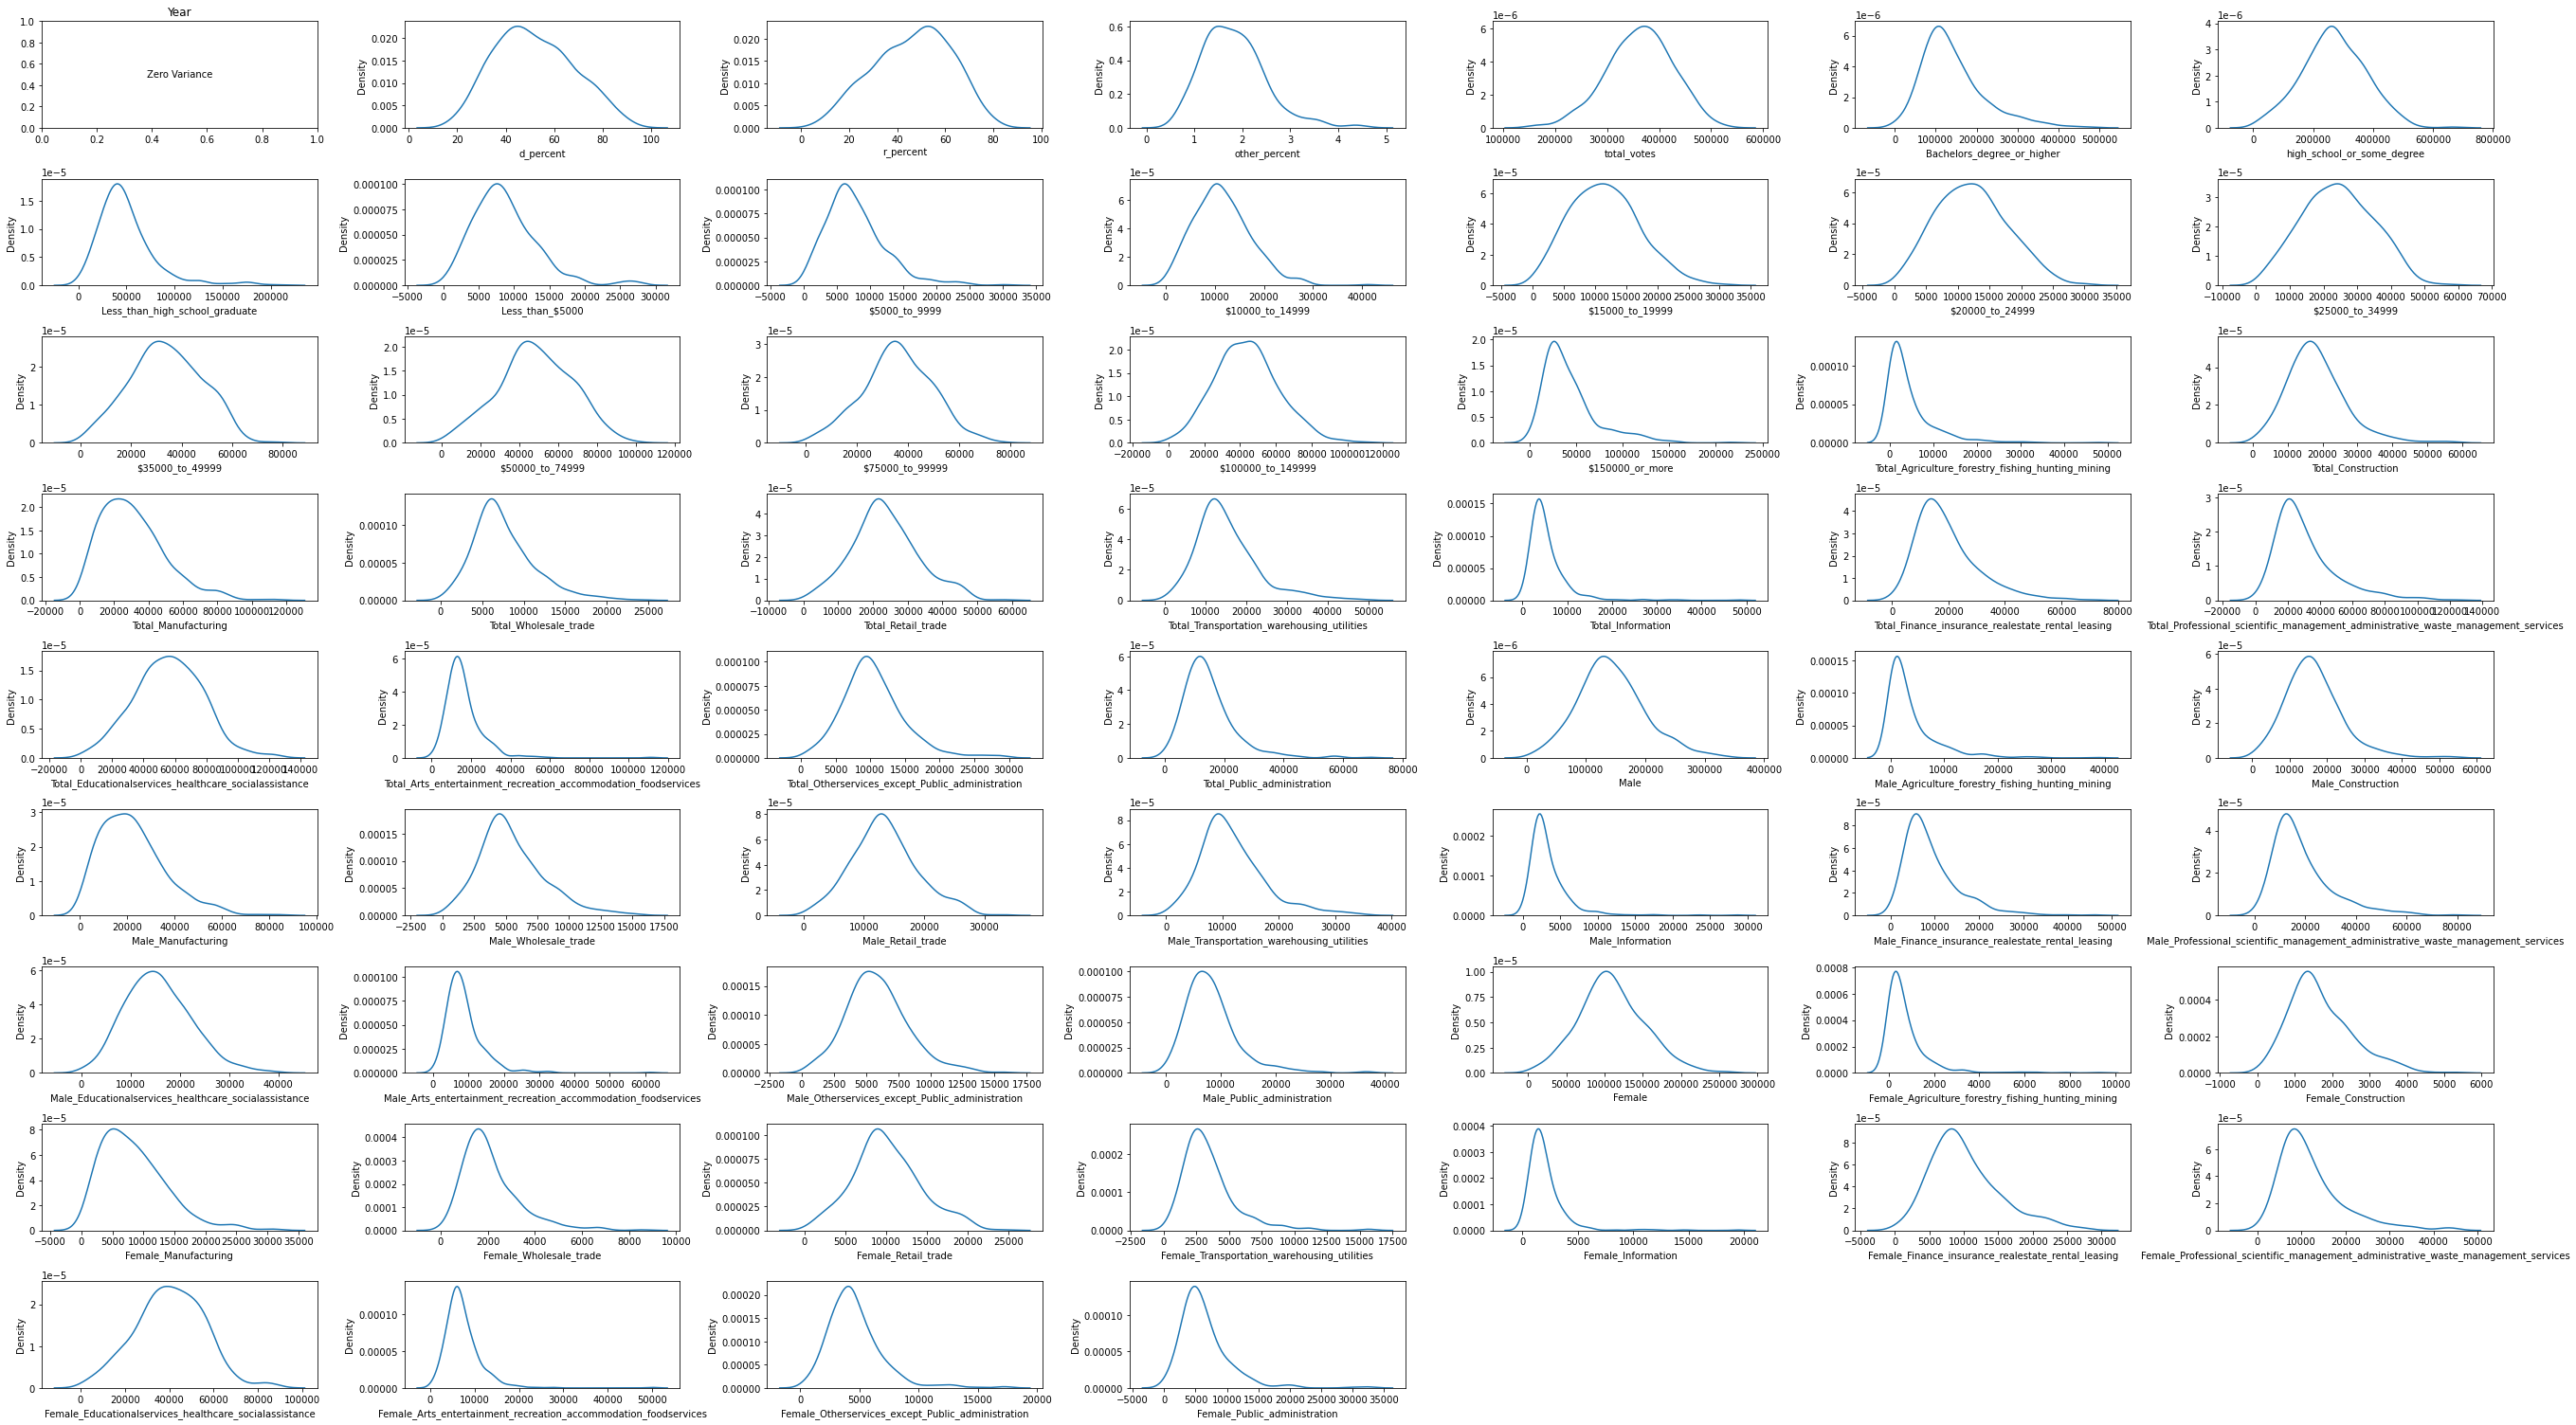

In [34]:
#grab all numeric type columns
numeric_columns = political_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#calculate the number of rows and columns needed
num_plots = len(numeric_columns)
num_cols = 7
num_rows = math.ceil(num_plots / num_cols)

#set a plot and multiple axes
fig, ax = plt.subplots(num_rows,num_cols,figsize=(37,21))
ax = ax.flatten()

#iterate over the numeric columns and plot distribution curves
for i, j in enumerate(numeric_columns):
    if political_df[j].var() != 0:  #check if the variance is not zero
        sns.kdeplot(political_df[j], ax=ax[i])
    else:
        ax[i].text(0.5, 0.5, 'Zero Variance', ha='center', va='center')
        ax[i].set_title(j)
    
#hide any unused subplots
for i in range(num_plots, len(ax)):
    fig.delaxes(ax[i])

#display results
plt.tight_layout()
plt.show()

#### Box-Cox
We proceeded to normalize the data using box-cox transformation, storing the transformed data into a separate dataframe. First, we looked at the results of applying the transformation to one column. Then we applied the transformation to all columns deemed skewed enough, storing the results in a separate dataframe.

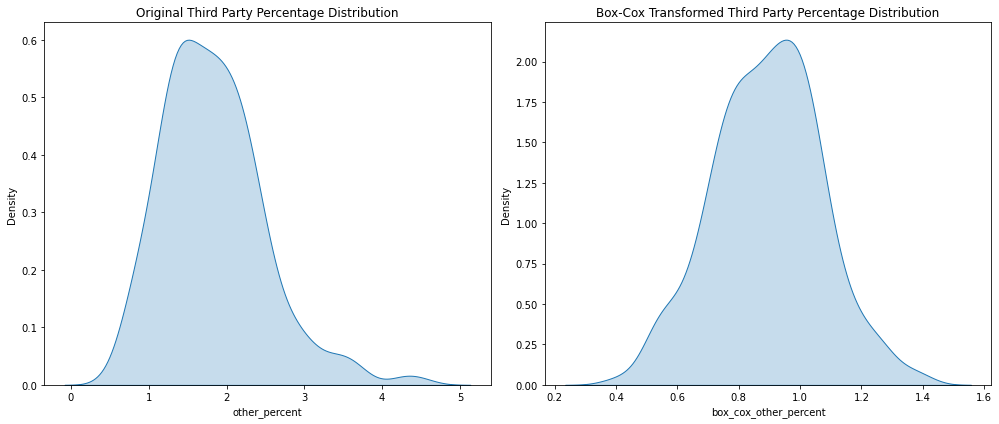

In [35]:
#copy the dataframe for normalization efforts
normal_df = political_df.copy(deep=True)

#add a constant to ensure all values are positive
normal_df['other_percent'] = normal_df['other_percent'] + 1 

#apply Box-Cox transformation
normal_df['box_cox_other_percent'], fitted_lambda = stats.boxcox(normal_df['other_percent'])

# Plot original and Box-Cox transformed data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(political_df['other_percent'], ax=axes[0], shade=True)
axes[0].set_title('Original Third Party Percentage Distribution')
sns.kdeplot(normal_df['box_cox_other_percent'], ax=axes[1], shade=True)
axes[1].set_title('Box-Cox Transformed Third Party Percentage Distribution')

plt.tight_layout()
plt.show()

In [36]:
#list of columns to apply Box-Cox transformation
columns_to_transform = [
    'Bachelors_degree_or_higher', 'Less_than_high_school_graduate', 'Less_than_$5000',
    '$5000_to_9999', '$150000_or_more', 'Total_Agriculture_forestry_fishing_hunting_mining',
    'Total_Manufacturing', 'Total_Wholesale_trade', 'Total_Transportation_warehousing_utilities',
    'Total_Information', 'Total_Finance_insurance_realestate_rental_leasing',
    'Total_Professional_scientific_management_administrative_waste_management_services',
    'Total_Arts_entertainment_recreation_accommodation_foodservices', 'Total_Public_administration',
    'Male_Agriculture_forestry_fishing_hunting_mining', 'Male_Manufacturing', 'Male_Wholesale_trade', 
    'Male_Transportation_warehousing_utilities', 'Male_Information', 
    'Male_Finance_insurance_realestate_rental_leasing',
    'Male_Professional_scientific_management_administrative_waste_management_services', 
    'Male_Arts_entertainment_recreation_accommodation_foodservices', 'Male_Public_administration',
    'Female_Agriculture_forestry_fishing_hunting_mining', 'Female_Manufacturing', 'Female_Wholesale_trade',
    'Female_Transportation_warehousing_utilities', 'Female_Information',
    'Female_Professional_scientific_management_administrative_waste_management_services',
    'Female_Arts_entertainment_recreation_accommodation_foodservices',
    'Female_Otherservices_except_Public_administration', 'Female_Public_administration'
]

#apply Box-Cox transformation to each specified column
for col in columns_to_transform:
    #apply Box-Cox transformation
    normal_df[f'box_cox_{col}'], fitted_lambda = stats.boxcox(normal_df[col] + 1)  #adding 1 to handle zero values
    #store the fitted_lambda value to check later
    print(f'Lambda for {col}: {fitted_lambda}')
    #remove the original column
    normal_df.drop(columns=[col], inplace=True)

#display the transformed DataFrame
normal_df.head()

Lambda for Bachelors_degree_or_higher: 0.36830686484531666
Lambda for Less_than_high_school_graduate: 0.25017371870565136
Lambda for Less_than_$5000: 0.41220776163471307
Lambda for $5000_to_9999: 0.40813386179843325
Lambda for $150000_or_more: 0.22030775458890195
Lambda for Total_Agriculture_forestry_fishing_hunting_mining: 0.08861204489562331
Lambda for Total_Manufacturing: 0.3785746409802615
Lambda for Total_Wholesale_trade: 0.3982299039662276
Lambda for Total_Transportation_warehousing_utilities: 0.3411038178430811
Lambda for Total_Information: 0.12057999838678898
Lambda for Total_Finance_insurance_realestate_rental_leasing: 0.2873992812919756
Lambda for Total_Professional_scientific_management_administrative_waste_management_services: 0.1428869866886102
Lambda for Total_Arts_entertainment_recreation_accommodation_foodservices: 0.18722299729922012
Lambda for Total_Public_administration: 0.3512767410139438
Lambda for Male_Agriculture_forestry_fishing_hunting_mining: 0.092637568483562

Year district  d_percent  r_percent  other_percent  total_votes  \
0  2020    AK-00      42.77      52.83           5.40     359530.0   
1  2020    AL-01      35.19      63.53           2.28     332777.0   
2  2020    AL-02      34.62      64.16           2.22     307431.0   
3  2020    AL-03      34.08      64.67           2.25     325631.0   
4  2020    AL-04      17.87      80.96           2.17     321470.0   

   high_school_or_some_degree  $10000_to_14999  $15000_to_19999  \
0                      309698             7476             8007   
1                      250831            13189            14430   
2                      333132            20593            20011   
3                      267634            14027            15101   
4                      295273            17798            18588   

   $20000_to_24999  ...  box_cox_Male_Public_administration  \
0             7831  ...                          106.459725   
1            11872  ...                           71.688367   
2            17951  ...                           96.248214   
3            13519  ...                           76.224864   
4            17614  ...                           72.659257   

   box_cox_Female_Agriculture_forestry_fishing_hunting_mining  \
0                                          13.790287            
1                                          11.116108            
2                                          10.096236            
3                                           8.616960            
4                                           9.881154            

   box_cox_Female_Manufacturing  box_cox_Female_Wholesale_trade  \
0                     34.844435                       17.805785   
1                     50.973071                       19.269273   
2                     68.016280                       20.779354   
3                     66.875861                       19.126670   
4                     70.208072                       19.041828   

   box_cox_Female_Transportation_warehousing_utilities  \
0                                          19.607561     
1                                          16.083502     
2                                          18.307072     
3                                          15.959634     
4                                          16.954379     

   box_cox_Female_Information  \
0                   15.617188   
1                   13.245938   
2                   14.796383   
3                   13.734542   
4                   13.580289   

   box_cox_Female_Professional_scientific_management_administrative_waste_management_services  \
0                                          19.312010                                            
1                                          19.754313                                            
2                                          19.750193                                            
3                                          17.952388                                            
4                                          17.955772                                            

   box_cox_Female_Arts_entertainment_recreation_accommodation_foodservices  \
0                                          24.123795                         
1                                          24.837483                         
2                                          25.422169                         
3                                          22.801226                         
4                                          23.459521                         

   box_cox_Female_Otherservices_except_Public_administration  \
0                                          39.766330           
1                                          42.625510           
2                                          42.283975           
3                                          38.426164           
4                                          37.268098           

   box_cox_Female_Pub

### Visual Data Analysis
In this section, we plotted graphs and displayed visual analysis of our findings regarding the location of swing districts and trends that can be useful in assessing the reason for certain election results around the country.  

#### Election Results by Year

This graph displays each party's percentage of the total vote by election year. In recent elections, Democrats have carried the popular vote most of the time. The third party uptick has affected both parties at different moments over the years.

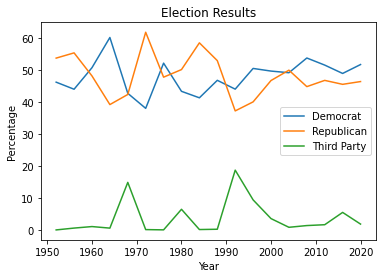

In [37]:
#group the election dataframe results by Year
grouped_df = election_df.groupby('Year').mean().reset_index()

#plot a line graph for each party's results by election year
plt.plot(grouped_df['Year'], grouped_df['d_percent'], label='Democrat')
plt.plot(grouped_df['Year'], grouped_df['r_percent'], label='Republican')
plt.plot(grouped_df['Year'], grouped_df['other_percent'], label='Third Party')

#set labels and titles
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Election Results')
plt.legend()

#display graph
plt.show()

#### Election Results by Year and State
This plot displays the parties' percentage of the total vote through the election years, separated by state. Nothing in particular jumped out at us in this graph 

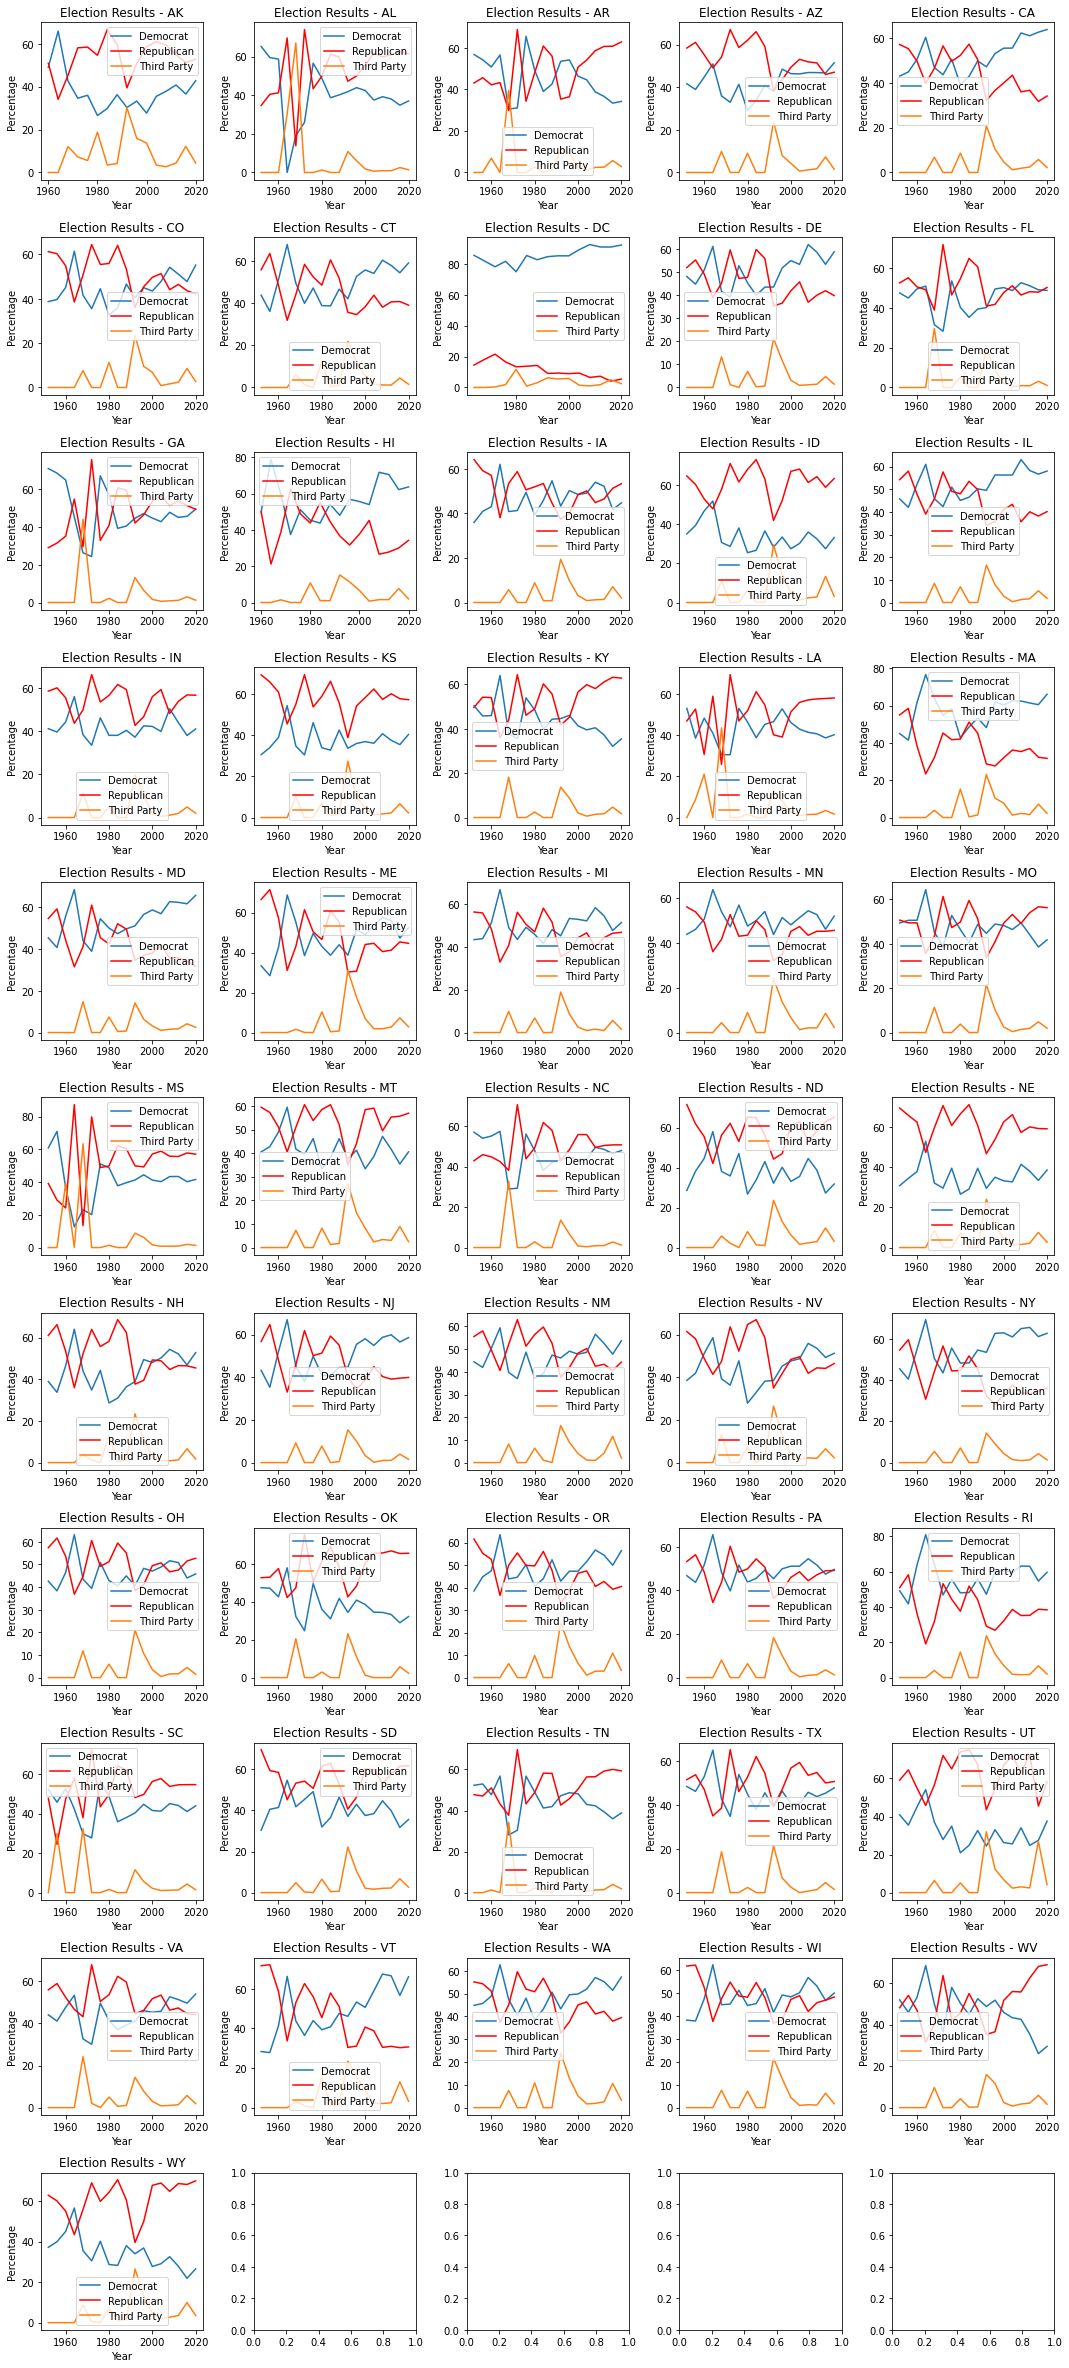

In [38]:
#create a 'state' column in election_df
election_df['state'] = election_df['district'].apply(lambda x: x[:2])

#group by 'state' and 'Year' columns and calculate the mean
grouped_df = election_df.groupby(['state', 'Year']).mean().reset_index()

#get a list of states
states = grouped_df['state'].unique()
num_states = len(states)

#calculate the number of rows and columns for the subplot grid
num_cols = 5
num_rows = (num_states + num_cols - 1) // num_cols

#create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

#iterate over states and plot on each subplot
for i, state in enumerate(states):
    state_df = grouped_df[grouped_df['state'] == state]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].plot(state_df['Year'], state_df['d_percent'], label='Democrat')
    axes[row, col].plot(state_df['Year'], state_df['r_percent'], label='Republican', color='red')
    axes[row, col].plot(state_df['Year'], state_df['other_percent'], label='Third Party')

    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_title(f'Election Results - {state}')
    axes[row, col].legend()

#display results
plt.tight_layout()
plt.show()

#### Target Column
We created the 'winner' column to be used for further viusal analysis and as our target for modeling, then we plotted a bar graph to visualize the number of district wins by party over the years. The party to carry the most districts has typically aligned with the party to win the election that year in recent elections, with the exception of 2012.

In [39]:
#set the 'winner' column in political_df
for index, row in political_df.iterrows():
    if row['d_percent'] > row['r_percent']:
        political_df.at[index, 'winner'] = 'democrat'
    elif row['r_percent'] > row['d_percent']:
        political_df.at[index, 'winner'] = 'republican'
    else:
        political_df.at[index, 'winner'] = 'neither'
        
#view sample rows 
political_df.head(10)

Year district  d_percent  r_percent  other_percent  total_votes  \
0  2020    AK-00      42.77      52.83           4.40     359530.0   
1  2020    AL-01      35.19      63.53           1.28     332777.0   
2  2020    AL-02      34.62      64.16           1.22     307431.0   
3  2020    AL-03      34.08      64.67           1.25     325631.0   
4  2020    AL-04      17.87      80.96           1.17     321470.0   
5  2020    AL-05      35.63      62.47           1.90     365610.0   
6  2020    AL-06      31.42      66.69           1.89     372834.0   
7  2020    AL-07      70.55      28.31           1.14     298712.0   
8  2020    AR-01      27.93      69.06           3.01     271712.0   
9  2020    AR-02      44.26      53.11           2.63     333347.0   

   Bachelors_degree_or_higher  high_school_or_some_degree  \
0                      121098                      309698   
1                       96025                      250831   
2                      109032                      333132   
3                       77833                      267634   
4                       69353                      295273   
5                      118293                      199894   
6                      200747                      369353   
7                       55728                      198658   
8                       95999                      398584   
9                      105763                      196882   

   Less_than_high_school_graduate  Less_than_$5000  ...  Female_Retail_trade  \
0                           33572             5949  ...                 8599   
1                           44764            10004  ...                10653   
2                           69141            14763  ...                11714   
3                           49575            13068  ...                 8521   
4                           67001             9793  ...                11044   
5                           36396             6636  ...                 7721   
6                           60132            14144  ...                13288   
7                           32083             9456  ...                 5735   
8                           69560            14442  ...                14189   
9                           23807             8516  ...                 7767   

   Female_Transportation_warehousing_utilities  Female_Information  \
0                                         5645                1726   
1                                         2347                 889   
2                                         4145                1384   
3                                         2270                1026   
4                                         2952                 981   
5                                         1969                1678   
6                                         5694                3285   
7                                         1700                 561   
8                                         4600                1380   
9                                         2486                2142   

   Female_Finance_insurance_realestate_rental_leasing  \
0                                               5924    
1                                               7997    
2                                               8717    
3                                               7766    
4                                               5745    
5                                               4729    
6                                              19878    
7                                               4647    
8                                               9503    
9                                               7453    

   Female_Professional_scientific_management_administrative_waste_management_services  \
0                                               7889                                    
1                                               8812                                    
2            

In [40]:
#view sample rows where 'democrat' is the winner
political_df[political_df['winner'] == 'democrat'].head(10)

Year district  d_percent  r_percent  other_percent  total_votes  \
7   2020    AL-07      70.55      28.31           1.14     298712.0   
12  2020    AZ-01      50.11      48.36           1.53     373579.0   
13  2020    AZ-02      54.52      43.89           1.59     391436.0   
14  2020    AZ-03      62.79      35.74           1.47     278497.0   
18  2020    AZ-07      73.66      24.73           1.61     224168.0   
20  2020    AZ-09      60.79      37.34           1.87     368798.0   
22  2020    CA-02      73.52      23.88           2.60     400545.0   
23  2020    CA-03      54.89      42.64           2.47     327561.0   
25  2020    CA-05      72.43      25.26           2.31     364624.0   
26  2020    CA-06      70.24      27.22           2.54     320643.0   

    Bachelors_degree_or_higher  high_school_or_some_degree  \
7                        55728                      198658   
12                      238202                      283685   
13                      120696                      462767   
14                       24685                      110656   
18                       16291                       67774   
20                      129242                      488434   
22                      236979                      353070   
23                      214017                      397623   
25                      153229                      487303   
26                       96816                      236822   

    Less_than_high_school_graduate  Less_than_$5000  ...  Female_Retail_trade  \
7                            32083             9456  ...                 5735   
12                           48500            11733  ...                14425   
13                           92311            18896  ...                14668   
14                           58520             4033  ...                 3771   
18                           19086             2564  ...                 2081   
20                          124233            14379  ...                18438   
22                           70389            10620  ...                13644   
23                           48507            10293  ...                11899   
25                          122054            10699  ...                13603   
26                           40311             6502  ...                 8734   

    Female_Transportation_warehousing_utilities  Female_Information  \
7                                          1700                 561   
12                                         4052                2650   
13                                         4050                1780   
14                                         2133                 580   
18                                          952                 237   
20                                         6968                1952   
22                                         3126                3871   
23                                         4184                2039   
25                                         4751                1924   
26                                         3735                1125   

    Female_Finance_insurance_realestate_rental_leasing  \
7                                                4647    
12                                              22948    
13                                              11346    
14                                               4166    
18                                               1824    
20                                              19182    
22                                              11526    
23                                              17538    
25                                              10487    
26                                               8701    

    Female_Professional_scientific_management_administrative_waste_management_services  \
7                                                3102                                    
12                                            

In [41]:
#check there are only two 'winner' values
political_df['winner'].unique()

array(['republican', 'democrat'], dtype=object)

In [42]:
#set the 'winner' column in election_df
for index, row in election_df.iterrows():
    if row['d_percent'] > row['r_percent']:
        election_df.at[index, 'winner'] = 'democrat'
    elif row['r_percent'] > row['d_percent']:
        election_df.at[index, 'winner'] = 'republican'
    else:
        election_df.at[index, 'winner'] = 'neither'

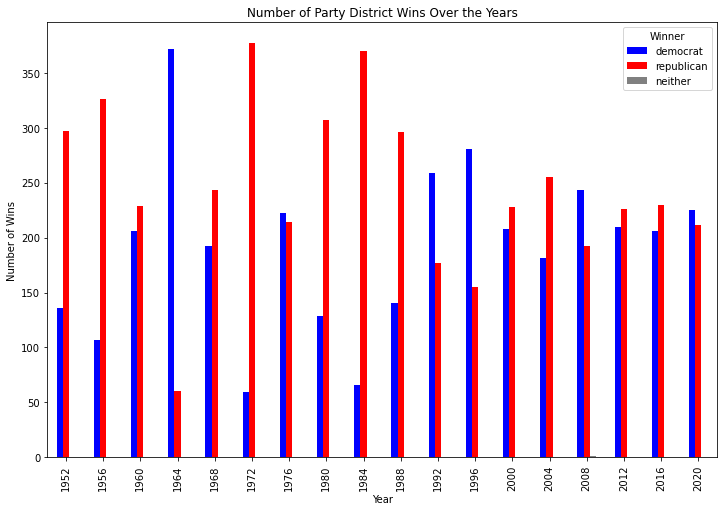

In [43]:
#group by 'Year' and 'winner', then count the occurrences
winner_count_df = election_df.groupby(['Year', 'winner']).size().unstack(fill_value=0)

#define the colors of the bars
colors = ['blue', 'red', 'grey']

#define a color mapping for each category
color_mapping = {'democrat': 'blue', 'republican': 'red', 'neither': 'grey'}


#ensure the columns are in order
columns_order = ['democrat', 'republican', 'neither']
colors = [color_mapping[col] for col in columns_order]

#plotting the aggregated data with custom colors
winner_count_df = winner_count_df[columns_order]
winner_count_df.plot(kind='bar', figsize=(12, 8), color=colors)

#set labels
plt.title('Number of Party District Wins Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Winner')

#display results
plt.show()

#### Swing District

We created a column that determines whether a district is a swing district based on if the results were within 9 points between parties. This is applied to both our election and fully merged datasets and will be used for deeper analysis. The percentage of districts with a tighter margin has increased in the past 20 years.

In [44]:
#create 'swing_district' column in election_df
for index, row in election_df.iterrows():
    if abs(row['d_percent'] - row['r_percent']) <= 9:
        election_df.at[index, 'swing_district'] = 'yes'
    else:
        election_df.at[index, 'swing_district'] = 'no'

#view sample rows
election_df.head(20)

Year district  d_percent  r_percent  other_percent  total_votes state  \
0   1952    AL-01      57.76      42.24            0.0      45915.0    AL   
1   1952    AL-02      63.19      36.81            0.0      48972.0    AL   
2   1952    AL-03      72.23      27.77            0.0      36062.0    AL   
3   1952    AL-04      64.14      35.86            0.0      41456.0    AL   
4   1952    AL-05      72.69      27.31            0.0      55867.0    AL   
5   1952    AL-06      61.27      38.73            0.0      31041.0    AL   
6   1952    AL-07      62.58      37.42            0.0      46803.0    AL   
7   1952    AL-08      79.55      20.45            0.0      48313.0    AL   
8   1952    AL-09      54.16      45.84            0.0      70365.0    AL   
9   1952    AR-01      60.83      39.17            0.0      60089.0    AR   
10  1952    AR-02      61.16      38.84            0.0      41719.0    AR   
11  1952    AR-03      42.83      57.17            0.0      90723.0    AR   
12  1952    AR-04      63.71      36.29            0.0      73375.0    AR   
13  1952    AR-05      52.21      47.79            0.0      70497.0    AR   
14  1952    AR-06      60.45      39.55            0.0      69188.0    AR   
15  1952    AZ-01      39.43      60.57            0.0     127534.0    AZ   
16  1952    AZ-02      43.78      56.22            0.0     133036.0    AZ   
17  1952    CA-01      35.46      64.54            0.0     175263.0    CA   
18  1952    CA-02      41.72      58.28            0.0     149971.0    CA   
19  1952    CA-03      48.29      51.71            0.0     177970.0    CA   

        winner swing_district  
0     democrat             no  
1     democrat             no  
2     democrat             no  
3     democrat             no  
4     democrat             no  
5     democrat             no  
6     democrat             no  
7     democrat             no  
8     democrat            yes  
9     democrat             no  
10    democrat             no  
11  republican             no  
12    democrat             no  
13    democrat            yes  
14    democrat             no  
15  republican             no  
16  republican             no  
17  republican             no  
18  republican             no  
19  republican            yes

In [45]:
#view total swing and non-swing districts
print('Total Swing Districts: ', (election_df['swing_district'] == 'yes').sum())
print('Total Non-Swing Districts: ', (election_df['swing_district'] == 'no').sum())

Total Swing Districts:  1969
Total Non-Swing Districts:  5867


In [46]:
#view total swing and non-swing districts post 2000
print('Total Swing Districts post 2000: ', (election_df[(election_df['swing_district'] == 'yes') & (election_df['Year'] >= 2000)].shape[0]))
print('Total Non-Swing Districts post 2000: ', (election_df[(election_df['swing_district'] == 'no') & (election_df['Year'] >= 2000)].shape[0]))

Total Swing Districts post 2000:  553
Total Non-Swing Districts post 2000:  2063


In [47]:
#create 'swing_district' column in political_df
for index, row in political_df.iterrows():
    if abs(row['d_percent'] - row['r_percent']) <= 9:
        political_df.at[index, 'swing_district'] = 'yes'
    else:
        political_df.at[index, 'swing_district'] = 'no'

#view sample rows
political_df.head(20)

Year district  d_percent  r_percent  other_percent  total_votes  \
0   2020    AK-00      42.77      52.83           4.40     359530.0   
1   2020    AL-01      35.19      63.53           1.28     332777.0   
2   2020    AL-02      34.62      64.16           1.22     307431.0   
3   2020    AL-03      34.08      64.67           1.25     325631.0   
4   2020    AL-04      17.87      80.96           1.17     321470.0   
5   2020    AL-05      35.63      62.47           1.90     365610.0   
6   2020    AL-06      31.42      66.69           1.89     372834.0   
7   2020    AL-07      70.55      28.31           1.14     298712.0   
8   2020    AR-01      27.93      69.06           3.01     271712.0   
9   2020    AR-02      44.26      53.11           2.63     333347.0   
10  2020    AR-03      35.18      61.87           2.95     335854.0   
11  2020    AR-04      29.60      67.65           2.75     278156.0   
12  2020    AZ-01      50.11      48.36           1.53     373579.0   
13  2020    AZ-02      54.52      43.89           1.59     391436.0   
14  2020    AZ-03      62.79      35.74           1.47     278497.0   
15  2020    AZ-04      30.59      68.00           1.41     411938.0   
16  2020    AZ-05      41.94      56.45           1.61     465598.0   
17  2020    AZ-06      47.27      51.39           1.34     432328.0   
18  2020    AZ-07      73.66      24.73           1.61     224168.0   
19  2020    AZ-08      41.39      57.28           1.33     438952.0   

    Bachelors_degree_or_higher  high_school_or_some_degree  \
0                       121098                      309698   
1                        96025                      250831   
2                       109032                      333132   
3                        77833                      267634   
4                        69353                      295273   
5                       118293                      199894   
6                       200747                      369353   
7                        55728                      198658   
8                        95999                      398584   
9                       105763                      196882   
10                      115118                      244772   
11                       84724                      352061   
12                      238202                      283685   
13                      120696                      462767   
14                       24685                      110656   
15                      241831                      412794   
16                      143662                      220154   
17                      172981                      376295   
18                       16291                       67774   
19                       61862                      162088   

    Less_than_high_school_graduate  Less_than_$5000  ...  \
0                            33572             5949  ...   
1                            44764            10004  ...   
2                            69141            14763  ...   
3                            49575            13068  ...   
4                            67001             9793  ...   
5                            36396             6636  ...   
6                            60132            14144  ...   
7                            32083             9456  ...   
8                            69560            14442  ...   
9                            23807             8516  ...   
10                           51815             7717  ...   
11                           62641            12618  ...   
12                           48500            11733  ...   
13                           92311            18896  ...   
14                           58520             4033  ...   
15                           71576            14535  ...   
16                           20575             5356  ...   
17                           71468            14243  ...   
18                           19086             2564  ...   
19       

In [48]:
#view total swing and non-swing districts in 2020
print('Total Swing Districts in 2020: ', (political_df[political_df['swing_district'] == 'yes'].shape[0]))
print('Total Non-Swing Districts in 2020: ', (political_df[political_df['swing_district'] == 'no'].shape[0]))

Total Swing Districts in 2020:  81
Total Non-Swing Districts in 2020:  347


In [49]:
#create dataframe of of swing districts in 1952 and in 2020
swing_districts_1952 = election_df[(election_df['Year'] == 1952) & (election_df['swing_district'] == 'yes')]
swing_districts_2020 = election_df[(election_df['Year'] == 2020) & (election_df['swing_district'] == 'yes')]

#merge the swing districts that are present in both elections
swing_districts_both_years = swing_districts_1952.merge(swing_districts_2020, on='district')

#display results
swing_districts_both_years

Year_x district  d_percent_x  r_percent_x  other_percent_x  total_votes_x  \
0    1952    NC-08        51.09        48.91              0.0       116991.0   
1    1952    NJ-11        46.88        53.12              0.0       131462.0   
2    1952    TX-03        49.26        50.74              0.0        74135.0   
3    1952    TX-07        54.47        45.53              0.0        57385.0   
4    1952    TX-10        50.76        49.24              0.0        77787.0   
5    1952    VA-01        47.78        52.22              0.0        52692.0   
6    1952    VA-02        52.05        47.95              0.0        51097.0   
7    1952    VA-05        46.36        53.64              0.0        55216.0   
8    1952    WA-03        46.22        53.78              0.0       147363.0   

  state_x    winner_x swing_district_x  Year_y  d_percent_y  r_percent_y  \
0      NC    democrat              yes    2020        45.60        53.04   
1      NJ  republican              yes    2020        52.46        45.86   
2      TX  republican              yes    2020        48.58        49.62   
3      TX    democrat              yes    2020        53.55        45.09   
4      TX    democrat              yes    2020        48.35        49.98   
5      VA  republican              yes    2020        46.87        51.27   
6      VA    democrat              yes    2020        51.14        46.68   
7      VA  republican              yes    2020        44.97        53.41   
8      WA  republican              yes    2020        46.56        50.30   

   other_percent_y  total_votes_y state_y    winner_y swing_district_y  
0             1.36       390839.0      NC  republican              yes  
1             1.68       453555.0      NJ    democrat              yes  
2             1.80       432029.0      TX  republican              yes  
3             1.36       317565.0      TX    democrat              yes  
4             1.67       421768.0      TX  republican              yes  
5             1.86       454745.0      VA  republican              yes  
6             2.18       361515.0      VA    democrat              yes  
7             1.62       407348.0      VA  republican              yes  
8             3.14       426189.0      WA  republican              yes

#### Swing Districts Graphs 
The following graph displays the election history of districts that have had swing-level margins in both 1952 and present day. The next graph displays the number of said swing district wins by party over the years. It was surprising to find that Republicans have won the swing districts overwhelmingly in recent elections.

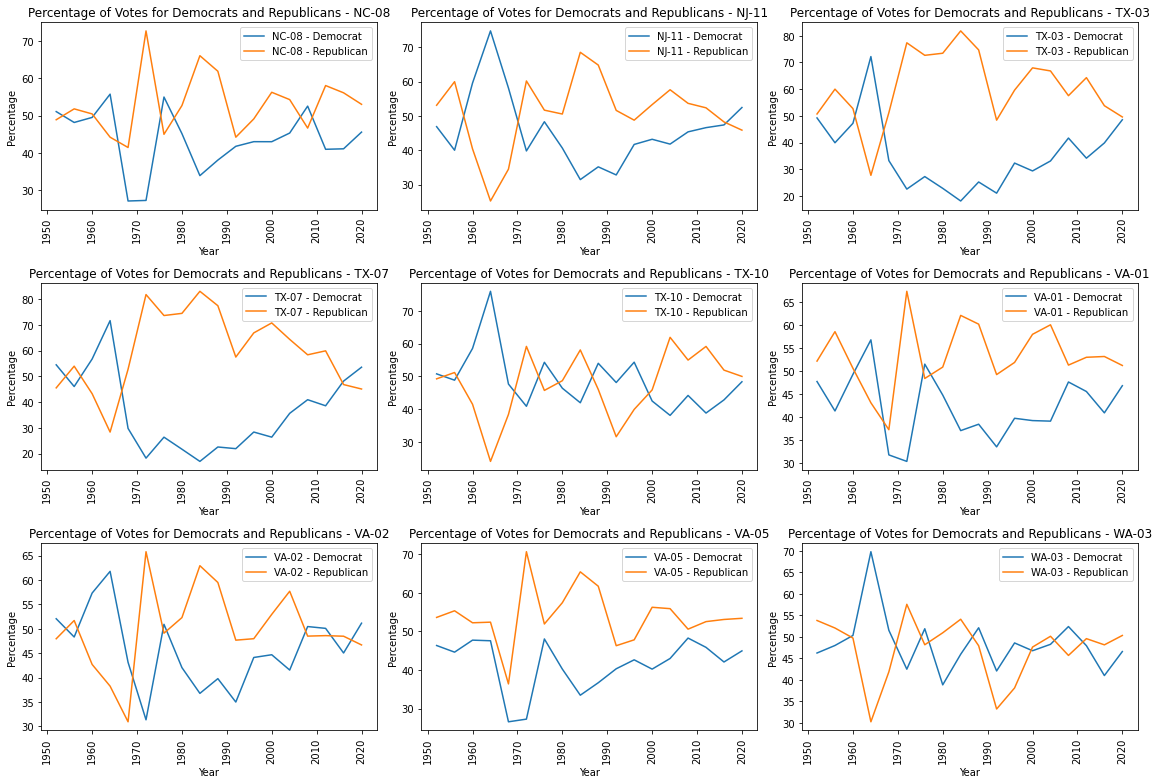

In [50]:
#filter the original election_df DataFrame for the districts in_districts_both_years
districts = swing_districts_both_years['district'].unique()

#calculate the number of rows and columns for the subplot grid
num_districts = len(districts)
num_cols = math.ceil(math.sqrt(num_districts))
num_rows = math.ceil(num_districts / num_cols)

#create subplots for each district
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 11))

#flatten the axs array if necessary
if num_districts == 1:
    axs = [axs]

#plot a separate graph for each district
for i, district in enumerate(districts):
    district_data = election_df[election_df['district'] == district]
    ax = axs[i // num_cols, i % num_cols]
    ax.plot(district_data['Year'], district_data['d_percent'], label=f'{district} - Democrat')
    ax.plot(district_data['Year'], district_data['r_percent'], label=f'{district} - Republican')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Percentage of Votes for Democrats and Republicans - {district}')
    ax.legend()
    ax.tick_params(axis='x', rotation=90)

#remove empty subplots if necessary
if num_districts < num_rows * num_cols:
    for i in range(num_districts, num_rows * num_cols):
        fig.delaxes(axs[i // num_cols, i % num_cols])

#display results 
plt.tight_layout()
plt.show()

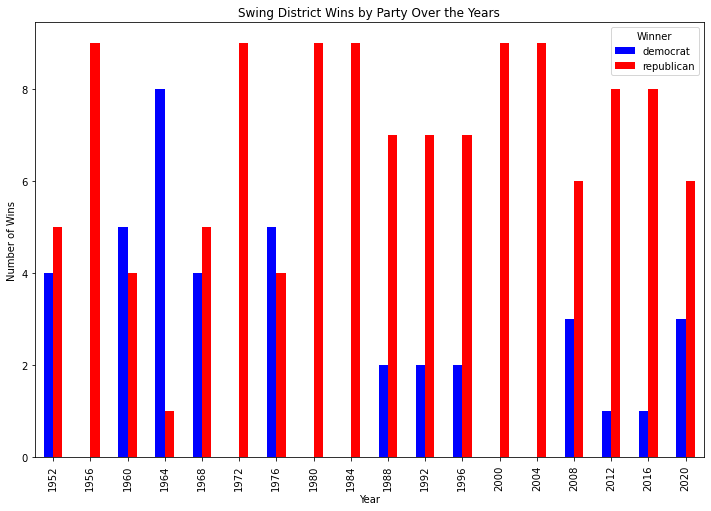

In [51]:
#filter out the swing districts
swing_election_df = election_df[election_df['district'].isin(districts)]

#group by 'Year' and 'winner', then count the occurrences
winner_count_swing = swing_election_df.groupby(['Year', 'winner']).size().unstack(fill_value=0)

#ensure the columns are in order
columns_order = ['democrat', 'republican']
colors = [color_mapping[col] for col in columns_order]

#plotting the aggregated data with custom colors
winner_count_swing = winner_count_swing[columns_order]
winner_count_swing.plot(kind='bar', figsize=(12, 8), color=colors)

#set labels
plt.title('Swing District Wins by Party Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Winner')
plt.show()

#### Total Votes by Party
Here, we add a column that displays each party's total votes in election_df and political_df.

In [52]:
#create 'total_votes' columns by party and display sample rows in election_df
election_df['r_total_votes'] = election_df['r_percent'] * .01 * election_df['total_votes']
election_df['r_total_votes'] = election_df['r_total_votes'].astype(int)
election_df['d_total_votes'] = election_df['d_percent'] * .01 * election_df['total_votes']
election_df['d_total_votes'] = election_df['d_total_votes'].astype(int)
election_df.head()

Year district  d_percent  r_percent  other_percent  total_votes state  \
0  1952    AL-01      57.76      42.24            0.0      45915.0    AL   
1  1952    AL-02      63.19      36.81            0.0      48972.0    AL   
2  1952    AL-03      72.23      27.77            0.0      36062.0    AL   
3  1952    AL-04      64.14      35.86            0.0      41456.0    AL   
4  1952    AL-05      72.69      27.31            0.0      55867.0    AL   

     winner swing_district  r_total_votes  d_total_votes  
0  democrat             no          19394          26520  
1  democrat             no          18026          30945  
2  democrat             no          10014          26047  
3  democrat             no          14866          26589  
4  democrat             no          15257          40609

In [53]:
#create 'total_votes' columns by party and display sample rows in political_df
political_df['r_total_votes'] = political_df['r_percent'] * .01 * political_df['total_votes']
political_df['r_total_votes'] = political_df['r_total_votes'].astype(int)
political_df['d_total_votes'] = political_df['d_percent'] * .01 * political_df['total_votes']
political_df['d_total_votes'] = political_df['d_total_votes'].astype(int)
political_df.head()

Year district  d_percent  r_percent  other_percent  total_votes  \
0  2020    AK-00      42.77      52.83           4.40     359530.0   
1  2020    AL-01      35.19      63.53           1.28     332777.0   
2  2020    AL-02      34.62      64.16           1.22     307431.0   
3  2020    AL-03      34.08      64.67           1.25     325631.0   
4  2020    AL-04      17.87      80.96           1.17     321470.0   

   Bachelors_degree_or_higher  high_school_or_some_degree  \
0                      121098                      309698   
1                       96025                      250831   
2                      109032                      333132   
3                       77833                      267634   
4                       69353                      295273   

   Less_than_high_school_graduate  Less_than_$5000  ...  \
0                           33572             5949  ...   
1                           44764            10004  ...   
2                           69141            14763  ...   
3                           49575            13068  ...   
4                           67001             9793  ...   

   Female_Finance_insurance_realestate_rental_leasing  \
0                                               5924    
1                                               7997    
2                                               8717    
3                                               7766    
4                                               5745    

   Female_Professional_scientific_management_administrative_waste_management_services  \
0                                               7889                                    
1                                               8812                                    
2                                               8803                                    
3                                               5546                                    
4                                               5551                                    

   Female_Educationalservices_healthcare_socialassistance  \
0                                              35809        
1                                              36343        
2                                              43616        
3                                              34563        
4                                              36535        

   Female_Arts_entertainment_recreation_accommodation_foodservices  \
0                                               6225                 
1                                               7015                 
2                                               7720                 
3                                               4949                 
4                                               5555                 

   Female_Otherservices_except_Public_administration  \
0                                               3715   
1                                               4551   
2                                               4445   
3                                               3362   
4                                               3076   

   Female_Public_administration      winner  swing_district  r_total_votes  \
0                         14619  republican              no         189939   
1                          5038  republican              no         211413   
2                         12631  republican              no         197247   
3                          4704  republican              no         210585   
4                          4866  republican              no         260262   

   d_total_votes  
0         153770  
1         117104  
2         106432  
3         110975  
4          57446  

[5 rows x 65 columns]

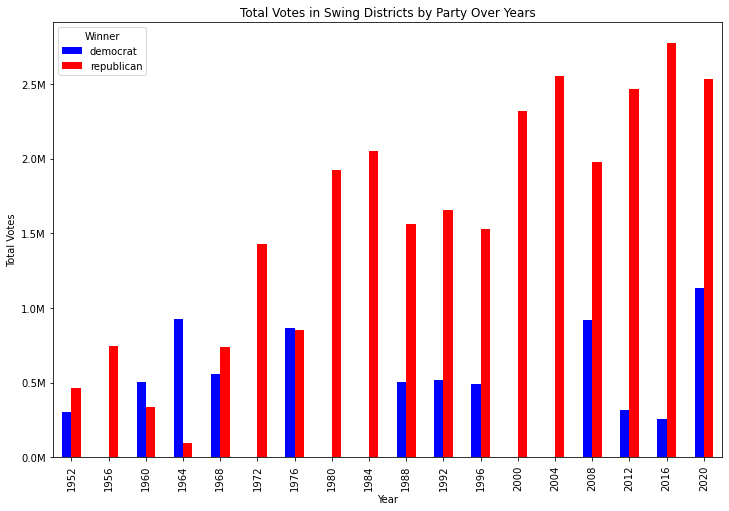

In [54]:
#group by 'Year' and 'winner', then sum the 'total_votes'
total_votes_swing = swing_election_df.groupby(['Year', 'winner'])['total_votes'].sum().unstack(fill_value=0)

#plotting the aggregated data with custom colors
total_votes_swing = total_votes_swing[columns_order]  # Reorder columns if necessary
ax = total_votes_swing.plot(kind='bar', figsize=(12, 8), color=colors)

#set labels
plt.title('Total Votes in Swing Districts by Party Over Years')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend(title='Winner')

#format the x-axis labels to be more readable (e.g., using millions)
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6))
ax.yaxis.set_major_formatter(formatter)

#display results
plt.show()

### State Election Results

We created a dataframe grouping the election results by state for analysis, including examination of each state's share of the national vote.

In [55]:
#group election_df by state into new dataframe
state_election_df = election_df.groupby(['state', 'Year']).agg({
    'total_votes': 'sum',
    'd_percent': 'mean',
    'r_percent': 'mean',
    'r_total_votes': 'sum',
    'd_total_votes': 'sum'
}).reset_index()

In [56]:
#create 'national_percent' column in state_election_df
state_election_df['national_percent'] = state_election_df['total_votes'] / state_election_df.groupby('Year')['total_votes'].transform('sum')

In [57]:
#view sample rows in California
state_election_df[state_election_df['state'] == 'CA'].head(18)

state  Year  total_votes  d_percent  r_percent  r_total_votes  \
70    CA  1952    5022476.0  42.978333  57.021667        2846212   
71    CA  1956    5378511.0  44.806667  55.193333        2977696   
72    CA  1960    5622012.0  50.409333  49.590667        2800272   
73    CA  1964    7027389.0  60.254211  39.745789        2840172   
74    CA  1968    7056629.0  46.778684  46.407632        3379759   
75    CA  1972    8056796.0  43.571395  56.428605        4590299   
76    CA  1976    7591811.0  50.485581  49.514419        3861052   
77    CA  1980    8346967.0  39.174186  52.207907        4523470   
78    CA  1984    9389472.0  42.800000  57.200000        5466956   
79    CA  1988    9757150.0  49.707556  50.292444        5054920   
80    CA  1992   11106550.0  47.110385  32.090769        3623061   
81    CA  1996   10018637.0  53.005385  36.595962        3828344   
82    CA  2000   10965042.0  55.402885  39.891538        4567260   
83    CA  2004   12403086.0  55.440000  43.375283        5509792   
84    CA  2008   13541664.0  62.174717  35.939057        5011784   
85    CA  2012   13015296.0  60.950377  36.635849        4839927   
86    CA  2016   14059192.0  62.533962  31.668679        4483475   
87    CA  2020   17502813.0  63.706981  34.080755        6006089   

    d_total_votes  national_percent  
70        2176234          0.076843  
71        2400785          0.081644  
72        2821711          0.082788  
73        4187181          0.101577  
74        3195513          0.097731  
75        3466454          0.105934  
76        3730716          0.095371  
77        3083172          0.098084  
78        3922471          0.101948  
79        4702185          0.107330  
80        5111219          0.106796  
81        5119715          0.104495  
82        5860465          0.104168  
83        6745482          0.101597  
84        8274431          0.103177  
85        7854508          0.100942  
86        8752462          0.103099  
87       11109943          0.110501

In [58]:
#display modern day swing states
print("Modern Day Swing States: ")
swing_states = []

#filter the dataframe for years starting from 2000 onwards
state_filtered_df = state_election_df[state_election_df['Year'] >= 2000]

#group the filtered dataframe by 'state' and check the conditions for swing states
for state, group in state_filtered_df.groupby('state'):
    if any(group['d_total_votes'] > group['r_total_votes']) and any(group['d_total_votes'] < group['r_total_votes']):
        swing_states.append(state)
for state in swing_states:
    print(state)
print("Number of Swing States:",len(swing_states))

Modern Day Swing States: 
AZ
CO
FL
GA
IA
IN
MI
NC
NH
NM
NV
OH
PA
VA
WI
Number of Swing States: 15


Our calculations found that there are 15 states today that can theoretically qualify as a swing state.

### Swing States Election Results
This graph displays the election results by party for each swing state over the years. Democrats' performance in these states have generally improved over the past couple of decades

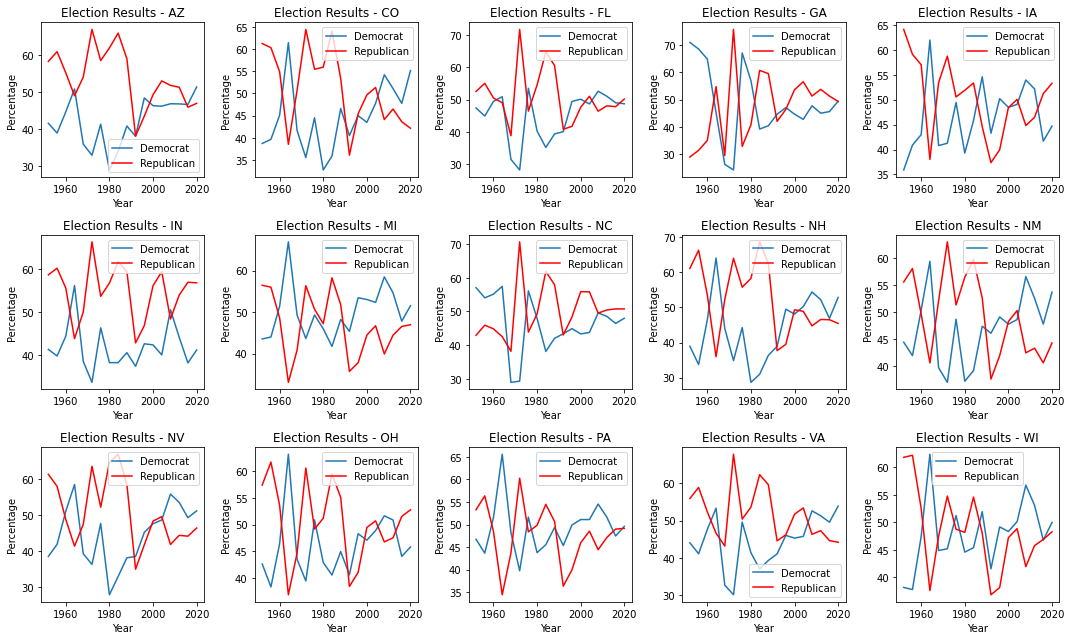

In [59]:
#get number of swing states
num_states = len(swing_states)

#calculate the number of rows and columns for the subplot grid
num_cols = 5
num_rows = (num_states + num_cols - 1) // num_cols

#create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

#iterate over states and plot on each subplot
for i, state in enumerate(swing_states):
    state_df = state_election_df[state_election_df['state'] == state]

    row = i // num_cols
    col = i % num_cols

    axes[row, col].plot(state_df['Year'], state_df['d_percent'], label='Democrat')
    axes[row, col].plot(state_df['Year'], state_df['r_percent'], label='Republican', color='red')
    #axes[row, col].plot(state_election_df['Year'], state_election_df['other_percent'], label='Third Party')

    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_title(f'Election Results - {state}')
    axes[row, col].legend()

#display results
plt.tight_layout()
plt.show()

#### Swing State Winner 
We then filtered the data to group by swing states and visualized the winning party over the years in terms of total number of swing state wins, total votes across the swing states, and the winning party of each swing state.

In [60]:
#filter dataframe to just include swing states
swing_state_df = state_election_df.loc[state_election_df['state'].isin(swing_states)].copy()

#set the 'winner' column in swing_state_df
for index, row in swing_state_df.iterrows():
    if row['d_total_votes'] > row['r_total_votes']:
        swing_state_df.at[index, 'winner'] = 'democrat'
    elif row['r_total_votes'] > row['d_total_votes']:
        swing_state_df.at[index, 'winner'] = 'republican'
    else:
        swing_state_df.at[index, 'winner'] = 'neither'
        
#view sample rows 
swing_state_df.head(10)

state  Year  total_votes  d_percent  r_percent  r_total_votes  \
52    AZ  1952     260570.0  41.605000  58.395000         152039   
53    AZ  1956     289870.0  38.960000  61.040000         176984   
54    AZ  1960     398022.0  44.725000  55.275000         221239   
55    AZ  1964     451549.5  50.926667  49.073333         223180   
56    AZ  1968     481177.0  35.960000  54.146667         264814   
57    AZ  1972     601352.0  32.935000  67.065000         402803   
58    AZ  1976     712980.0  41.377500  58.622500         418071   
59    AZ  1980     851844.0  28.947500  62.047500         529079   
60    AZ  1984    1015270.0  33.934000  66.066000         681432   
61    AZ  1988    1156570.0  40.870000  59.130000         702550   

    d_total_votes  national_percent      winner  
52         108529          0.003987  republican  
53         112884          0.004400  republican  
54         176781          0.005861  republican  
55         228366          0.006527    democrat  
56         170017          0.006664  republican  
57         198545          0.007907  republican  
58         294905          0.008957  republican  
59         246415          0.010010  republican  
60         333833          0.011024  republican  
61         454015          0.012722  republican

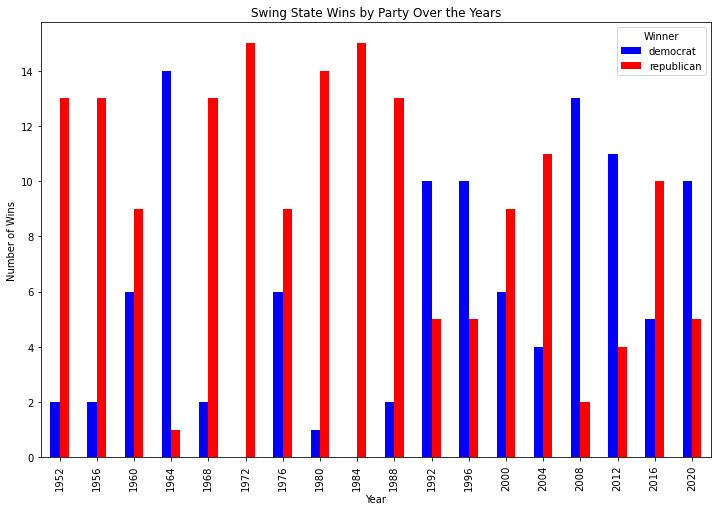

In [61]:
#group by 'Year' and 'winner', then count the occurrences
winner_swing_state = swing_state_df.groupby(['Year', 'winner']).size().unstack(fill_value=0)

#ensure the columns are in order
columns_order = ['democrat', 'republican']
colors = [color_mapping[col] for col in columns_order]

#plotting the aggregated data with custom colors
winner_swing_state = winner_swing_state[columns_order]
winner_swing_state.plot(kind='bar', figsize=(12, 8), color=colors)

#set labels
plt.title('Swing State Wins by Party Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Winner')
plt.show()

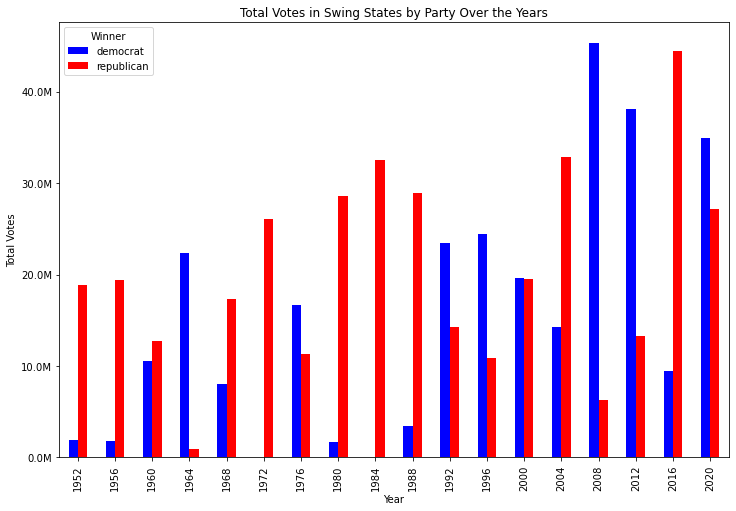

In [62]:
#group by 'Year' and 'winner', then sum the 'total_votes'
total_votes_state = swing_state_df.groupby(['Year', 'winner'])['total_votes'].sum().unstack(fill_value=0)

#plotting the aggregated data with custom colors
total_votes_state = total_votes_state[columns_order]  # Reorder columns if necessary
ax = total_votes_state.plot(kind='bar', figsize=(12, 8), color=colors)

#set labels
plt.title('Total Votes in Swing States by Party Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend(title='Winner')

#format the x-axis labels to be more readable (e.g., using millions)
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6))
ax.yaxis.set_major_formatter(formatter)

#display results
plt.show()

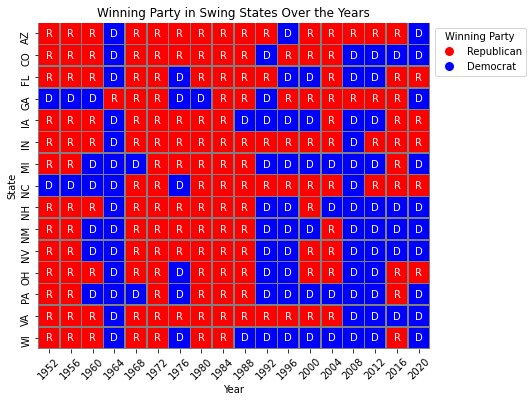

In [63]:
#encode winner column
party_mapping = {'republican': 1, 'democrat': 0}
swing_state_df['winner_encoded'] = swing_state_df['winner'].map(party_mapping)

#pivoting the DataFrame for heatmap
pivot_df = swing_state_df.pivot(index='state', columns='Year', values='winner_encoded')

#fill NaN values with a placeholder
pivot_df = pivot_df.fillna(np.nan)

#custom colormap
cmap = sns.color_palette(["#0000FF", "#FF0000"], as_cmap=True)  

#heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_df, cmap=cmap, cbar=False, linewidths=.5, linecolor='grey', square=True, annot=False)

#adding text annotations for 'Republican' and 'Democrat'
for i in range(len(pivot_df.index)):
    for j in range(len(pivot_df.columns)):
        value = pivot_df.iloc[i, j]
        if not np.isnan(value):
            text = 'R' if value == 1 else 'D'
            ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='white')

#adding a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Republican', markersize=10, markerfacecolor='#FF0000'),
                   Line2D([0], [0], marker='o', color='w', label='Democrat', markersize=10, markerfacecolor='#0000FF')]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1,1), title='Winning Party')

#set labels
plt.title('Winning Party in Swing States Over the Years')
plt.ylabel('State')
plt.xlabel('Year')
plt.xticks(rotation=45)

#display results
plt.show()

In [64]:
#create dataframe of election data post 2000
modern_election_df = election_df[election_df['Year'] >= 2000]
modern_election_df.head()

Year district  d_percent  r_percent  other_percent  total_votes state  \
5222  2000    AK-00      27.67      58.62          13.71     285560.0    AK   
5223  2000    AL-01      37.75      60.17           2.08     233974.0    AL   
5224  2000    AL-02      35.53      62.92           1.55     231428.0    AL   
5225  2000    AL-03      41.30      56.79           1.91     222458.0    AL   
5226  2000    AL-04      38.90      59.25           1.85     232673.0    AL   

          winner swing_district  r_total_votes  d_total_votes  
5222  republican             no         167395          79014  
5223  republican             no         140782          88325  
5224  republican             no         145614          82226  
5225  republican             no         126333          91875  
5226  republican             no         137858          90509

#### Swing State Districts
Next, we graphed each swing state's districts, indicating their percentage of the state vote, the winning party in 2020, and whether or not they qualify as a swing district.

In [65]:
#make a copy
state_filtered_df = state_filtered_df.copy()

#create 'swing_district' column in election_df
state_filtered_df.loc[state_filtered_df['state'].isin(swing_states), 'swing_state'] = 'yes'

#view sample rows
state_filtered_df.head(20)

state  Year  total_votes  d_percent  r_percent  r_total_votes  \
10    AK  2000     285560.0  27.670000  58.620000         167395   
11    AK  2004     312598.0  35.520000  61.070000         190903   
12    AK  2008     326197.0  37.890000  59.420000         193826   
13    AK  2012     300495.0  40.810000  54.800000         164671   
14    AK  2016     318608.0  36.550000  51.280000         163382   
15    AK  2020     359530.0  42.770000  52.830000         189939   
28    AL  2000    1665242.0  42.474286  55.674286         941159   
29    AL  2004    1881835.0  37.504286  61.837143        1175533   
30    AL  2008    2098939.0  39.240000  59.857143        1266505   
31    AL  2012    2070184.0  38.072857  61.018571        1255881   
32    AL  2016    2101661.0  34.865714  62.597143        1318279   
33    AL  2020    2324465.0  37.051429  61.541429        1441110   
46    AR  2000     921781.0  46.430000  50.780000         472924   
47    AR  2004    1054945.0  44.670000  54.185000         572917   
48    AR  2008    1086617.0  38.815000  58.742500         638033   
49    AR  2012    1069468.0  36.680000  60.757500         647764   
50    AR  2016    1130635.0  33.415000  60.862500         684871   
51    AR  2020    1219069.0  34.242500  62.922500         760648   
64    AZ  2000    1531766.0  46.373333  49.360000         781631   
65    AZ  2004    2010568.0  46.243750  53.103750        1104264   

    d_total_votes  national_percent swing_state  
10          79014          0.002713         NaN  
11         111034          0.002561         NaN  
12         123596          0.002485         NaN  
13         122632          0.002331         NaN  
14         116451          0.002336         NaN  
15         153770          0.002270         NaN  
28         692638          0.015820         NaN  
29         693812          0.015415         NaN  
30         813452          0.015992         NaN  
31         795596          0.016056         NaN  
32         729570          0.015412         NaN  
33         850108          0.014675         NaN  
46         422742          0.008757         NaN  
47         469978          0.008641         NaN  
48         422313          0.008279         NaN  
49         394401          0.008294         NaN  
50         380484          0.008291         NaN  
51         423915          0.007696         NaN  
64         685323          0.014552         yes  
65         893498          0.016469         yes

In [66]:
#print whether each district is a swing district for every swing state
for state in swing_states:
    print('\n')
    print(f"{state} districts: ")
    for index, row in modern_election_df.iterrows():
        if row['Year'] == 2020 and row['state'] == state:
            print(f"{row['district']}: {row['swing_district']} swing district")



AZ districts: 
AZ-01: yes swing district
AZ-02: no swing district
AZ-03: no swing district
AZ-04: no swing district
AZ-05: no swing district
AZ-06: yes swing district
AZ-07: no swing district
AZ-08: no swing district
AZ-09: no swing district


CO districts: 
CO-01: no swing district
CO-02: no swing district
CO-03: yes swing district
CO-04: no swing district
CO-05: no swing district
CO-06: no swing district
CO-07: no swing district


FL districts: 
FL-01: no swing district
FL-02: no swing district
FL-03: no swing district
FL-04: no swing district
FL-05: no swing district
FL-06: no swing district
FL-07: no swing district
FL-08: no swing district
FL-09: yes swing district
FL-10: no swing district
FL-11: no swing district
FL-12: no swing district
FL-13: yes swing district
FL-14: no swing district
FL-15: yes swing district
FL-16: yes swing district
FL-17: no swing district
FL-18: yes swing district
FL-19: no swing district
FL-20: no swing district
FL-21: no swing district
FL-22: no swing 

In [67]:
#copy
modern_election_df = modern_election_df.copy()

#add swing_state column
modern_election_df.loc[:,'swing_state'] = modern_election_df['state'].apply(lambda x: 'yes' if x in swing_states else 'no')

#create 'state_percent' column in modern_election_df
modern_election_df['state_percent'] = modern_election_df['total_votes'] / modern_election_df.groupby(['Year', 'state'])['total_votes'].transform('sum')

#display results
modern_election_df.head()

Year district  d_percent  r_percent  other_percent  total_votes state  \
5222  2000    AK-00      27.67      58.62          13.71     285560.0    AK   
5223  2000    AL-01      37.75      60.17           2.08     233974.0    AL   
5224  2000    AL-02      35.53      62.92           1.55     231428.0    AL   
5225  2000    AL-03      41.30      56.79           1.91     222458.0    AL   
5226  2000    AL-04      38.90      59.25           1.85     232673.0    AL   

          winner swing_district  r_total_votes  d_total_votes swing_state  \
5222  republican             no         167395          79014          no   
5223  republican             no         140782          88325          no   
5224  republican             no         145614          82226          no   
5225  republican             no         126333          91875          no   
5226  republican             no         137858          90509          no   

      state_percent  
5222       1.000000  
5223       0.140505  
5224       0.138976  
5225       0.133589  
5226       0.139723

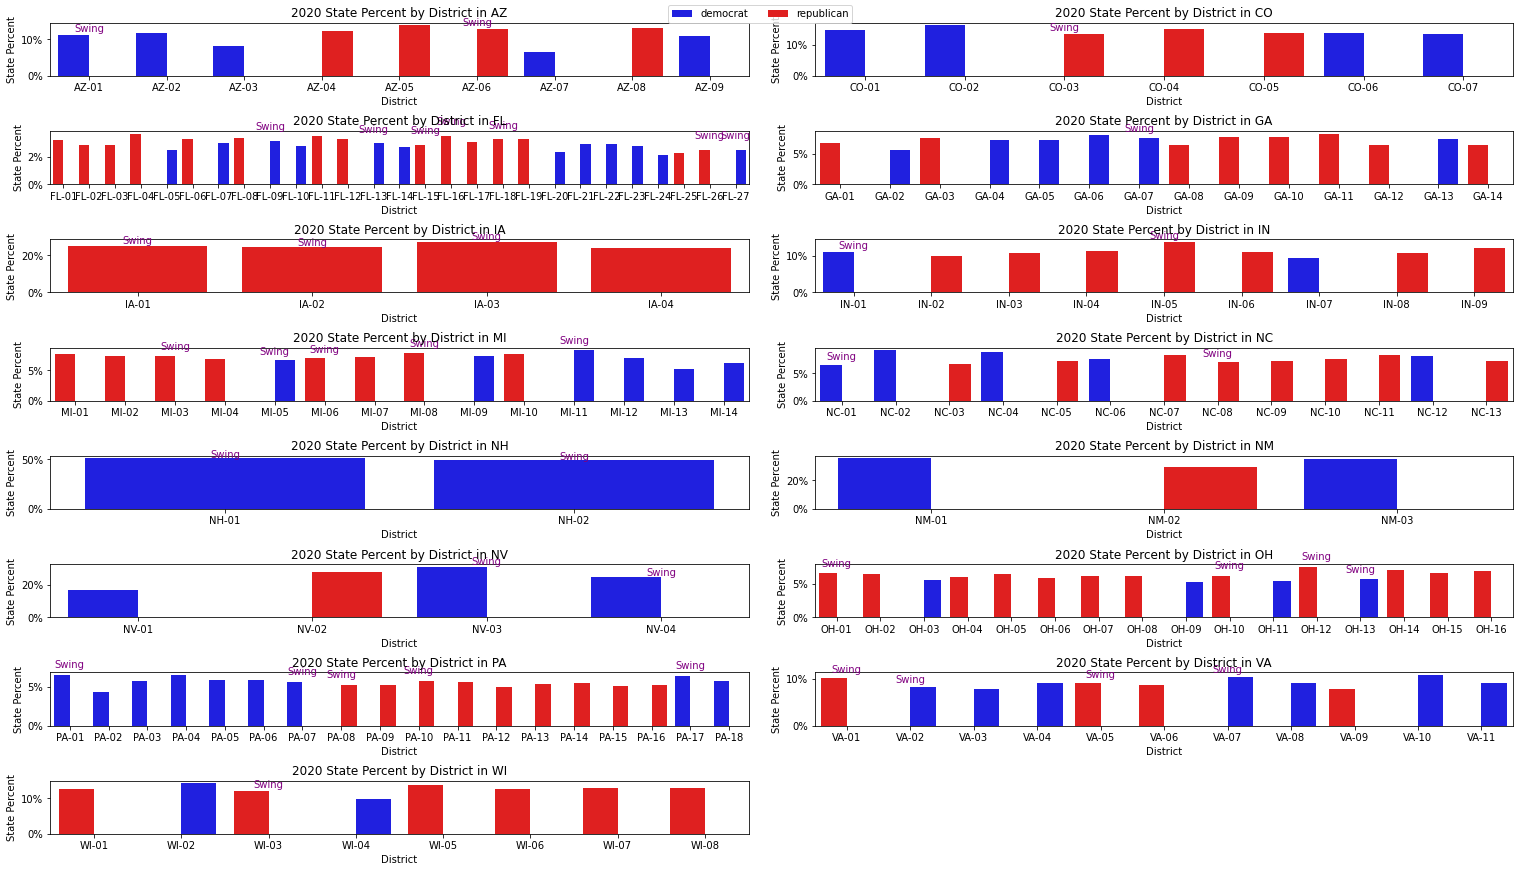

In [68]:
#filter DataFrame for the year 2020
df_2020 = modern_election_df[modern_election_df['Year'] == 2020]

#number of subplots
num_states = len(swing_states)
num_cols = 2  
num_rows = (num_states + num_cols - 1) // num_cols 

#create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 12), constrained_layout=True)

#flatten axes array 
axes = axes.flatten()

#function to format y-axis as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'


#iterate over swing states and plot
for idx, state in enumerate(swing_states):
    state_df = df_2020[df_2020['state'] == state]

    if not state_df.empty:
        sns.barplot(
            x='district', 
            y='state_percent', 
            hue='winner', 
            data=state_df,
            dodge=True,
            palette={'democrat': 'blue', 'republican': 'red'},
            ax=axes[idx]
        )

        #adding markers to indicate swing_district
        for i in range(len(state_df)):
            district = state_df.iloc[i]['district']
            state_percent = state_df.iloc[i]['state_percent']
            swing_district = state_df.iloc[i]['swing_district']

            color = 'purple' if swing_district == 'yes' else 'black'
            axes[idx].text(
                i, 
                state_percent + 0.01, 
                'Swing' if swing_district == 'yes' else '',
                color=color,
                ha="center"
            )

        axes[idx].set_title(f"2020 State Percent by District in {state}")
        axes[idx].set_xlabel("District")
        axes[idx].set_ylabel("State Percent")
        axes[idx].yaxis.set_major_formatter(ticker.FuncFormatter(to_percent))

#remove legends from individual subplots
handles, labels = axes[0].get_legend_handles_labels()
for ax in axes:
    legend = ax.get_legend()
    if legend:
        legend.remove()

#add a single legend to the top of the figure
fig.legend(handles, labels, loc='upper center', ncol=len(labels))

#remove empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

#display results
plt.show()

It's noteworthy that Democrats don't necessarily win the most districts in these states. This is an indicator of how the population is uneven and largely confined to a handful of districts.

#### Winning Party Factors

In these next two cells, we graphed the difference in average 2020 Census factors for each of the winning parties' total victories for further analysis. We first started by selecting a few columns of interest. 

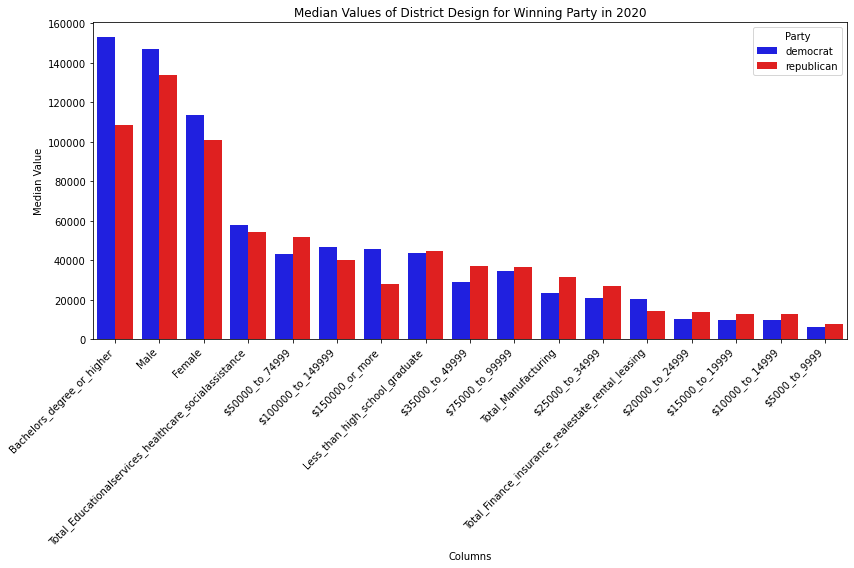

In [69]:
# Example columns to be extracted (replace with your actual column names)
columns_of_interest = ['Bachelors_degree_or_higher', 'Less_than_high_school_graduate', 
                       'Total_Manufacturing', 'Total_Finance_insurance_realestate_rental_leasing', 
                       'Total_Educationalservices_healthcare_socialassistance', 'Male', 'Female', '$5000_to_9999',
                      '$10000_to_14999', '$15000_to_19999', '$20000_to_24999', '$25000_to_34999',
                       '$35000_to_49999', '$50000_to_74999', '$75000_to_99999', '$100000_to_149999', '$150000_or_more']

# Grouping by the 'winner' column
winner_grouped_df = political_df.groupby('winner')[columns_of_interest].median().reset_index()

#melt the dataframe to long format for plotting
winner_melted_grouped_df = winner_grouped_df.melt(id_vars='winner', var_name='Column', value_name='Median')

#sort the values in descending order
winner_melted_grouped_df = winner_melted_grouped_df.sort_values(by='Median', ascending=False)
#define custom color palette
custom_palette = {
    'democrat': 'blue',
    'republican': 'red'
}

#create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=winner_melted_grouped_df, x='Column', y='Median', hue='winner', palette=custom_palette)

#customize the plot
plt.title('Median Values of District Design for Winning Party in 2020')
plt.xlabel('Columns')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Party')

#display results
plt.tight_layout()
plt.show()

After taking a few sample columns, we found some interesting information. For example, according to our graph, Democrats clearly perform better in districts that have a higher number of college graduates, as well as a higher number of wealthy constituents, while Republicans clearly perform better in districts that are lower income, as well as districts with a higher number of manufacturing jobs. Next, we decided to plot a graph based on the top 5 factors for each party, calculated by the wides margin of leads by percentage.

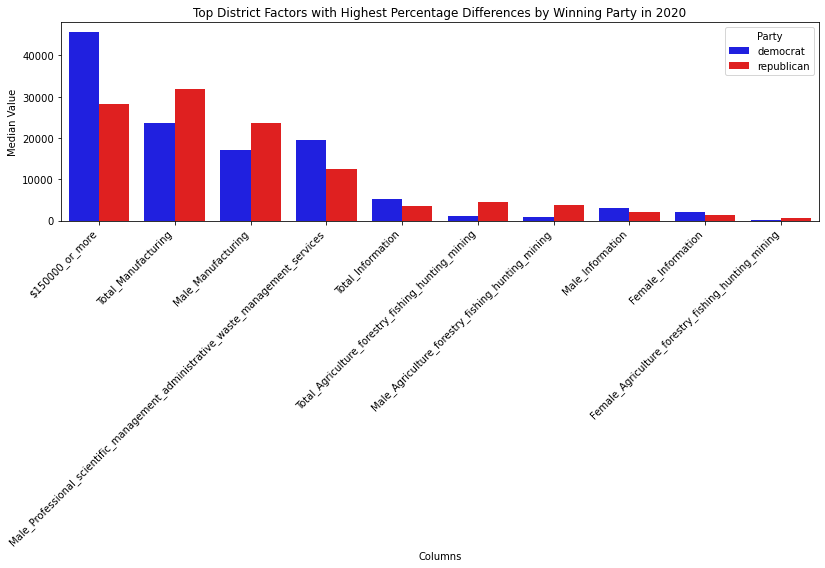

In [70]:
#identify numeric columns
political_numeric_columns = political_df.select_dtypes(include='number').columns.tolist()

#columns to drop
columns_to_drop = ['r_percent', 'd_percent', 'r_total_votes', 'd_total_votes']

#filter out the columns to drop
filtered_columns = [col for col in numeric_columns if col not in columns_to_drop]


#group by 'winner' and calculate the mean for each numeric column
grouped_means = political_df.groupby('winner')[filtered_columns].mean().reset_index()

#group means by party
grouped_means.set_index('winner', inplace=True)
democrat_means = grouped_means.loc['democrat']
republican_means = grouped_means.loc['republican']

#calculate percentage difference
percentage_diff_df = ((democrat_means - republican_means) / ((democrat_means + republican_means) / 2)) * 100
percentage_diff_df = percentage_diff_df.reset_index()
percentage_diff_df.columns = ['Column', 'Percentage_Difference']

#select top 5 columns for each party
top_democrat_columns = percentage_diff_df.nlargest(5, 'Percentage_Difference')
top_republican_columns = percentage_diff_df.nsmallest(5, 'Percentage_Difference')

#combine the results
selected_columns = pd.concat([top_democrat_columns, top_republican_columns])

#filter the original dataframe for these columns
selected_columns_list = selected_columns['Column'].tolist()
grouped_selected_df = political_df.groupby('winner')[selected_columns_list].median().reset_index()


#melt the dataframe for plotting
melted_selected_df = grouped_selected_df.melt(id_vars='winner', var_name='Column', value_name='Median')

#sort the melted dataframe by 'Average' value
melted_selected_df = melted_selected_df.sort_values(by='Median', ascending=False)


#create bar plot with custom colors
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_selected_df, x='Column', y='Median', hue='winner', palette=custom_palette)

#customize the plot
plt.title('Top District Factors with Highest Percentage Differences by Winning Party in 2020')
plt.xlabel('Columns')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Party', loc='upper right')

#display results
plt.tight_layout()
plt.show()

This graph further demonstrated the connection between Democratic victories and wealthy constituents, as well as Republican victories and number of manufacturing jobs. This graph also showed us that Republicans do better in districts with a higher number of agriculture jobs, while Democrats do better in districts with a higher number of jobs in the information industry. Of course, there can be more underlying factors that are influencing these outcomes more directly. Our model will help further determine the strongest indicators of the outcome of each district.  

## Processing
In this section, we proceeded to create a model to predict the winning party by congressional district.

### Label Encoder
First we encoded our target variable for better model performance.

In [71]:
#encode the target variable
label_encoder = LabelEncoder()
political_df['winner_encoded'] = label_encoder.fit_transform(political_df['winner'])

### Train Test Split
We set up our data for a train_test_split.

In [72]:
#assign X and y from political_df columns
X = political_df.drop(['winner', 'winner_encoded', 'Year', 'district', 'd_percent', 'r_percent', 'swing_district'], axis=1)
y = political_df['winner_encoded']

### Standard Scaler
We scaled the split data for modeling.

In [73]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create an instance of the StandardScaler
scaler = StandardScaler()

#scale the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Model
We used logistic regression for our binary model, and increased the number of iterations.

In [74]:
#instantiate LogisticRegression
model = LogisticRegression(max_iter=500)

#fit the model onto the data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [75]:
#assign predictions
y_pred = model.predict(X_test_scaled)

#assign accuracy score
accuracy = accuracy_score(y_test, y_pred)

#print results
print("Accuracy:", accuracy)

Accuracy: 0.9767441860465116


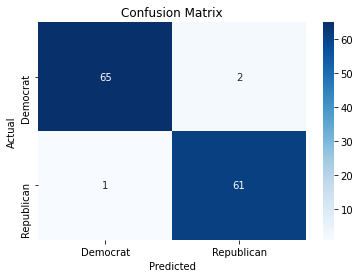

In [76]:
#calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#create a figure and axes
fig, ax = plt.subplots()

#create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

#set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Democrat', 'Republican'])
ax.yaxis.set_ticklabels(['Democrat', 'Republican'])

#show the plot
plt.show()

### Accuracy Scores
We checked the training and testing accuracy to see if there were any issues with overfitting, and at first it seemed quite high.

In [77]:
#find the train prediction
y_train_pred = model.predict(X_train_scaled)


#performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

#print results to check for fitting
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9966555183946488
Test Accuracy: 0.9767441860465116


### Cross-Validation
We ran a cross-validation with 5 folds to further assess the performance of the model. The results were decent. 

In [78]:
#create a StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5)

#5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=strat_k_fold)  

#display results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.98333333 0.95       0.95       0.96666667 0.96610169]
Mean Cross-Validation Score: 0.9632203389830508


### Metrics

We took a look at the Recall, Precision, and F1 scores for the training and test data, and were pleased with the results.

In [79]:
#Training metrics
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_recall = recall_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

#Test metrics
test_precision = precision_score(y_test, y_pred, pos_label=1)
test_recall = recall_score(y_test, y_pred, pos_label=1)
test_f1 = f1_score(y_test, y_pred, pos_label=1)

#display results for training metrics
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-Score:", train_f1)

#display results for test metrics
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

Training Precision: 0.993103448275862
Training Recall: 1.0
Training F1-Score: 0.9965397923875432
Test Precision: 0.9682539682539683
Test Recall: 0.9838709677419355
Test F1-Score: 0.976


### Learning Curve
We plotted a learning curve. The training score comes down as the cv score rises for a bit, but then the training score seems to go back up to a near 100%. There may be overfitting, so we will continue to inspect the model's performance. 

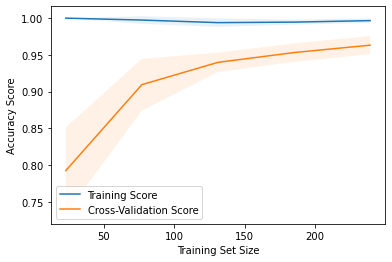

In [80]:
#create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=strat_k_fold)

#calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

#plot learning curves
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

### Validation 
We analyzed the cross-validation score with different values for C, and liked the results.

In [81]:
#cross-validation scores for values of C
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=c, solver='liblinear')
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"C={c}, Mean Cross-Validation Score: {scores.mean():.3f}")

C=0.01, Mean Cross-Validation Score: 0.896
C=0.1, Mean Cross-Validation Score: 0.946
C=1, Mean Cross-Validation Score: 0.963
C=10, Mean Cross-Validation Score: 0.963
C=100, Mean Cross-Validation Score: 0.957


We plotted a validation curve for different values of C and found "1" to be the optimal value.

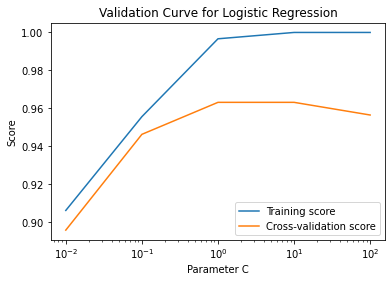

In [82]:
#set values for C
param_range = [0.01, 0.1, 1, 10, 100]

#set a validation curve
train_scores, test_scores = validation_curve(
    LogisticRegression(solver='liblinear'), X_train_scaled, y_train, param_name="C", param_range=param_range, cv=5
)

#calculate the means
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

#plot the values
plt.plot(param_range, train_scores_mean, label='Training score')
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.xlabel('Parameter C')
plt.ylabel('Score')
plt.legend()
plt.xscale('log')
plt.title('Validation Curve for Logistic Regression')
plt.show()

In [83]:
#display the optimal value for C
best_index = np.argmax(test_scores_mean)
best_C = param_range[best_index]
print(f"Optimal C: {best_C}")

Optimal C: 1


In [84]:
#calculate the test score for the optimal C value
optimal_model = LogisticRegression(C=best_C, solver='liblinear', random_state=42) 
optimal_model.fit(X_train_scaled, y_train) 
test_score = optimal_model.score(X_test_scaled, y_test) 
print(f"Test Score with Optimal C: {test_score:.3f}")

Test Score with Optimal C: 0.977


### Classification Report 
We checked the metrics of precision, recall, and F1, finding really high scores.

In [85]:
#print the metrics
y_pred = optimal_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65  2]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.97      0.98      0.98        62

    accuracy                           0.98       129
   macro avg       0.98      0.98      0.98       129
weighted avg       0.98      0.98      0.98       129



### ROC Curve
We plotted an ROC Curve and found the area under the curve to be 100%. 

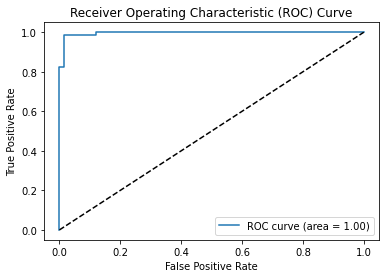

In [86]:
#calculate the roc metrics
y_pred_prob = optimal_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#plot the results
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Feature Importance
We took a look at the feature importance, finding significant data leakage. The two columns, republican total votes and democrat total votes, would obviously indicate a winner in a lopsided manner, so we proceeded to remove them, as well as total_votes, and run through the model and evaluation again.

In [87]:
#calculate the feature importance
feature_importance = pd.Series(optimal_model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

#display results
print(feature_importance)

r_total_votes                                                                         3.412028
total_votes                                                                           0.437136
Female_Construction                                                                   0.294748
$20000_to_24999                                                                       0.288134
Female_Public_administration                                                          0.250043
Female_Transportation_warehousing_utilities                                           0.240130
Total_Public_administration                                                           0.237021
Male_Finance_insurance_realestate_rental_leasing                                      0.232978
Male_Public_administration                                                            0.215951
Male_Agriculture_forestry_fishing_hunting_mining                                      0.192144
Total_Agriculture_forestry_fishing_hunting_mining 

In [88]:
#assign X and y from political_df columns
X = political_df.drop(['winner', 'winner_encoded', 'Year', 'district', 'd_percent', 'r_percent', 
                       'r_total_votes', 'd_total_votes', 'swing_district', 'total_votes'], axis=1)
y = political_df['winner_encoded']

In [89]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#scale the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [90]:
#instantiate LogisticRegression
model = LogisticRegression(max_iter=500)

#fit the model onto the data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

### Revised Model Evaluation Results
We found our scores to have dipped a bit, but are still in a solid place and the feature importance shows us that there is no longer significant leakage happening.

In [91]:
#assign predictions
y_pred = model.predict(X_test_scaled)

#assign accuracy score
accuracy = accuracy_score(y_test, y_pred)

#print results
print("Accuracy:", accuracy)

Accuracy: 0.8682170542635659


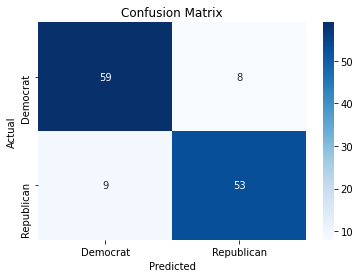

In [92]:
#calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#create a figure and axes
fig, ax = plt.subplots()

#create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

#set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Democrat', 'Republican'])
ax.yaxis.set_ticklabels(['Democrat', 'Republican'])

#show the plot
plt.show()

In [93]:
#find the train prediction
y_train_pred = model.predict(X_train_scaled)


#performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

#print results to check for fitting
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8294314381270903
Test Accuracy: 0.8682170542635659


In [94]:
#create a StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=5)

#5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=strat_k_fold)  

#display results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.76666667 0.83333333 0.8        0.8        0.72881356]
Mean Cross-Validation Score: 0.7857627118644068


Our scores have dipped a bit, but we no longer have that data leakage.

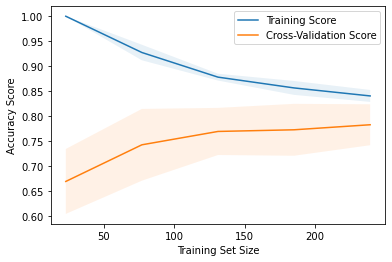

In [95]:
#create a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=strat_k_fold)

#calculate mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

#plot learning curves
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

Our learning curve looks considerably better with convergence.

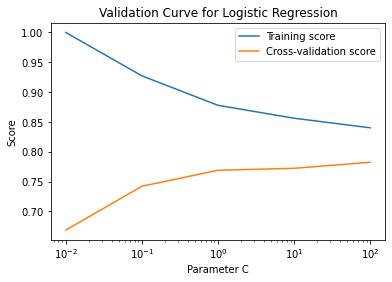

In [96]:
#calculate validation curve
train_scores, test_scores = validation_curve(
    LogisticRegression(solver='liblinear'), X_train_scaled, y_train, param_name="C", param_range=param_range, cv=5
)

#plot results
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.xlabel('Parameter C')
plt.ylabel('Score')
plt.legend()
plt.xscale('log')
plt.title('Validation Curve for Logistic Regression')
plt.show()

In [97]:
#display optimal C
best_index = np.argmax(test_mean)
best_C = param_range[best_index]
print(f"Optimal C: {best_C}")

Optimal C: 100


Our optimal C is now 100.

In [98]:
#calculate test score for optimal C
optimal_model = LogisticRegression(C=best_C, solver='liblinear', random_state=42) 
optimal_model.fit(X_train_scaled, y_train) 
test_score = optimal_model.score(X_test_scaled, y_test) 
print(f"Test Score with Optimal C: {test_score:.3f}")

Test Score with Optimal C: 0.860


In [99]:
#classification report
y_pred = optimal_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57 10]
 [ 8 54]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        67
           1       0.84      0.87      0.86        62

    accuracy                           0.86       129
   macro avg       0.86      0.86      0.86       129
weighted avg       0.86      0.86      0.86       129



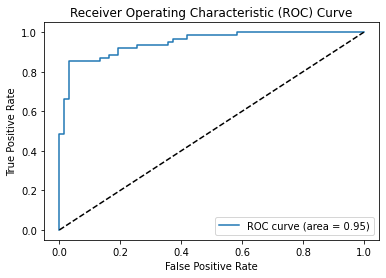

In [100]:
#calculate roc
y_pred_prob = optimal_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#plot results
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The area under the ROC is now 95%.

In [101]:
#calculate and display feature importance
feature_importance = pd.Series(optimal_model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

$20000_to_24999                                                                       3.170234
Bachelors_degree_or_higher                                                            2.966184
Female_Construction                                                                   1.542350
Male_Information                                                                      1.494922
Male_Public_administration                                                            1.259011
Female_Retail_trade                                                                   1.242320
Male_Arts_entertainment_recreation_accommodation_foodservices                         0.901685
$25000_to_34999                                                                       0.810723
$50000_to_74999                                                                       0.792474
Male_Agriculture_forestry_fishing_hunting_mining                                      0.752519
Male                                              

Our features had some surprising results. For example, the higher the number of college graduates, the model was actually more likely to predict Republican!

In [102]:
#training metrics
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
train_recall = recall_score(y_train, y_train_pred, pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

#test metrics
test_precision = precision_score(y_test, y_pred, pos_label=1)
test_recall = recall_score(y_test, y_pred, pos_label=1)
test_f1 = f1_score(y_test, y_pred, pos_label=1)

#display results for training metrics
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-Score:", train_f1)

#display results for test metrics
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

Training Precision: 0.803921568627451
Training Recall: 0.8541666666666666
Training F1-Score: 0.8282828282828283
Test Precision: 0.84375
Test Recall: 0.8709677419354839
Test F1-Score: 0.8571428571428571


### Model Comparison
We plotted several baseline models to compare the learning curve, finding logistic regression to be the best fit.

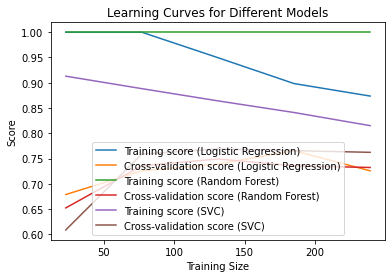

In [103]:
#list several models to compare 
models = [
       ('Logistic Regression', LogisticRegression(C=best_C, solver='liblinear')),
       ('Random Forest', RandomForestClassifier()),
       ('SVC', SVC(probability=True))
   ]

#calculate learning curve, mean scores for each model
for name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'Training score ({name})')
    plt.plot(train_sizes, test_scores_mean, label=f'Cross-validation score ({name})')

#plot results
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves for Different Models')
plt.show()

#### Normalized Data Model Comparison
Next we tried fitting a Random Forest Classifier onto the normalized data and checked the results.

In [104]:
#set the 'winner' column in normal_df
for index, row in normal_df.iterrows():
    if row['d_percent'] > row['r_percent']:
        normal_df.at[index, 'winner'] = 'democrat'
    elif row['r_percent'] > row['d_percent']:
        normal_df.at[index, 'winner'] = 'republican'
    else:
        normal_df.at[index, 'winner'] = 'neither'

In [105]:
#encode the target variable
normal_df['winner_encoded'] = label_encoder.fit_transform(normal_df['winner'])

In [106]:
#assign X and y from political_df columns
X_normal = normal_df.drop(['winner', 'winner_encoded', 'Year', 'district', 'd_percent', 'r_percent', 'total_votes'], axis=1)
y_normal = normal_df['winner_encoded']

In [107]:
#train_test_split
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.3, random_state=42, stratify=y)

#instantiate RandomForestClassifier
svm_model = SVC(random_state=42, probability=True)

#fit the model onto the data
svm_model.fit(X_train_normal, y_train_normal)

SVC(probability=True, random_state=42)

In [108]:
#assign predictions
y_pred_normal = svm_model.predict(X_test_normal)

#assign accuracy score
accuracy_normal = accuracy_score(y_test_normal, y_pred_normal)

#print results
print("Accuracy:", accuracy_normal)

Accuracy: 0.6821705426356589


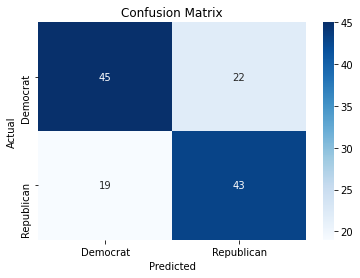

In [109]:
#calculate the confusion matrix
cm_normal = confusion_matrix(y_test_normal, y_pred_normal)

#create a figure and axes
fig, ax = plt.subplots()

#create a heatmap
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', ax=ax)

#set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Democrat', 'Republican'])
ax.yaxis.set_ticklabels(['Democrat', 'Republican'])

#show the plot
plt.show()

In [110]:
#find the train prediction
y_train_pred_normal = svm_model.predict(X_train_normal)


#performance metrics
train_accuracy_normal = accuracy_score(y_train_normal, y_train_pred_normal)
test_accuracy_normal = accuracy_score(y_test_normal, y_pred_normal)

#print results to check for fitting
print("Training Accuracy:", train_accuracy_normal)
print("Test Accuracy:", test_accuracy_normal)

Training Accuracy: 0.6688963210702341
Test Accuracy: 0.6821705426356589


In [111]:
#5-fold cross-validation
cv_scores_normal = cross_val_score(svm_model, X_train_normal, y_train_normal, cv=strat_k_fold)  

#display results
print("Cross-Validation Scores:", cv_scores_normal)
print("Mean Cross-Validation Score:", cv_scores_normal.mean())

Cross-Validation Scores: [0.68333333 0.78333333 0.75       0.65       0.54237288]
Mean Cross-Validation Score: 0.6818079096045198


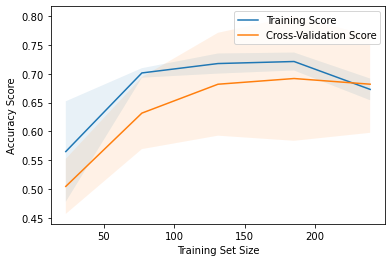

In [112]:
#create a learning curve
train_sizes_normal, train_scores_normal, test_scores_normal = learning_curve(svm_model, X_train_normal, y_train_normal, cv=strat_k_fold)

#calculate mean and standard deviation
train_mean_normal = train_scores_normal.mean(axis=1)
train_std_normal = train_scores_normal.std(axis=1)
test_mean_normal = test_scores_normal.mean(axis=1)
test_std_normal = test_scores_normal.std(axis=1)

#plot learning curves
plt.plot(train_sizes_normal, train_mean_normal, label="Training Score")
plt.plot(train_sizes_normal, test_mean_normal, label="Cross-Validation Score")
plt.fill_between(train_sizes_normal, train_mean_normal - train_std_normal, train_mean_normal + train_std_normal, alpha=0.1)
plt.fill_between(train_sizes_normal, test_mean_normal - test_std_normal, test_mean_normal + test_std_normal, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

In [113]:
#classification report
y_pred_normal = svm_model.predict(X_test_normal)
print(classification_report(y_test_normal, y_pred_normal))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69        67
           1       0.66      0.69      0.68        62

    accuracy                           0.68       129
   macro avg       0.68      0.68      0.68       129
weighted avg       0.68      0.68      0.68       129



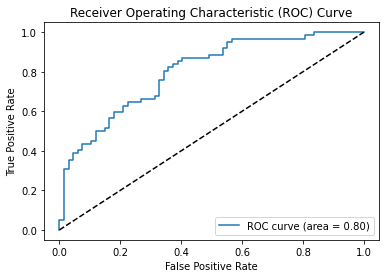

In [114]:
#calculate roc
y_pred_prob_normal = svm_model.predict_proba(X_test_normal)[:, 1]
fpr_normal, tpr_normal, thresholds_normal = roc_curve(y_test_normal, y_pred_prob_normal)
roc_auc_normal = roc_auc_score(y_test_normal, y_pred_prob_normal)

#plot results
plt.plot(fpr_normal, tpr_normal, label=f"ROC curve (area = {roc_auc_normal:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

These results were clearly worse, so it seemed that applying a Standard Scaler was a better approach.

#### Hyperparameter Tuning
We ran hyperparameter tuning on our two models, then compared them and made a final evaluation. Given the poor performance of the box-cox transformed data, we used the scaled data for both models in the grid search.

In [115]:
#set the support vector model
svc_model = SVC(random_state=42, probability=True)


#define the parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4] 
}

#initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy')

#fit the model
grid_search_svc.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_svc = grid_search_svc.best_params_
print(best_params_svc)

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [116]:
#set the logistic regression model
logreg_model = LogisticRegression(random_state=42)

#define the parameter grid 
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300, 500, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

#initialize GridSearchCV
logreg_grid_search = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid, cv=5, n_jobs=-1, scoring='accuracy')

#fit the model
logreg_grid_search.fit(X_train_scaled, y_train)

#get the best parameters
logreg_best_params = logreg_grid_search.best_params_
print(logreg_best_params)

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


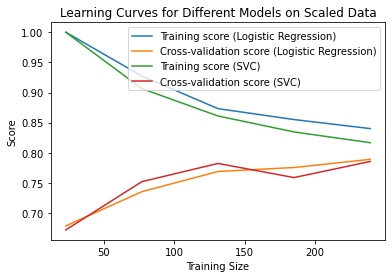

In [117]:
#list several models to compare 
models = [
       ('Logistic Regression', LogisticRegression(C=1, penalty='l2', max_iter=100, solver='liblinear')),
       ('SVC', SVC(C=0.1, degree=2, gamma='scale', kernel='linear')),
   ]

#calculate learning curve, mean scores for each model
for name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'Training score ({name})')
    plt.plot(train_sizes, test_scores_mean, label=f'Cross-validation score ({name})')

#plot results
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves for Different Models on Scaled Data')
plt.show()

Next we looked at the classification report.

In [118]:
#list several models to compare 
models = [
       ('Logistic Regression', LogisticRegression(C=0.1, solver='liblinear')),
       ('SVC', SVC(C=0.1, degree=2, gamma='scale', kernel='linear')),
   ]

#generate the classification report
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'Classification report for {name}: ')
    print(classification_report(y_test, y_pred))

Classification report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        67
           1       0.87      0.89      0.88        62

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129

Classification report for SVC: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        67
           1       0.87      0.87      0.87        62

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129



### Final Selection
While both peform quite similar, given the slightly higher precision and f1 score, and the nature of the data, the decision was made to select our Logistic Regression model with the scaled data.

In [119]:
#assign X and y from political_df columns
X = political_df.drop(['winner', 'winner_encoded', 'Year', 'district', 'd_percent', 'r_percent', 
                       'r_total_votes', 'd_total_votes', 'swing_district', 'total_votes'], axis=1)
y = political_df['winner_encoded']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#scale the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#instantiate LogisticRegression with tuning parameters
best_model = LogisticRegression(C=0.1, solver='liblinear', random_state=42)

#fit the model onto the data
best_model.fit(X_train_scaled, y_train)

#assign predictions
y_pred = best_model.predict(X_test_scaled)

#assign accuracy score
accuracy = accuracy_score(y_test, y_pred)

#print results
print("Accuracy:", accuracy)

Accuracy: 0.8837209302325582


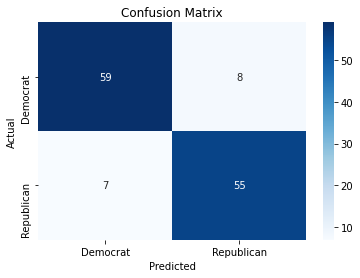

In [120]:
#calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#create a figure and axes
fig, ax = plt.subplots()

#create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

#set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Democrat', 'Republican'])
ax.yaxis.set_ticklabels(['Democrat', 'Republican'])

#show the plot
plt.show()

In [121]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        67
           1       0.87      0.89      0.88        62

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129



Our scores were all in the high 80s, approaching 90%, and we now have a much better fit.

### Feature Analysis
In this section, we looked at the most important features of our model and analyzed what they mean for the winning party's chances. We started by plotting three graphs of our top 10 features: a horizontal bar, lollipop chart, and a heatmap.

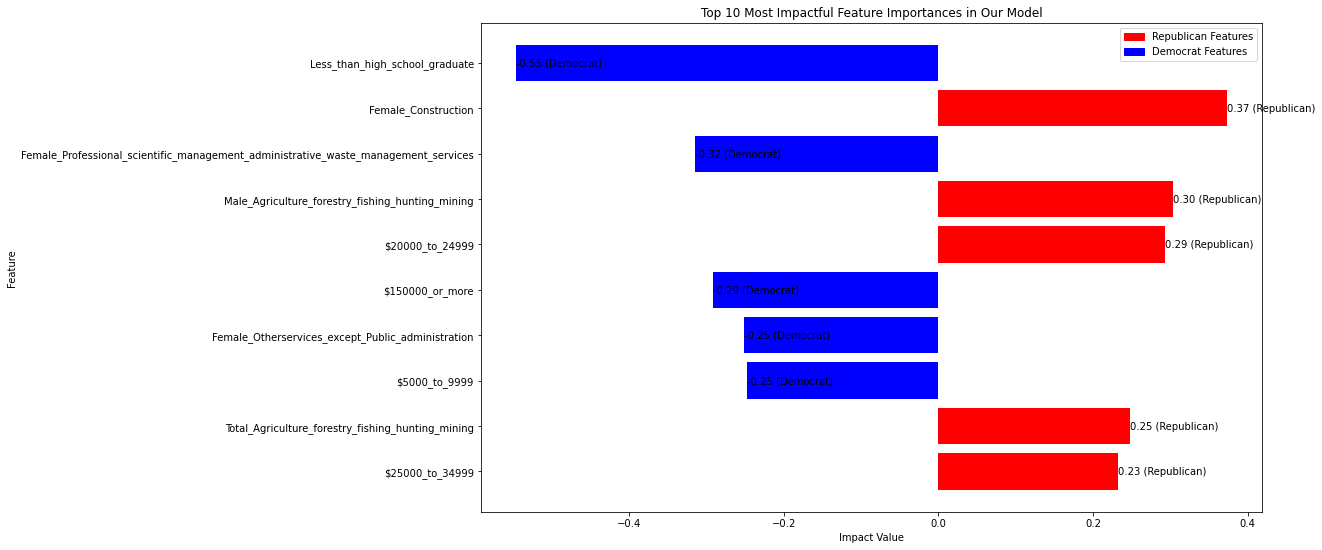

In [122]:
#extract coefficients
coefficients = best_model.coef_[0]

#convert numpy to dataframe
if isinstance(X_train_scaled, np.ndarray):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

#extract feature importance
feature_importance = pd.Series(best_model.coef_[0], index=X_train_scaled.columns)

#select top N features
N = 10  
top_feature_importance = feature_importance.reindex(feature_importance.abs().sort_values(ascending=False).index).head(N)

# Reverse the values for plotting and color assignment
top_feature_importance_reversed = top_feature_importance.values[::-1]
top_feature_names_reversed = top_feature_importance.index[::-1]

#plot 
plt.figure(figsize=(14, 9))

#use different colors for positive and negative coefficients
colors = ['red' if coef > 0 else 'blue' for coef in top_feature_importance_reversed]

#plot and labels
bars = plt.barh(range(N), top_feature_importance_reversed, align='center', color=colors)
plt.yticks(range(N), top_feature_importance.index[::-1])
plt.xlabel('Impact Value')
plt.ylabel('Feature')
plt.title(f'Top {N} Most Impactful Feature Importances in Our Model')

#add coefficient values and direction annotations next to bars
for bar, coef in zip(bars, top_feature_importance_reversed):
    direction = 'Republican' if coef > 0 else 'Democrat'
    plt.gca().text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                   f'{bar.get_width():.2f} ({direction})', ha='left', va='center')

#create custom legend handles
legend_handles = [
    Patch(color='red', label='Republican Features'),
    Patch(color='blue', label='Democrat Features')
]

#add a custom legend
plt.legend(handles=legend_handles, loc='best')


#display results
plt.show()

### Lollipop Chart

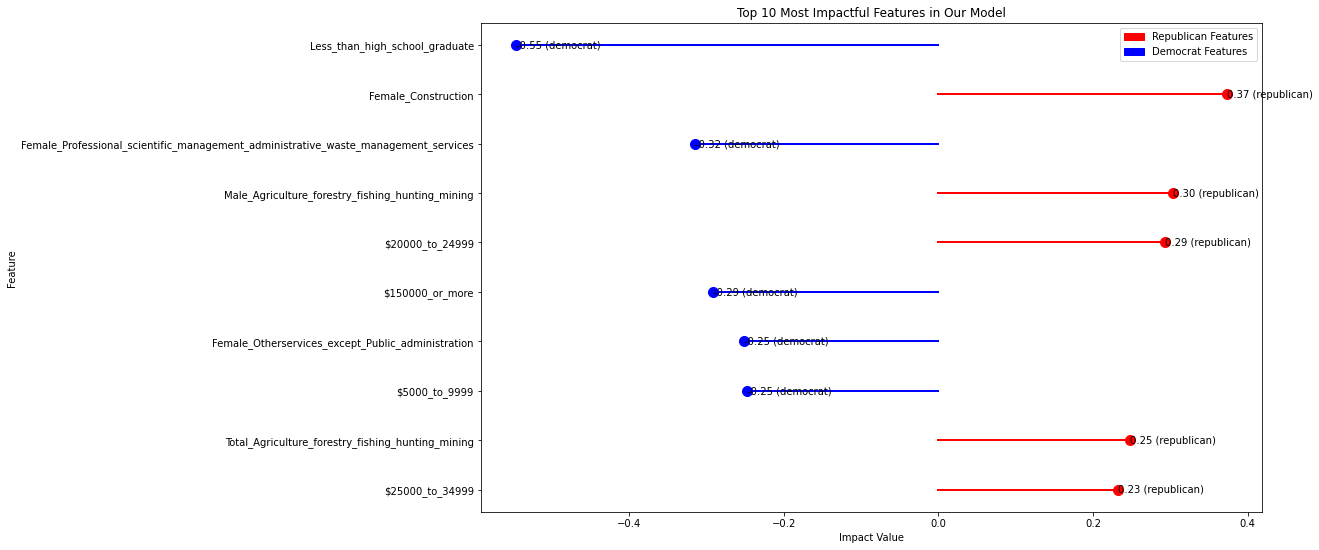

In [123]:
#plot the top N features as a lollipop chart
plt.figure(figsize=(14, 9))

#create the lollipop chart
for i, (feature, coef, color) in enumerate(zip(top_feature_names_reversed, top_feature_importance_reversed, colors)):
    plt.plot([0, coef], [i, i], color=color, linewidth=2)
    plt.scatter(coef, i, color=color, s=100, zorder=3)

#set labels
plt.yticks(range(N), top_feature_names_reversed)
plt.xlabel('Impact Value')
plt.ylabel('Feature')
plt.title(f'Top {N} Most Impactful Features in Our Model')

#add coefficient values and direction annotations next to points
for i, coef in enumerate(top_feature_importance_reversed):
    direction = 'republican' if coef > 0 else 'democrat'
    plt.gca().text(coef, i, f'{coef:.2f} ({direction})', ha='left', va='center')

#add a custom legend
plt.legend(handles=legend_handles, loc='best')

#display results
plt.show()

### Heatmap

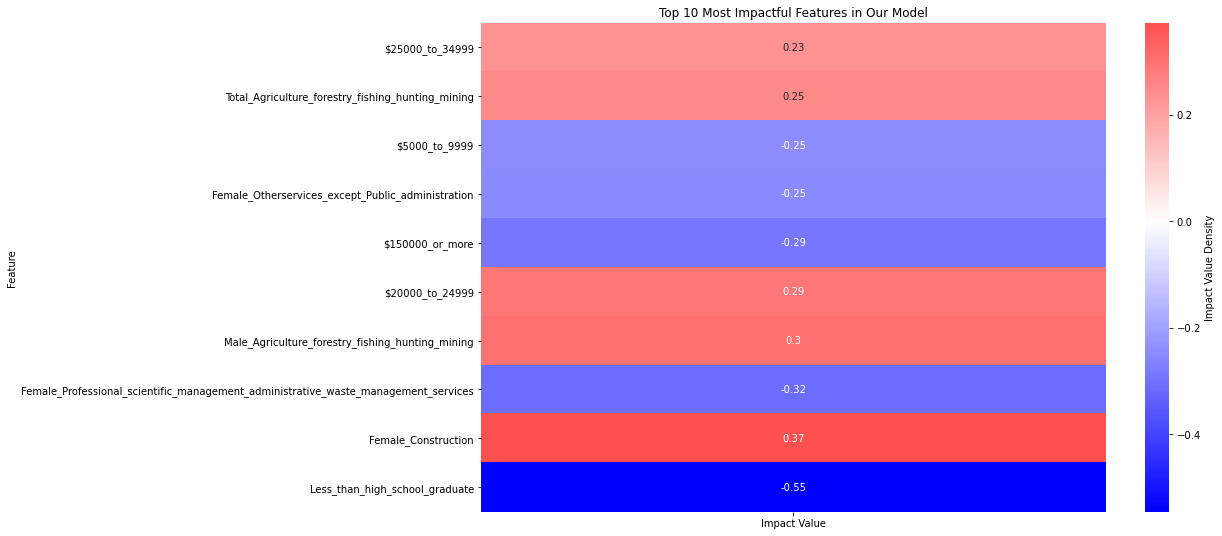

In [124]:
#plot the top N features as a heatmap
plt.figure(figsize=(14, 9))

#create a DataFrame for the heatmap
top_features_df = pd.DataFrame(top_feature_importance_reversed, index=top_feature_names_reversed, columns=['Impact Value'])

#create a custom colormap: green for positive, red for negative
custom_palette = LinearSegmentedColormap.from_list("custom", ["blue", "white", "red"])

#use seaborn to create the heatmap
heatmap = sns.heatmap(top_features_df, annot=True, cmap=custom_palette, center=0, cbar_kws={'label': 'Impact Value Density'})

#set labels
plt.title(f'Top {N} Most Impactful Features in Our Model')
plt.ylabel('Feature')

#display results
plt.show()

We found some surprising results, given what we saw in our graphs earlier. The count of people who did not complete high school actually indicated a stronger push towards a Democrat prediction, and some of the lower income brackets actually indicated a stronger chance of a Republican prediction, though the lowest income brackets were features for a Democrat prediction. Finally, we plotted a graph to see how these features looked in the close districts in our swing states.

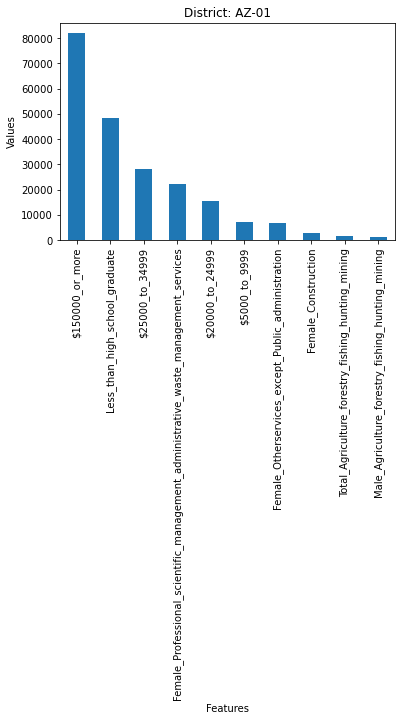

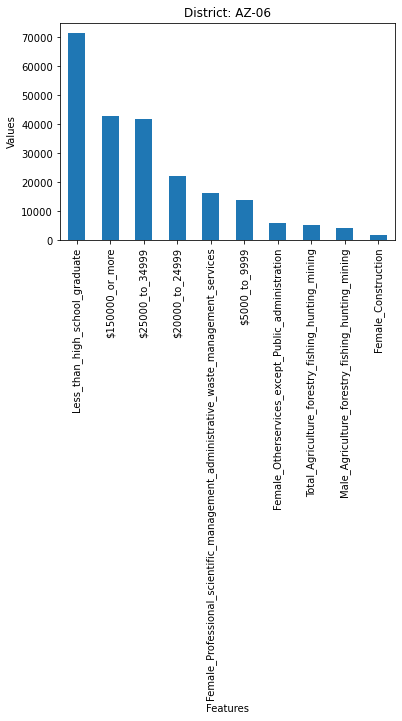

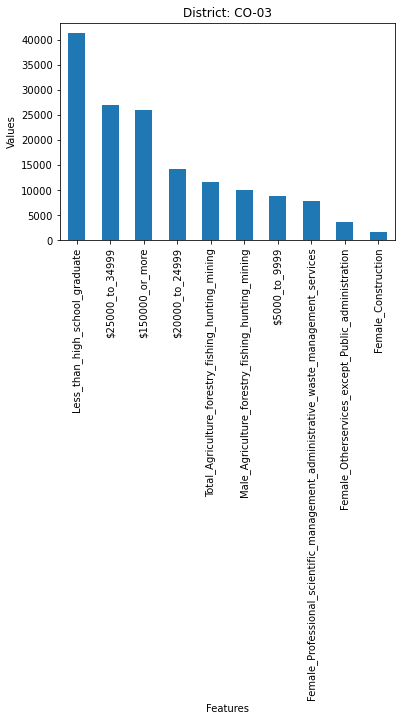

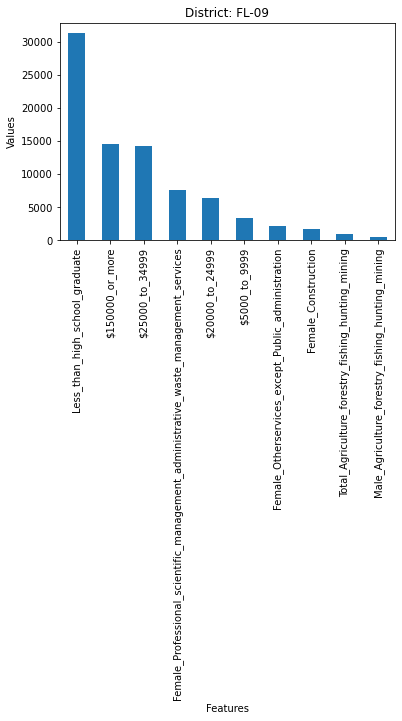

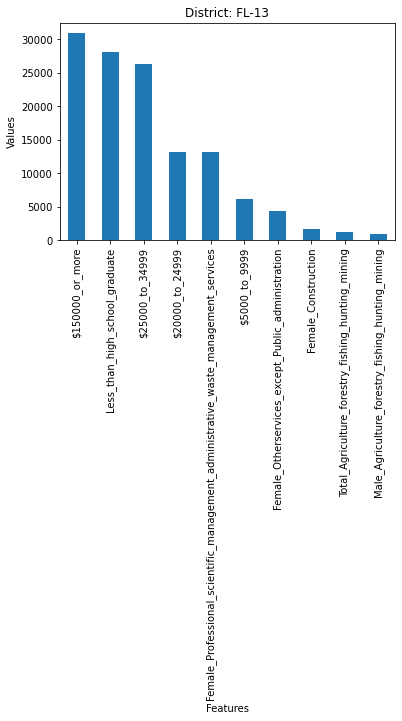

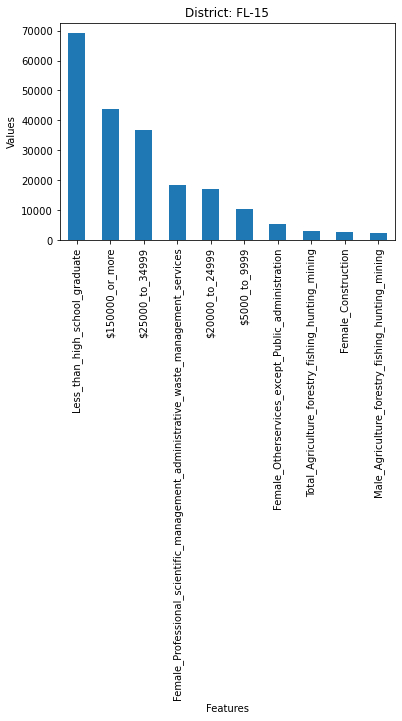

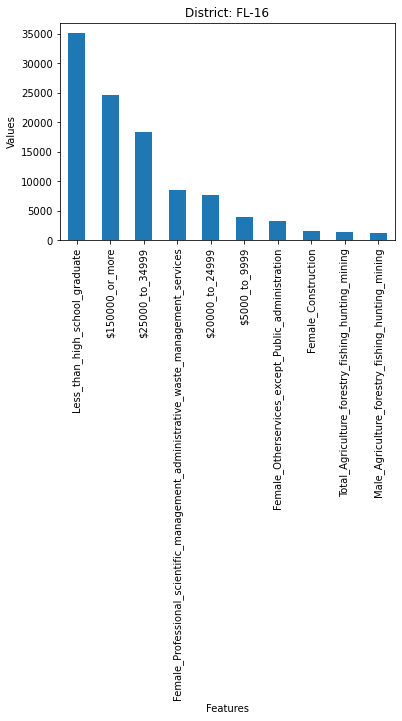

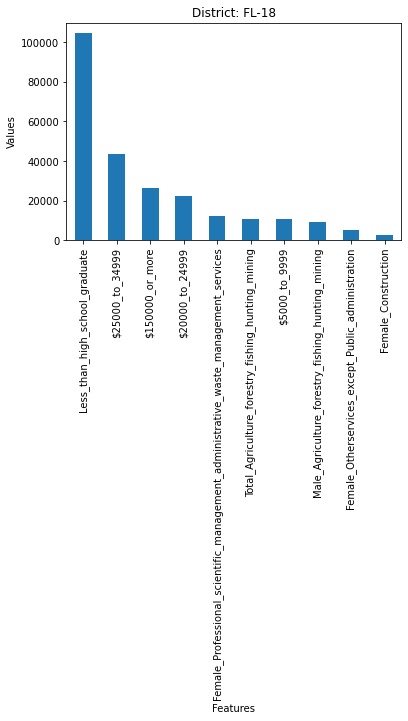

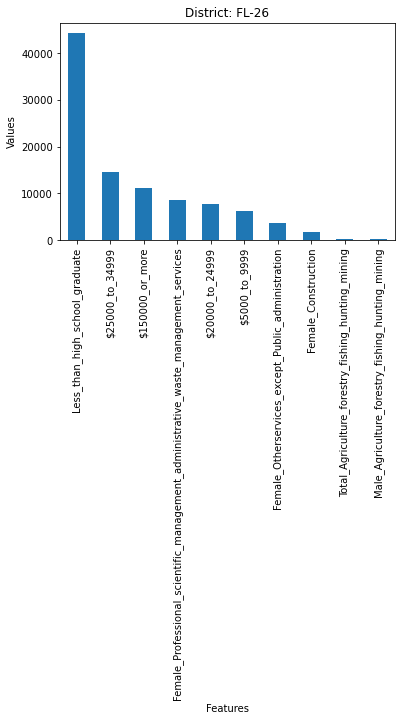

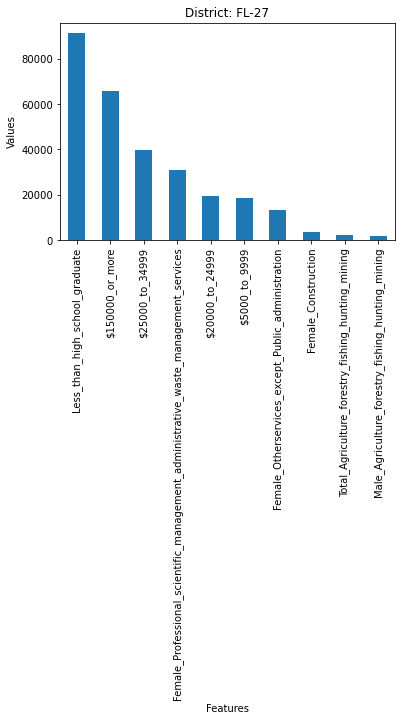

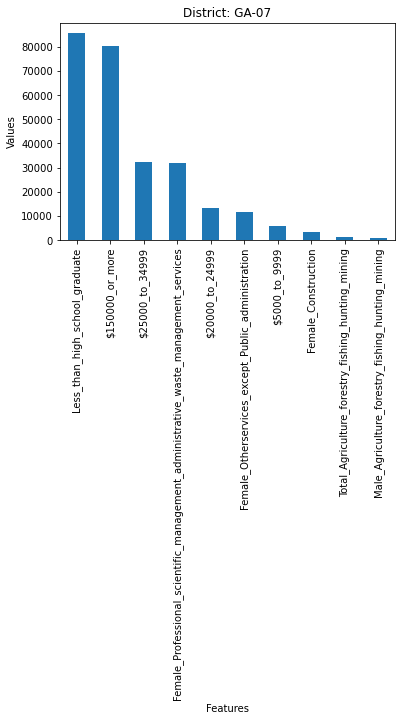

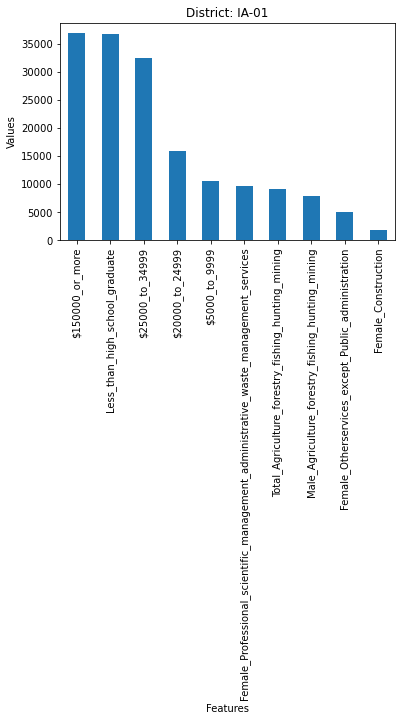

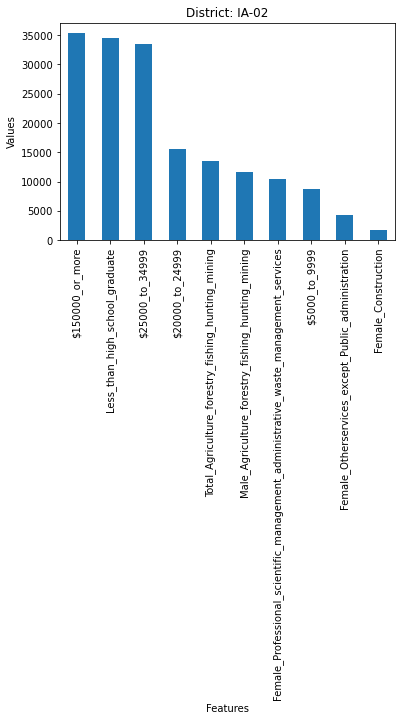

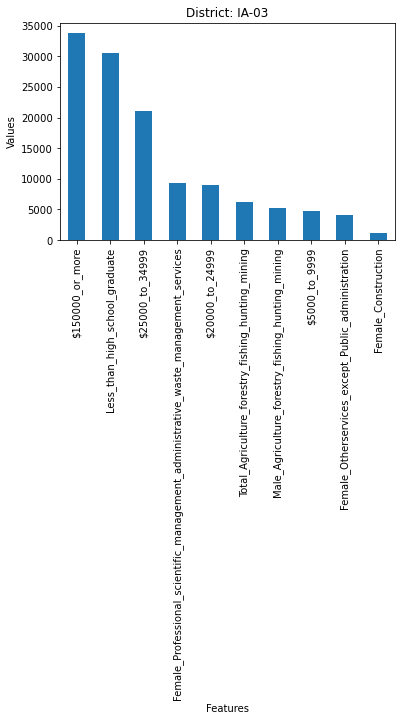

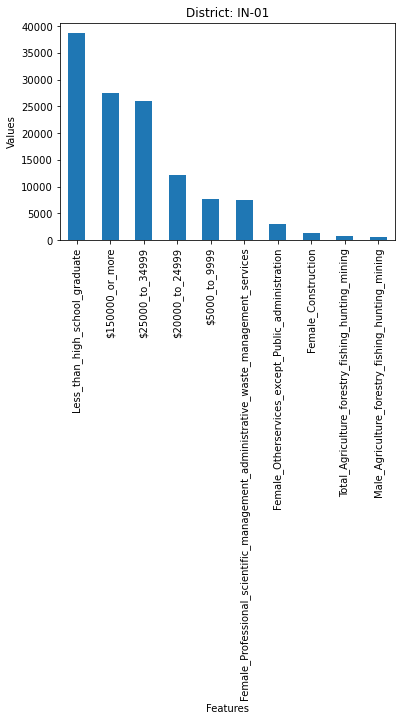

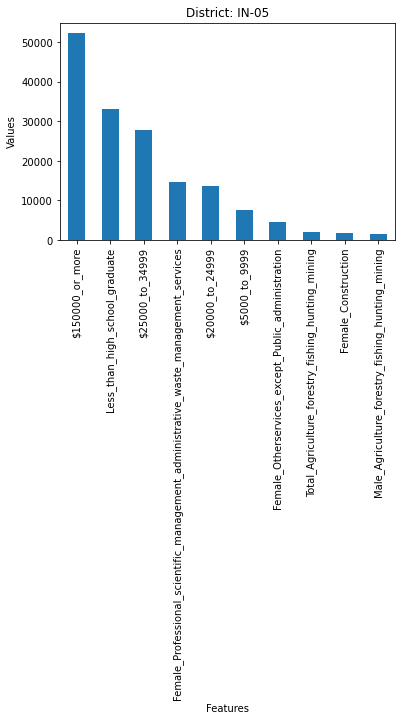

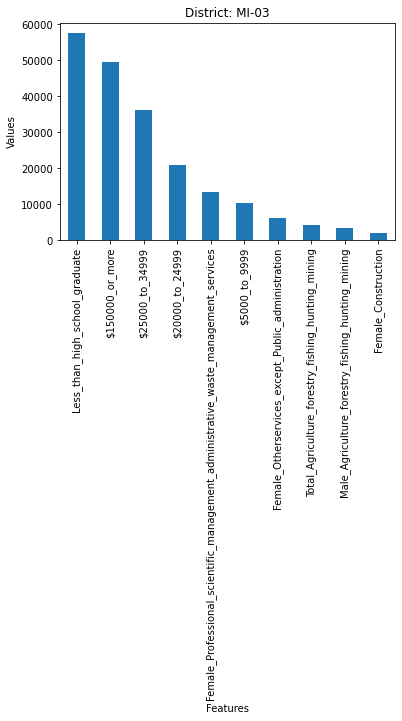

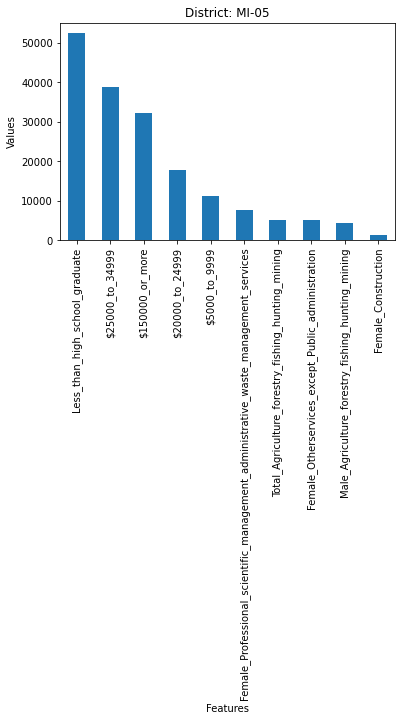

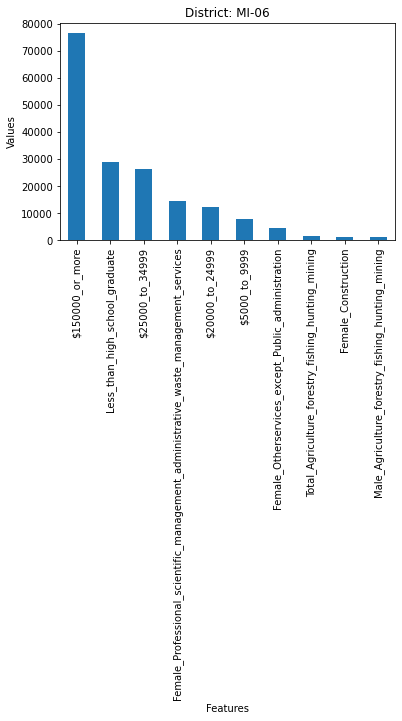

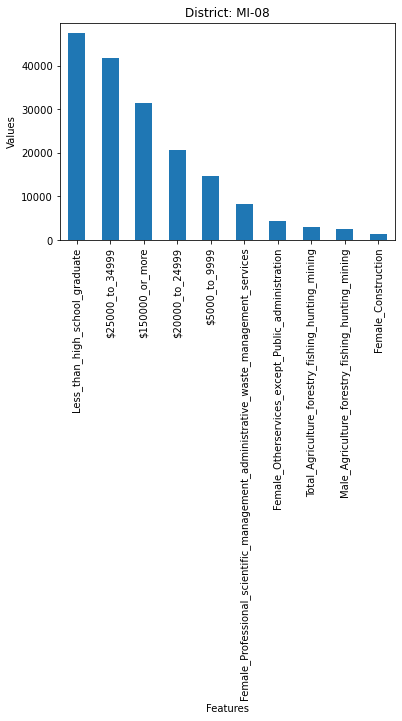

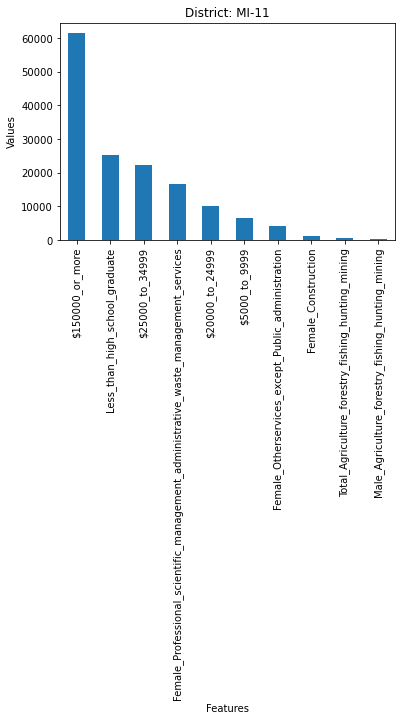

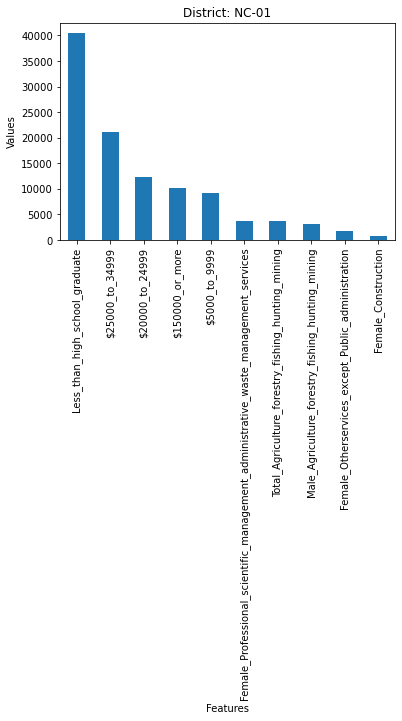

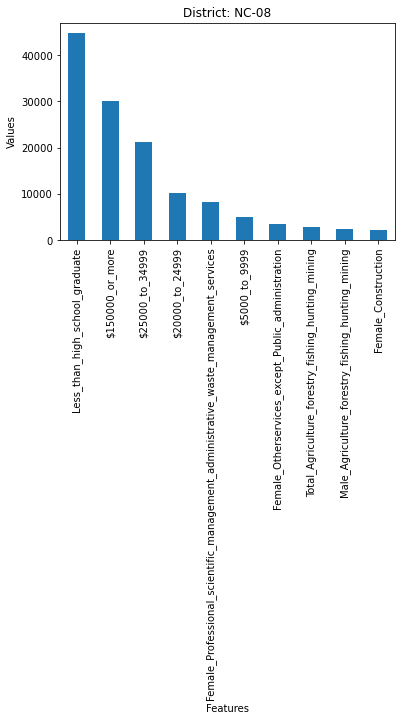

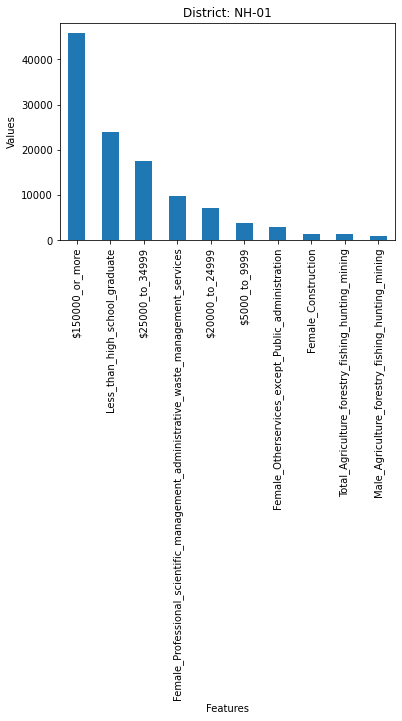

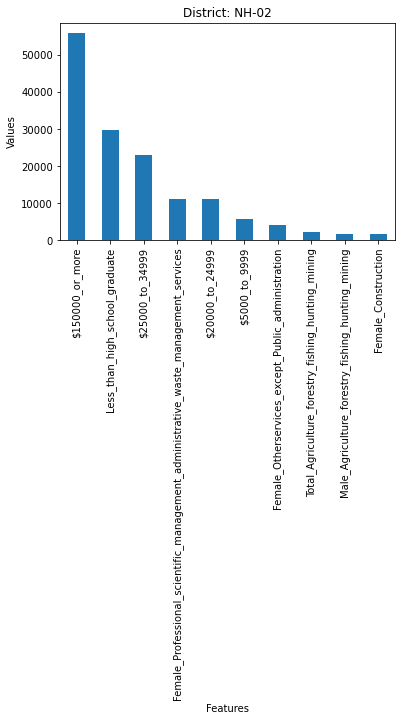

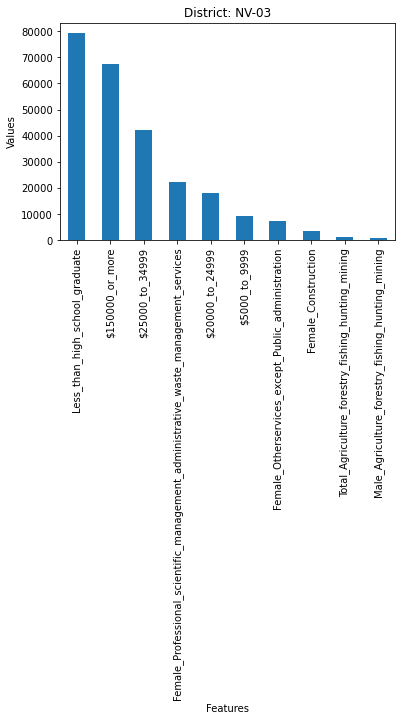

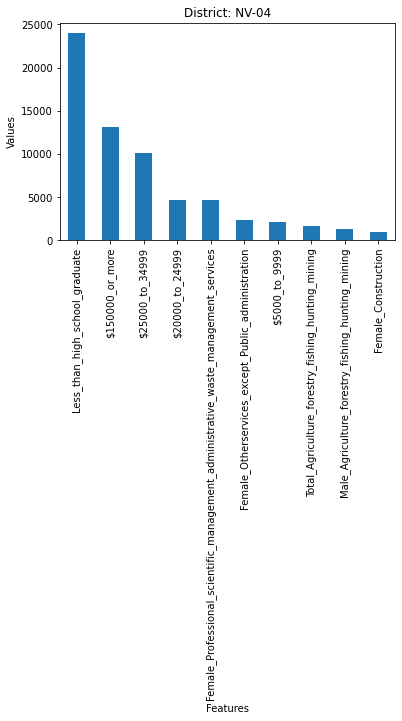

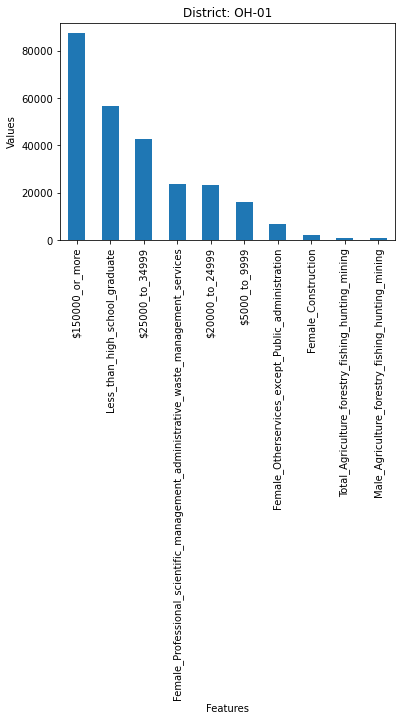

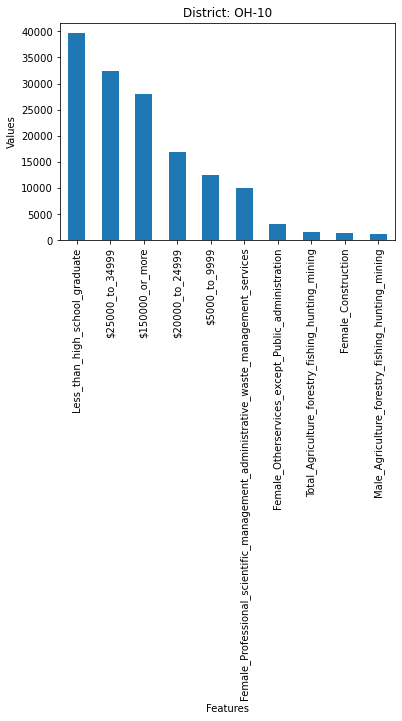

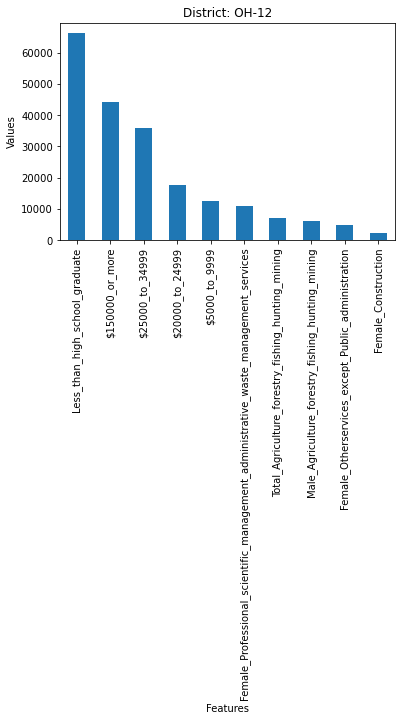

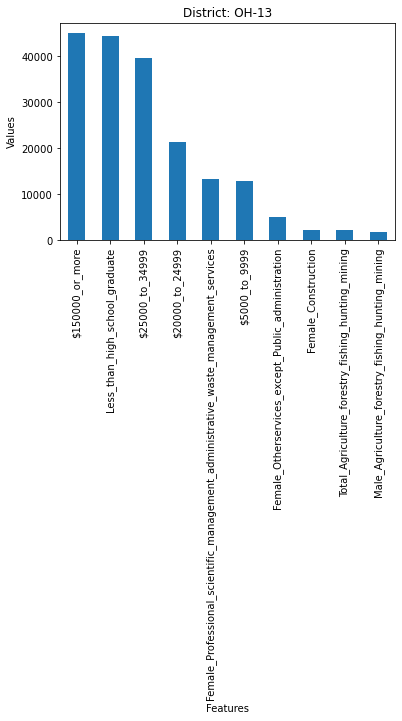

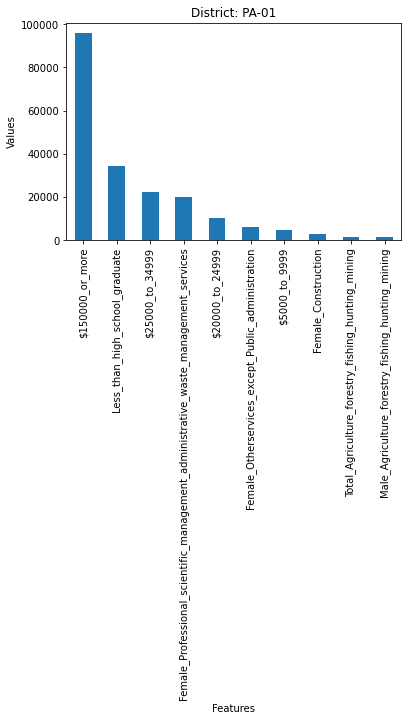

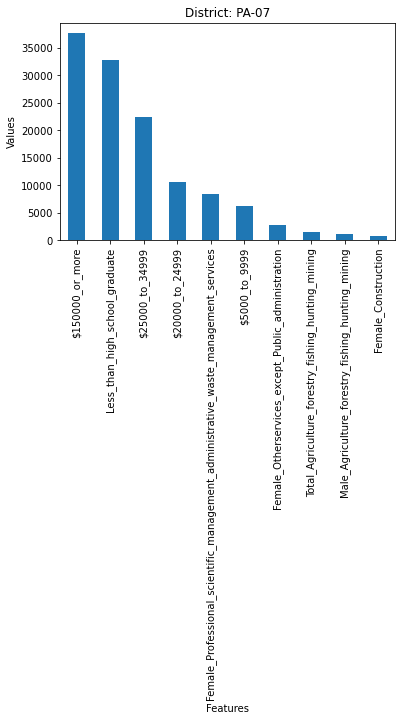

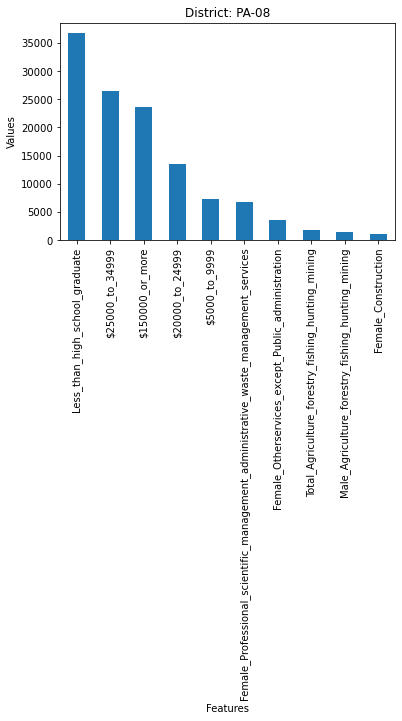

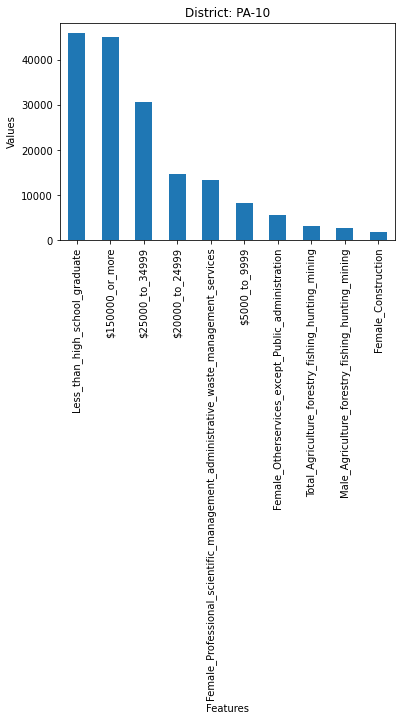

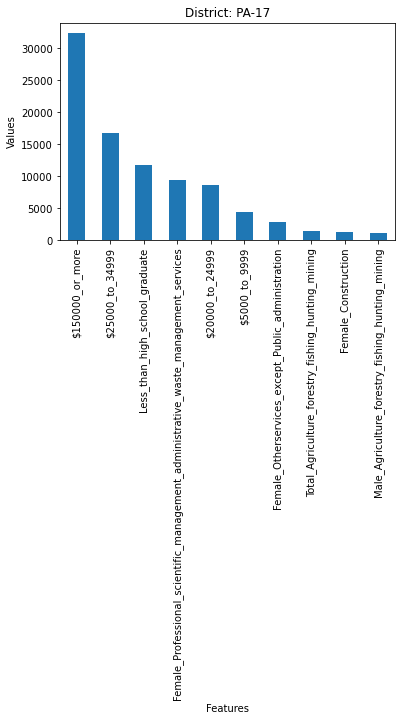

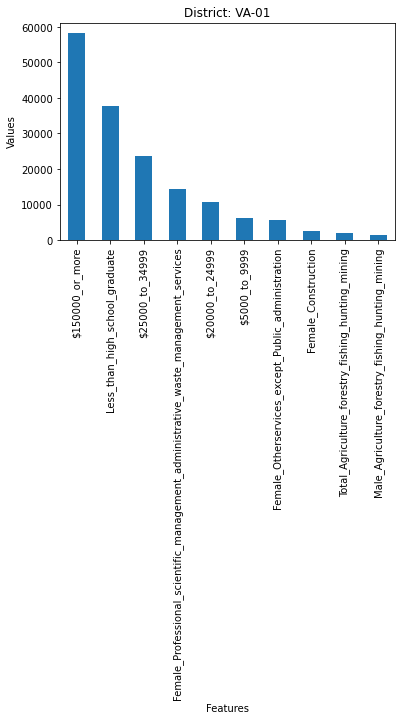

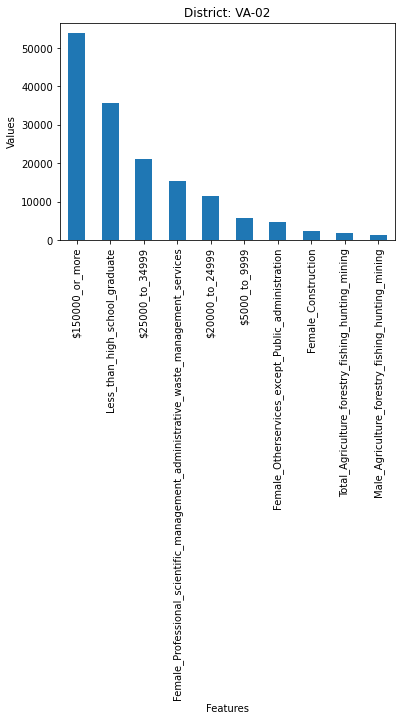

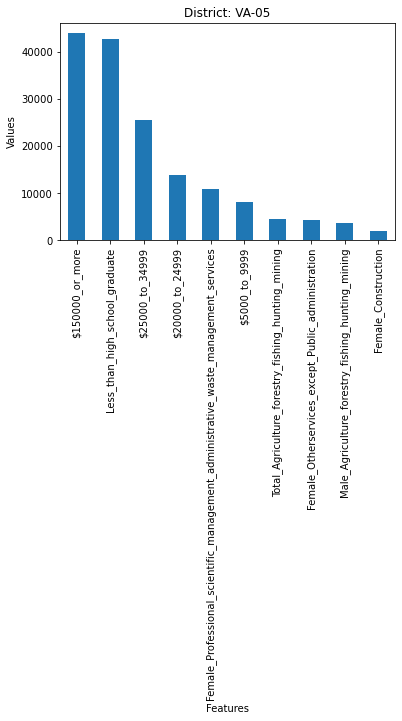

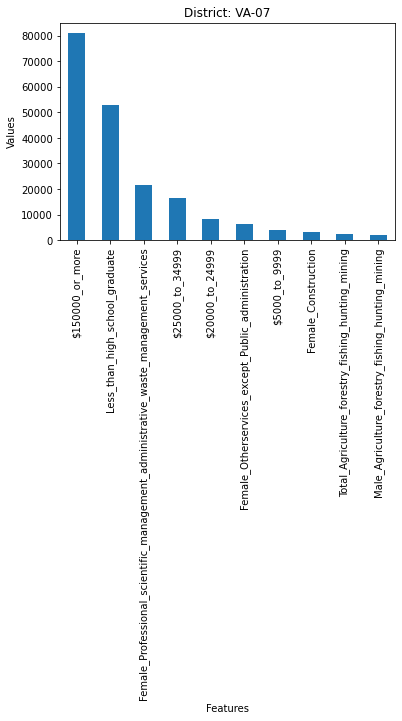

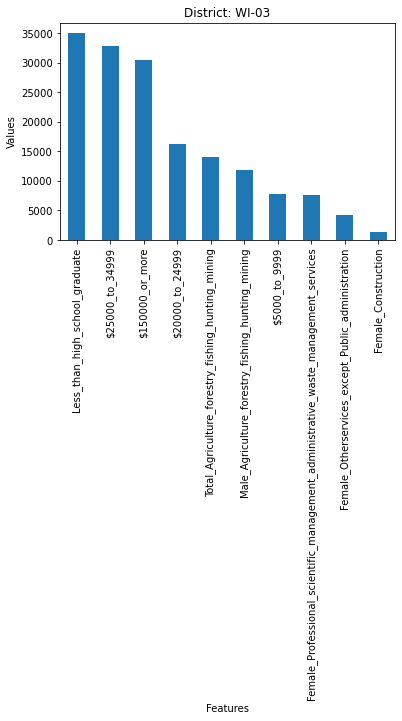

In [125]:
#extract swing states of swing districts
graph_districts_df = political_df[(political_df['district'].apply(lambda x: x[:2] in swing_states)) & (political_df['swing_district'] == 'yes')]

#plot each district
for index, row in graph_districts_df.iterrows():
    plt.figure()
    #sort values
    sorted_row = row[top_feature_names_reversed].sort_values(ascending=False)
    sorted_row.plot(kind='bar')
    plt.title(f"District: {row['district']}")
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

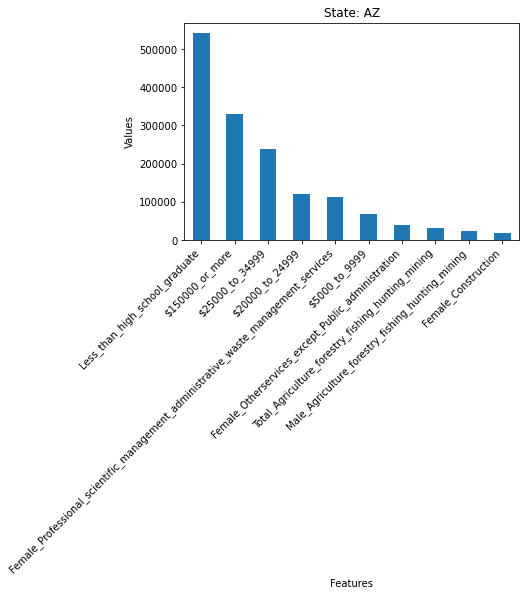

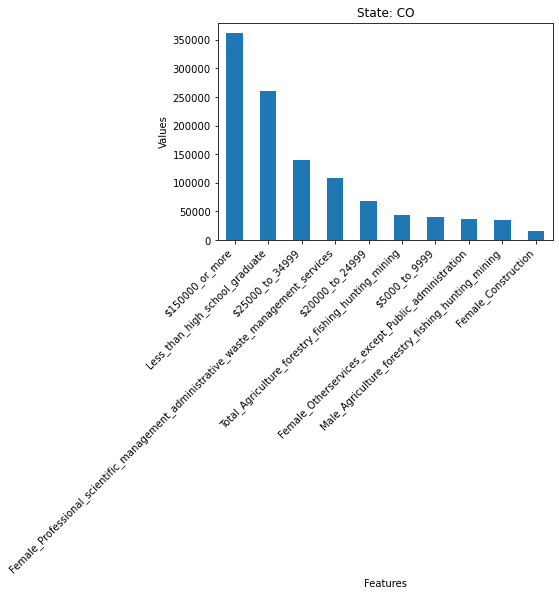

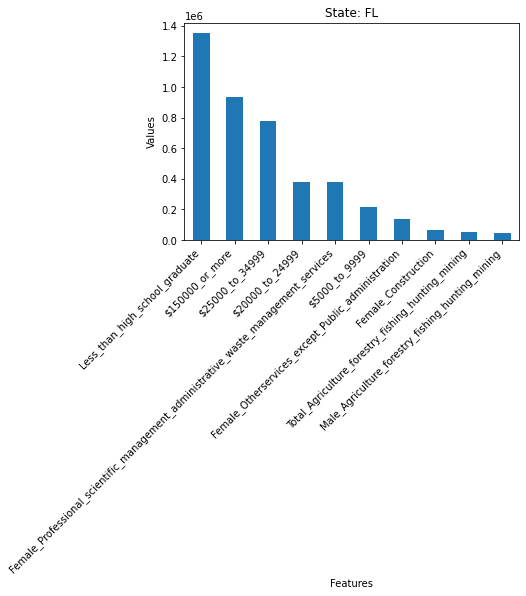

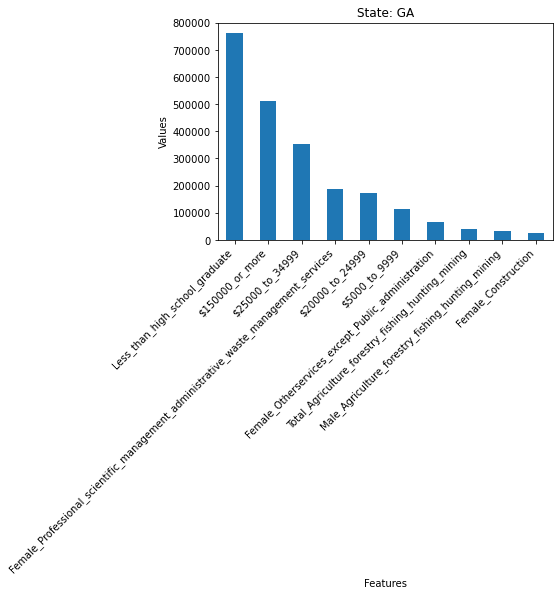

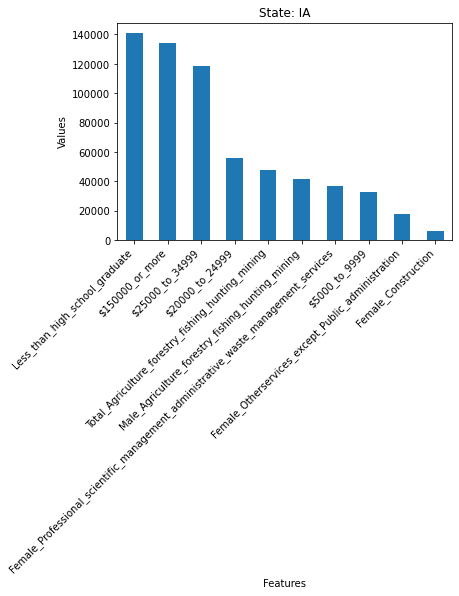

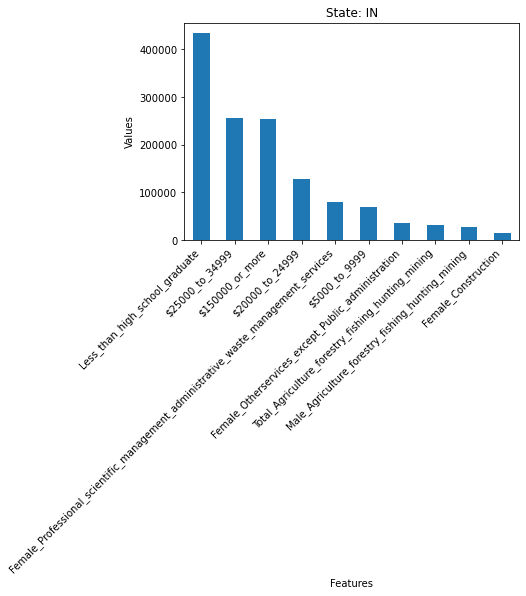

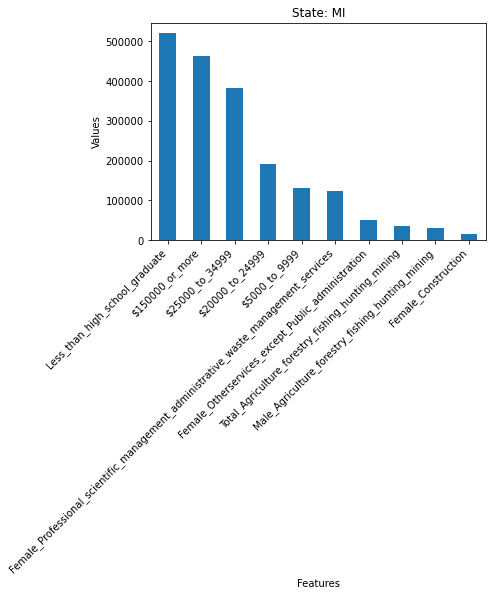

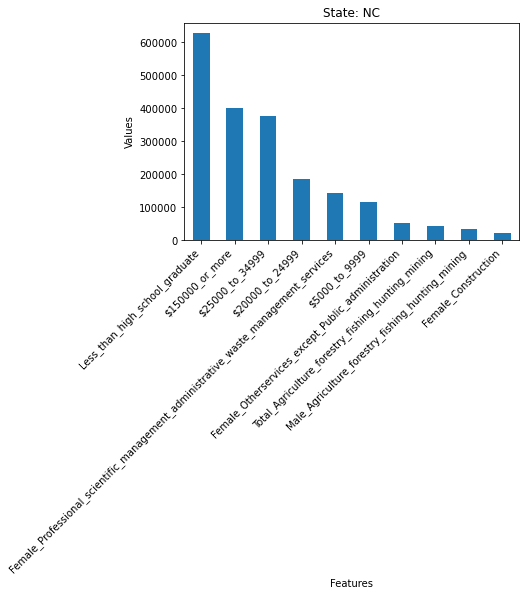

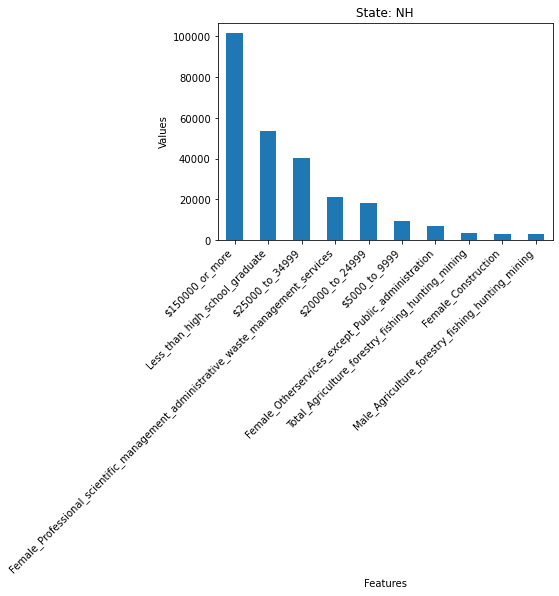

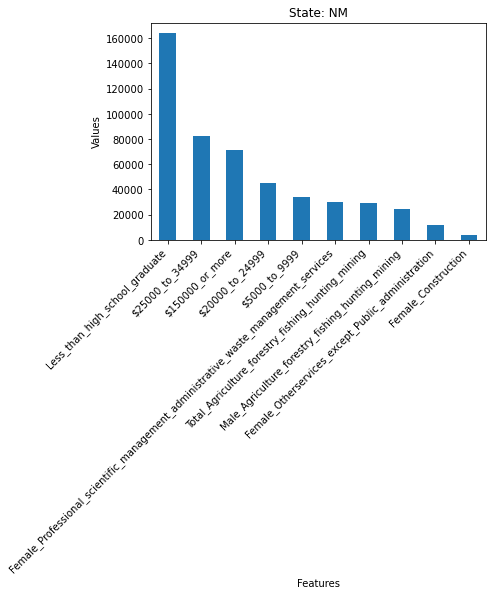

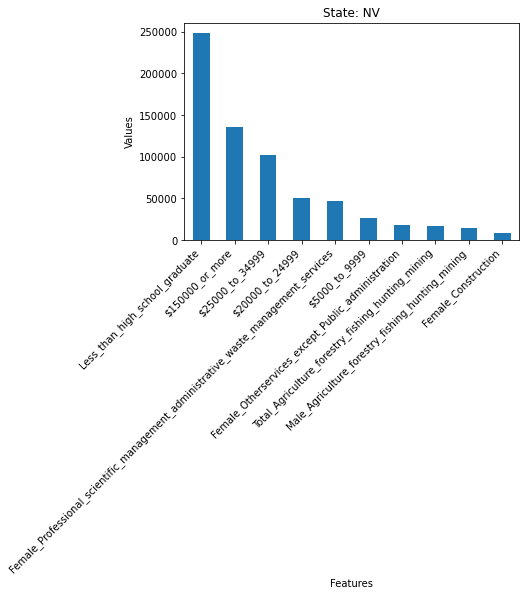

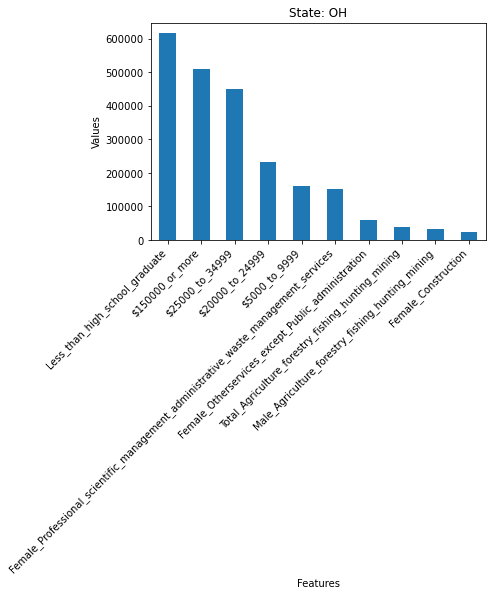

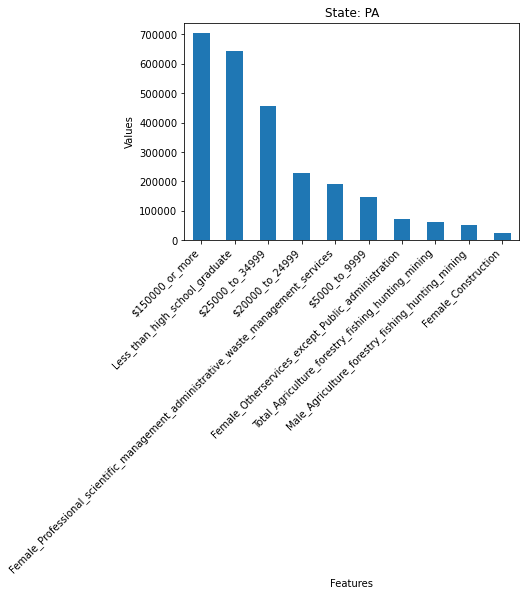

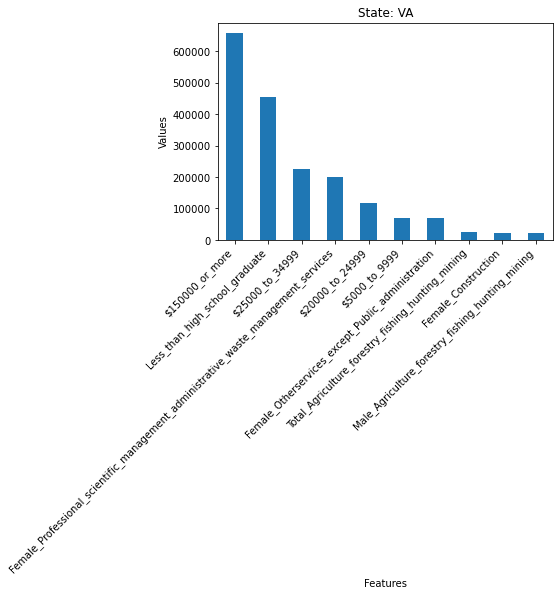

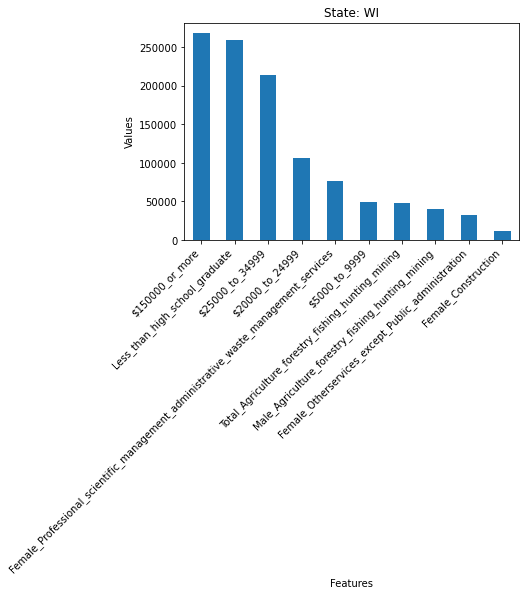

In [126]:
#extract state abbreviation from district
political_df['state'] = political_df['district'].apply(lambda x: x[:2])

#group by state
grouped_state_df = political_df.groupby('state')

#iterate through each group and plot the swing states
for state, state_df in grouped_state_df:
    if state in swing_states:
        plt.figure()
        #sum the values of the top features for each state
        summed_values = state_df[top_feature_names_reversed].sum()
        #sort the summed values in descending order
        sorted_summed_values = summed_values.sort_values(ascending=False)
        #plot the sorted summed values
        sorted_summed_values.plot(kind='bar')
        plt.title(f"State: {state}")
        plt.xlabel('Features')
        plt.ylabel('Values')
        plt.xticks(rotation=45, ha='right')
        plt.show()

## Conclusions and Next Steps

### Conclusions

* 1. Focus on opportunities in education. There are a number of districts in Iowa and Indiana with a high number of residents that have had less educational opportunity, this should be an appealing message for Democrats to campaign on.
* 2. The higher the percentage of voters working in agriculture, the likelier a Republican victory. Focus on ways to create an economic/environmental message that can appeal to them.
* 3. The Democrats have performed better in the swing states in recent elections, but have lost Florida and Ohio. The recent dynamics don't bode well for Democrats in these states, and they should focus their resources on other swing states. There are a few seemingly gettable states, like Iowa.  

### Next Steps
* 1. Find more data to improve the model's performance.
* 2. A deeper analysis of the Census data is necessary, as there can be underlying factors that explain these trends in a deceptive way. 
* 3. Gathering Census data from election years prior to 2020 will help further identify trends and factors to focus on.